In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from datetime import datetime
from src.BPNN import BPNN
import seaborn as sns

In [8]:
# Load the CSV file into a DataFrame
df_antam = pd.read_csv("./data/ANTM.JK.csv")
# Drop rows with NaN values
df_antam.dropna(inplace=True)

# Display the first few rows of the DataFrame
print(df_antam.shape)
df_antam.head()

(3807, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


In [9]:
# Extract the 'Open' columns as numpy arrays
open_data = df_antam['Open'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(open_data)

print("\nScaled Data Shape :", scaled_data.shape)

#Verify the data
print("\nScaling Verification:")
print(f"Original price range: [{open_data.min():.2f}, {open_data.max():.2f}]")
print(f"Scaled price range: [{scaled_data.min():.2f}, {scaled_data.max():.2f}]")




Scaled Data Shape : (3807, 1)

Scaling Verification:
Original price range: [290.00, 4409.88]
Scaled price range: [0.00, 1.00]


In [10]:
# Made data into an X day window to predict y days ahead
def create_dataset(data, window_size, y_days_ahead=1):
    X, y = [], []
    for i in range(len(data) - window_size - y_days_ahead + 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size : i + window_size + y_days_ahead, 0])

    print(f"X shape: {np.array(X).shape}")
    print(f"y shape: {np.array(y).shape}")
    return np.array(X), np.array(y)

In [11]:
#Analyze the effect of the window size
numberOfDataPoints = 20
distanceBetweenDataPoints = 1
error = np.zeros((numberOfDataPoints, numberOfDataPoints))
iteration = 0

In [12]:
def functionError(window_size, y_days_ahead):
    X, y = create_dataset(scaled_data, window_size, y_days_ahead)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
    
    #Test Manual BPNN
    layer_sizes = [X_train.shape[1], 64, 128, y_train.shape[1]]
    model_name = f"W_{X_train.shape[1]}_{y_train.shape[1]}"
    model_manual = BPNN(layer_sizes, model_name)
    print(f"Training data shape: {X_train.shape}, {y_train.shape}, Validation data shape: {X_val.shape}, {y_val.shape}, Testing data shape: {X_test.shape}, {y_test.shape}")
    history = model_manual.train(X_train, y_train, X_val, y_val, epochs = 50,batch_size = 1 , shuffle = True)
    predictions = model_manual.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse}")

    return mse

for i in range(numberOfDataPoints):
    window_size = (i+1) * distanceBetweenDataPoints
    for j in range(numberOfDataPoints):
        y_days_ahead = (j+1) * distanceBetweenDataPoints
        print("=====================================================================================================")
        print(f"Iteration: {iteration}, Window Size: {window_size}, Y Days Ahead: {y_days_ahead}")
        error[i][j] = functionError(window_size, y_days_ahead)
        iteration += 1

Iteration: 0, Window Size: 1, Y Days Ahead: 1
X shape: (3806, 1)
y shape: (3806, 1)
Initializing network with layer sizes: [1, 64, 128, 1]
params_W_1_1.npz not found. Using randomly initialized parameters.
Training data shape: (3044, 1), (3044, 1), Validation data shape: (381, 1), (381, 1), Testing data shape: (381, 1), (381, 1)
Parameters loaded from params_W_1_1.npz


Training Progress:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training Progress:   6%|▌         | 3/50 [00:05<01:28,  1.88s/epoch, loss=0.0002, val_loss=7.3e-5, patience=1]    


Epoch 4/50, Training Loss: 0.000200, Validation Loss: 0.000073
Early stopping at epoch 4. Best validation loss: 0.000041
Mean Squared Error: 0.0003637627241436103
Iteration: 1, Window Size: 1, Y Days Ahead: 2
X shape: (3805, 1)
y shape: (3805, 2)
Initializing network with layer sizes: [1, 64, 128, 2]
params_W_1_2.npz not found. Using randomly initialized parameters.
Training data shape: (3044, 1), (3044, 2), Validation data shape: (380, 1), (380, 2), Testing data shape: (381, 1), (381, 2)
Parameters loaded from params_W_1_2.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:28,  1.92s/epoch, loss=0.000259, val_loss=6.04e-5, patience=1] 


Epoch 5/50, Training Loss: 0.000259, Validation Loss: 0.000060
Early stopping at epoch 5. Best validation loss: 0.000043
Mean Squared Error: 0.0004898511625748759
Iteration: 2, Window Size: 1, Y Days Ahead: 3
X shape: (3804, 1)
y shape: (3804, 3)
Initializing network with layer sizes: [1, 64, 128, 3]
params_W_1_3.npz not found. Using randomly initialized parameters.
Training data shape: (3043, 1), (3043, 3), Validation data shape: (380, 1), (380, 3), Testing data shape: (381, 1), (381, 3)
Parameters loaded from params_W_1_3.npz


Training Progress:  10%|█         | 5/50 [00:09<01:25,  1.89s/epoch, loss=0.000288, val_loss=6.08e-5, patience=1]


Epoch 6/50, Training Loss: 0.000288, Validation Loss: 0.000061
Early stopping at epoch 6. Best validation loss: 0.000059
Mean Squared Error: 0.0005640751500200059
Iteration: 3, Window Size: 1, Y Days Ahead: 4
X shape: (3803, 1)
y shape: (3803, 4)
Initializing network with layer sizes: [1, 64, 128, 4]
params_W_1_4.npz not found. Using randomly initialized parameters.
Training data shape: (3042, 1), (3042, 4), Validation data shape: (380, 1), (380, 4), Testing data shape: (381, 1), (381, 4)
Parameters loaded from params_W_1_4.npz


Training Progress:  14%|█▍        | 7/50 [00:13<01:20,  1.88s/epoch, loss=0.000371, val_loss=8.14e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000371, Validation Loss: 0.000081
Early stopping at epoch 8. Best validation loss: 0.000068
Mean Squared Error: 0.0006871346733283107
Iteration: 4, Window Size: 1, Y Days Ahead: 5
X shape: (3802, 1)
y shape: (3802, 5)
Initializing network with layer sizes: [1, 64, 128, 5]
params_W_1_5.npz not found. Using randomly initialized parameters.
Training data shape: (3041, 1), (3041, 5), Validation data shape: (380, 1), (380, 5), Testing data shape: (381, 1), (381, 5)
Parameters loaded from params_W_1_5.npz


Training Progress:  12%|█▏        | 6/50 [00:12<01:29,  2.03s/epoch, loss=0.000433, val_loss=0.000118, patience=1]


Epoch 7/50, Training Loss: 0.000433, Validation Loss: 0.000118
Early stopping at epoch 7. Best validation loss: 0.000081
Mean Squared Error: 0.0008299822812666304
Iteration: 5, Window Size: 1, Y Days Ahead: 6
X shape: (3801, 1)
y shape: (3801, 6)
Initializing network with layer sizes: [1, 64, 128, 6]
params_W_1_6.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 1), (3040, 6), Validation data shape: (380, 1), (380, 6), Testing data shape: (381, 1), (381, 6)
Parameters loaded from params_W_1_6.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:35,  2.02s/epoch, loss=0.000552, val_loss=0.000123, patience=1]


Epoch 4/50, Training Loss: 0.000552, Validation Loss: 0.000123
Early stopping at epoch 4. Best validation loss: 0.000116
Mean Squared Error: 0.0008822341815914869
Iteration: 6, Window Size: 1, Y Days Ahead: 7
X shape: (3800, 1)
y shape: (3800, 7)
Initializing network with layer sizes: [1, 64, 128, 7]
params_W_1_7.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 1), (3040, 7), Validation data shape: (380, 1), (380, 7), Testing data shape: (380, 1), (380, 7)
Parameters loaded from params_W_1_7.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:37,  2.08s/epoch, loss=0.000694, val_loss=0.000154, patience=1]


Epoch 4/50, Training Loss: 0.000694, Validation Loss: 0.000154
Early stopping at epoch 4. Best validation loss: 0.000115
Mean Squared Error: 0.0010429677591821632
Iteration: 7, Window Size: 1, Y Days Ahead: 8
X shape: (3799, 1)
y shape: (3799, 8)
Initializing network with layer sizes: [1, 64, 128, 8]
params_W_1_8.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 1), (3039, 8), Validation data shape: (380, 1), (380, 8), Testing data shape: (380, 1), (380, 8)
Parameters loaded from params_W_1_8.npz


Training Progress:  12%|█▏        | 6/50 [00:12<01:34,  2.14s/epoch, loss=0.0007, val_loss=0.000182, patience=1]  


Epoch 7/50, Training Loss: 0.000700, Validation Loss: 0.000182
Early stopping at epoch 7. Best validation loss: 0.000129
Mean Squared Error: 0.0011692830978627224
Iteration: 8, Window Size: 1, Y Days Ahead: 9
X shape: (3798, 1)
y shape: (3798, 9)
Initializing network with layer sizes: [1, 64, 128, 9]
params_W_1_9.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 1), (3038, 9), Validation data shape: (380, 1), (380, 9), Testing data shape: (380, 1), (380, 9)
Parameters loaded from params_W_1_9.npz


Training Progress:  18%|█▊        | 9/50 [00:18<01:22,  2.00s/epoch, loss=0.00082, val_loss=0.000252, patience=1] 


Epoch 10/50, Training Loss: 0.000820, Validation Loss: 0.000252
Early stopping at epoch 10. Best validation loss: 0.000136
Mean Squared Error: 0.0013578894131127223
Iteration: 9, Window Size: 1, Y Days Ahead: 10
X shape: (3797, 1)
y shape: (3797, 10)
Initializing network with layer sizes: [1, 64, 128, 10]
params_W_1_10.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 1), (3037, 10), Validation data shape: (380, 1), (380, 10), Testing data shape: (380, 1), (380, 10)
Parameters loaded from params_W_1_10.npz


Training Progress:  12%|█▏        | 6/50 [00:12<01:28,  2.01s/epoch, loss=0.000809, val_loss=0.000185, patience=1]


Epoch 7/50, Training Loss: 0.000809, Validation Loss: 0.000185
Early stopping at epoch 7. Best validation loss: 0.000151
Mean Squared Error: 0.0015000835318883915
Iteration: 10, Window Size: 1, Y Days Ahead: 11
X shape: (3796, 1)
y shape: (3796, 11)
Initializing network with layer sizes: [1, 64, 128, 11]
params_W_1_11.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 1), (3036, 11), Validation data shape: (380, 1), (380, 11), Testing data shape: (380, 1), (380, 11)
Parameters loaded from params_W_1_11.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:38,  2.10s/epoch, loss=0.000997, val_loss=0.000256, patience=1]


Epoch 4/50, Training Loss: 0.000997, Validation Loss: 0.000256
Early stopping at epoch 4. Best validation loss: 0.000214
Mean Squared Error: 0.0014781653471686537
Iteration: 11, Window Size: 1, Y Days Ahead: 12
X shape: (3795, 1)
y shape: (3795, 12)
Initializing network with layer sizes: [1, 64, 128, 12]
params_W_1_12.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 1), (3036, 12), Validation data shape: (379, 1), (379, 12), Testing data shape: (380, 1), (380, 12)
Parameters loaded from params_W_1_12.npz


Training Progress:  20%|██        | 10/50 [00:20<01:23,  2.09s/epoch, loss=0.000888, val_loss=0.000177, patience=1]


Epoch 11/50, Training Loss: 0.000888, Validation Loss: 0.000177
Early stopping at epoch 11. Best validation loss: 0.000175
Mean Squared Error: 0.0015581648190365076
Iteration: 12, Window Size: 1, Y Days Ahead: 13
X shape: (3794, 1)
y shape: (3794, 13)
Initializing network with layer sizes: [1, 64, 128, 13]
params_W_1_13.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 1), (3035, 13), Validation data shape: (379, 1), (379, 13), Testing data shape: (380, 1), (380, 13)
Parameters loaded from params_W_1_13.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:39,  2.11s/epoch, loss=0.00143, val_loss=0.000294, patience=1]


Epoch 4/50, Training Loss: 0.001427, Validation Loss: 0.000294
Early stopping at epoch 4. Best validation loss: 0.000203
Mean Squared Error: 0.0018867244624920128
Iteration: 13, Window Size: 1, Y Days Ahead: 14
X shape: (3793, 1)
y shape: (3793, 14)
Initializing network with layer sizes: [1, 64, 128, 14]
params_W_1_14.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 1), (3034, 14), Validation data shape: (379, 1), (379, 14), Testing data shape: (380, 1), (380, 14)
Parameters loaded from params_W_1_14.npz


Training Progress:  14%|█▍        | 7/50 [00:14<01:30,  2.10s/epoch, loss=0.00118, val_loss=0.000254, patience=1]


Epoch 8/50, Training Loss: 0.001177, Validation Loss: 0.000254
Early stopping at epoch 8. Best validation loss: 0.000191
Mean Squared Error: 0.002235747331485168
Iteration: 14, Window Size: 1, Y Days Ahead: 15
X shape: (3792, 1)
y shape: (3792, 15)
Initializing network with layer sizes: [1, 64, 128, 15]
params_W_1_15.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 1), (3033, 15), Validation data shape: (379, 1), (379, 15), Testing data shape: (380, 1), (380, 15)
Parameters loaded from params_W_1_15.npz


Training Progress:  12%|█▏        | 6/50 [00:12<01:33,  2.13s/epoch, loss=0.0011, val_loss=0.000232, patience=1] 


Epoch 7/50, Training Loss: 0.001098, Validation Loss: 0.000232
Early stopping at epoch 7. Best validation loss: 0.000229
Mean Squared Error: 0.0017842510990885609
Iteration: 15, Window Size: 1, Y Days Ahead: 16
X shape: (3791, 1)
y shape: (3791, 16)
Initializing network with layer sizes: [1, 64, 128, 16]
params_W_1_16.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 1), (3032, 16), Validation data shape: (379, 1), (379, 16), Testing data shape: (380, 1), (380, 16)
Parameters loaded from params_W_1_16.npz


Training Progress:  16%|█▌        | 8/50 [00:16<01:28,  2.11s/epoch, loss=0.00117, val_loss=0.000284, patience=1]


Epoch 9/50, Training Loss: 0.001173, Validation Loss: 0.000284
Early stopping at epoch 9. Best validation loss: 0.000215
Mean Squared Error: 0.0026679301320621787
Iteration: 16, Window Size: 1, Y Days Ahead: 17
X shape: (3790, 1)
y shape: (3790, 17)
Initializing network with layer sizes: [1, 64, 128, 17]
params_W_1_17.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 1), (3032, 17), Validation data shape: (379, 1), (379, 17), Testing data shape: (379, 1), (379, 17)
Parameters loaded from params_W_1_17.npz


Training Progress:  12%|█▏        | 6/50 [00:13<01:35,  2.17s/epoch, loss=0.00146, val_loss=0.000346, patience=1]


Epoch 7/50, Training Loss: 0.001457, Validation Loss: 0.000346
Early stopping at epoch 7. Best validation loss: 0.000266
Mean Squared Error: 0.00251112798636231
Iteration: 17, Window Size: 1, Y Days Ahead: 18
X shape: (3789, 1)
y shape: (3789, 18)
Initializing network with layer sizes: [1, 64, 128, 18]
params_W_1_18.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 1), (3031, 18), Validation data shape: (379, 1), (379, 18), Testing data shape: (379, 1), (379, 18)
Parameters loaded from params_W_1_18.npz


Training Progress:  10%|█         | 5/50 [00:10<01:38,  2.18s/epoch, loss=0.00132, val_loss=0.000339, patience=1]


Epoch 6/50, Training Loss: 0.001317, Validation Loss: 0.000339
Early stopping at epoch 6. Best validation loss: 0.000271
Mean Squared Error: 0.0025829630957070683
Iteration: 18, Window Size: 1, Y Days Ahead: 19
X shape: (3788, 1)
y shape: (3788, 19)
Initializing network with layer sizes: [1, 64, 128, 19]
params_W_1_19.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 1), (3030, 19), Validation data shape: (379, 1), (379, 19), Testing data shape: (379, 1), (379, 19)
Parameters loaded from params_W_1_19.npz


Training Progress:   8%|▊         | 4/50 [00:08<01:41,  2.21s/epoch, loss=0.00189, val_loss=0.000325, patience=1]


Epoch 5/50, Training Loss: 0.001894, Validation Loss: 0.000325
Early stopping at epoch 5. Best validation loss: 0.000320
Mean Squared Error: 0.002668190244967729
Iteration: 19, Window Size: 1, Y Days Ahead: 20
X shape: (3787, 1)
y shape: (3787, 20)
Initializing network with layer sizes: [1, 64, 128, 20]
params_W_1_20.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 1), (3029, 20), Validation data shape: (379, 1), (379, 20), Testing data shape: (379, 1), (379, 20)
Parameters loaded from params_W_1_20.npz


Training Progress:   8%|▊         | 4/50 [00:08<01:39,  2.16s/epoch, loss=0.00154, val_loss=0.000381, patience=1]


Epoch 5/50, Training Loss: 0.001537, Validation Loss: 0.000381
Early stopping at epoch 5. Best validation loss: 0.000377
Mean Squared Error: 0.0025527527589708204
Iteration: 20, Window Size: 2, Y Days Ahead: 1
X shape: (3805, 2)
y shape: (3805, 1)
Initializing network with layer sizes: [2, 64, 128, 1]
params_W_2_1.npz not found. Using randomly initialized parameters.
Training data shape: (3044, 2), (3044, 1), Validation data shape: (380, 2), (380, 1), Testing data shape: (381, 2), (381, 1)
Parameters loaded from params_W_2_1.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:38,  2.10s/epoch, loss=0.00108, val_loss=0.000162, patience=1] 


Epoch 4/50, Training Loss: 0.001084, Validation Loss: 0.000162
Early stopping at epoch 4. Best validation loss: 0.000032
Mean Squared Error: 0.00036103856871165025
Iteration: 21, Window Size: 2, Y Days Ahead: 2
X shape: (3804, 2)
y shape: (3804, 2)
Initializing network with layer sizes: [2, 64, 128, 2]
params_W_2_2.npz not found. Using randomly initialized parameters.
Training data shape: (3043, 2), (3043, 2), Validation data shape: (380, 2), (380, 2), Testing data shape: (381, 2), (381, 2)
Parameters loaded from params_W_2_2.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:35,  2.03s/epoch, loss=0.000325, val_loss=5.23e-5, patience=1] 


Epoch 4/50, Training Loss: 0.000325, Validation Loss: 0.000052
Early stopping at epoch 4. Best validation loss: 0.000047
Mean Squared Error: 0.0005262568100501967
Iteration: 22, Window Size: 2, Y Days Ahead: 3
X shape: (3803, 2)
y shape: (3803, 3)
Initializing network with layer sizes: [2, 64, 128, 3]
params_W_2_3.npz not found. Using randomly initialized parameters.
Training data shape: (3042, 2), (3042, 3), Validation data shape: (380, 2), (380, 3), Testing data shape: (381, 2), (381, 3)
Parameters loaded from params_W_2_3.npz


Training Progress:  12%|█▏        | 6/50 [00:12<01:35,  2.16s/epoch, loss=0.00038, val_loss=6.74e-5, patience=1]  


Epoch 7/50, Training Loss: 0.000380, Validation Loss: 0.000067
Early stopping at epoch 7. Best validation loss: 0.000059
Mean Squared Error: 0.0005534085459545014
Iteration: 23, Window Size: 2, Y Days Ahead: 4
X shape: (3802, 2)
y shape: (3802, 4)
Initializing network with layer sizes: [2, 64, 128, 4]
params_W_2_4.npz not found. Using randomly initialized parameters.
Training data shape: (3041, 2), (3041, 4), Validation data shape: (380, 2), (380, 4), Testing data shape: (381, 2), (381, 4)
Parameters loaded from params_W_2_4.npz


Training Progress:  18%|█▊        | 9/50 [00:18<01:23,  2.04s/epoch, loss=0.000406, val_loss=9.51e-5, patience=1] 


Epoch 10/50, Training Loss: 0.000406, Validation Loss: 0.000095
Early stopping at epoch 10. Best validation loss: 0.000074
Mean Squared Error: 0.0006519572322967476
Iteration: 24, Window Size: 2, Y Days Ahead: 5
X shape: (3801, 2)
y shape: (3801, 5)
Initializing network with layer sizes: [2, 64, 128, 5]
params_W_2_5.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 2), (3040, 5), Validation data shape: (380, 2), (380, 5), Testing data shape: (381, 2), (381, 5)
Parameters loaded from params_W_2_5.npz


Training Progress:  12%|█▏        | 6/50 [00:12<01:30,  2.06s/epoch, loss=0.000597, val_loss=0.000105, patience=1]


Epoch 7/50, Training Loss: 0.000597, Validation Loss: 0.000105
Early stopping at epoch 7. Best validation loss: 0.000095
Mean Squared Error: 0.0007506539795971887
Iteration: 25, Window Size: 2, Y Days Ahead: 6
X shape: (3800, 2)
y shape: (3800, 6)
Initializing network with layer sizes: [2, 64, 128, 6]
params_W_2_6.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 2), (3040, 6), Validation data shape: (380, 2), (380, 6), Testing data shape: (380, 2), (380, 6)
Parameters loaded from params_W_2_6.npz


Training Progress:  12%|█▏        | 6/50 [00:12<01:33,  2.12s/epoch, loss=0.000528, val_loss=0.0001, patience=1]  


Epoch 7/50, Training Loss: 0.000528, Validation Loss: 0.000100
Early stopping at epoch 7. Best validation loss: 0.000095
Mean Squared Error: 0.0009134344417547868
Iteration: 26, Window Size: 2, Y Days Ahead: 7
X shape: (3799, 2)
y shape: (3799, 7)
Initializing network with layer sizes: [2, 64, 128, 7]
params_W_2_7.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 2), (3039, 7), Validation data shape: (380, 2), (380, 7), Testing data shape: (380, 2), (380, 7)
Parameters loaded from params_W_2_7.npz


Training Progress:   8%|▊         | 4/50 [00:08<01:36,  2.10s/epoch, loss=0.000696, val_loss=0.000144, patience=1]


Epoch 5/50, Training Loss: 0.000696, Validation Loss: 0.000144
Early stopping at epoch 5. Best validation loss: 0.000118
Mean Squared Error: 0.0010857445104912392
Iteration: 27, Window Size: 2, Y Days Ahead: 8
X shape: (3798, 2)
y shape: (3798, 8)
Initializing network with layer sizes: [2, 64, 128, 8]
params_W_2_8.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 2), (3038, 8), Validation data shape: (380, 2), (380, 8), Testing data shape: (380, 2), (380, 8)
Parameters loaded from params_W_2_8.npz


Training Progress:  24%|██▍       | 12/50 [00:27<01:27,  2.29s/epoch, loss=0.000659, val_loss=0.000145, patience=1]


Epoch 13/50, Training Loss: 0.000659, Validation Loss: 0.000145
Early stopping at epoch 13. Best validation loss: 0.000123
Mean Squared Error: 0.001200148621713654
Iteration: 28, Window Size: 2, Y Days Ahead: 9
X shape: (3797, 2)
y shape: (3797, 9)
Initializing network with layer sizes: [2, 64, 128, 9]
params_W_2_9.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 2), (3037, 9), Validation data shape: (380, 2), (380, 9), Testing data shape: (380, 2), (380, 9)
Parameters loaded from params_W_2_9.npz


Training Progress:  22%|██▏       | 11/50 [00:24<01:25,  2.20s/epoch, loss=0.00074, val_loss=0.000179, patience=1] 


Epoch 12/50, Training Loss: 0.000740, Validation Loss: 0.000179
Early stopping at epoch 12. Best validation loss: 0.000139
Mean Squared Error: 0.0012727689460798372
Iteration: 29, Window Size: 2, Y Days Ahead: 10
X shape: (3796, 2)
y shape: (3796, 10)
Initializing network with layer sizes: [2, 64, 128, 10]
params_W_2_10.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 2), (3036, 10), Validation data shape: (380, 2), (380, 10), Testing data shape: (380, 2), (380, 10)
Parameters loaded from params_W_2_10.npz


Training Progress:  12%|█▏        | 6/50 [00:12<01:33,  2.13s/epoch, loss=0.000829, val_loss=0.000197, patience=1]


Epoch 7/50, Training Loss: 0.000829, Validation Loss: 0.000197
Early stopping at epoch 7. Best validation loss: 0.000164
Mean Squared Error: 0.00137278142205585
Iteration: 30, Window Size: 2, Y Days Ahead: 11
X shape: (3795, 2)
y shape: (3795, 11)
Initializing network with layer sizes: [2, 64, 128, 11]
params_W_2_11.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 2), (3036, 11), Validation data shape: (379, 2), (379, 11), Testing data shape: (380, 2), (380, 11)
Parameters loaded from params_W_2_11.npz


Training Progress:  12%|█▏        | 6/50 [00:12<01:34,  2.14s/epoch, loss=0.00109, val_loss=0.000176, patience=1] 


Epoch 7/50, Training Loss: 0.001094, Validation Loss: 0.000176
Early stopping at epoch 7. Best validation loss: 0.000162
Mean Squared Error: 0.001562803430692465
Iteration: 31, Window Size: 2, Y Days Ahead: 12
X shape: (3794, 2)
y shape: (3794, 12)
Initializing network with layer sizes: [2, 64, 128, 12]
params_W_2_12.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 2), (3035, 12), Validation data shape: (379, 2), (379, 12), Testing data shape: (380, 2), (380, 12)
Parameters loaded from params_W_2_12.npz


Training Progress:  16%|█▌        | 8/50 [00:17<01:30,  2.16s/epoch, loss=0.000924, val_loss=0.000215, patience=1]


Epoch 9/50, Training Loss: 0.000924, Validation Loss: 0.000215
Early stopping at epoch 9. Best validation loss: 0.000194
Mean Squared Error: 0.0023362656781687006
Iteration: 32, Window Size: 2, Y Days Ahead: 13
X shape: (3793, 2)
y shape: (3793, 13)
Initializing network with layer sizes: [2, 64, 128, 13]
params_W_2_13.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 2), (3034, 13), Validation data shape: (379, 2), (379, 13), Testing data shape: (380, 2), (380, 13)
Parameters loaded from params_W_2_13.npz


Training Progress:  10%|█         | 5/50 [00:11<01:39,  2.20s/epoch, loss=0.00104, val_loss=0.000226, patience=1]


Epoch 6/50, Training Loss: 0.001037, Validation Loss: 0.000226
Early stopping at epoch 6. Best validation loss: 0.000207
Mean Squared Error: 0.0016512183185749172
Iteration: 33, Window Size: 2, Y Days Ahead: 14
X shape: (3792, 2)
y shape: (3792, 14)
Initializing network with layer sizes: [2, 64, 128, 14]
params_W_2_14.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 2), (3033, 14), Validation data shape: (379, 2), (379, 14), Testing data shape: (380, 2), (380, 14)
Parameters loaded from params_W_2_14.npz


Training Progress:  10%|█         | 5/50 [00:10<01:37,  2.17s/epoch, loss=0.00123, val_loss=0.000321, patience=1]


Epoch 6/50, Training Loss: 0.001229, Validation Loss: 0.000321
Early stopping at epoch 6. Best validation loss: 0.000228
Mean Squared Error: 0.0016916704062074112
Iteration: 34, Window Size: 2, Y Days Ahead: 15
X shape: (3791, 2)
y shape: (3791, 15)
Initializing network with layer sizes: [2, 64, 128, 15]
params_W_2_15.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 2), (3032, 15), Validation data shape: (379, 2), (379, 15), Testing data shape: (380, 2), (380, 15)
Parameters loaded from params_W_2_15.npz


Training Progress:  14%|█▍        | 7/50 [00:15<01:33,  2.18s/epoch, loss=0.00123, val_loss=0.000436, patience=1]


Epoch 8/50, Training Loss: 0.001234, Validation Loss: 0.000436
Early stopping at epoch 8. Best validation loss: 0.000222
Mean Squared Error: 0.0019093988153837246
Iteration: 35, Window Size: 2, Y Days Ahead: 16
X shape: (3790, 2)
y shape: (3790, 16)
Initializing network with layer sizes: [2, 64, 128, 16]
params_W_2_16.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 2), (3032, 16), Validation data shape: (379, 2), (379, 16), Testing data shape: (379, 2), (379, 16)
Parameters loaded from params_W_2_16.npz


Training Progress:  16%|█▌        | 8/50 [00:17<01:33,  2.23s/epoch, loss=0.00121, val_loss=0.000282, patience=1]


Epoch 9/50, Training Loss: 0.001205, Validation Loss: 0.000282
Early stopping at epoch 9. Best validation loss: 0.000234
Mean Squared Error: 0.002108896175250137
Iteration: 36, Window Size: 2, Y Days Ahead: 17
X shape: (3789, 2)
y shape: (3789, 17)
Initializing network with layer sizes: [2, 64, 128, 17]
params_W_2_17.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 2), (3031, 17), Validation data shape: (379, 2), (379, 17), Testing data shape: (379, 2), (379, 17)
Parameters loaded from params_W_2_17.npz


Training Progress:  10%|█         | 5/50 [00:10<01:38,  2.20s/epoch, loss=0.00125, val_loss=0.000285, patience=1]


Epoch 6/50, Training Loss: 0.001247, Validation Loss: 0.000285
Early stopping at epoch 6. Best validation loss: 0.000266
Mean Squared Error: 0.0021998835235166954
Iteration: 37, Window Size: 2, Y Days Ahead: 18
X shape: (3788, 2)
y shape: (3788, 18)
Initializing network with layer sizes: [2, 64, 128, 18]
params_W_2_18.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 2), (3030, 18), Validation data shape: (379, 2), (379, 18), Testing data shape: (379, 2), (379, 18)
Parameters loaded from params_W_2_18.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:43,  2.20s/epoch, loss=0.00145, val_loss=0.00036, patience=1] 


Epoch 4/50, Training Loss: 0.001453, Validation Loss: 0.000360
Early stopping at epoch 4. Best validation loss: 0.000281
Mean Squared Error: 0.0025598625834179455
Iteration: 38, Window Size: 2, Y Days Ahead: 19
X shape: (3787, 2)
y shape: (3787, 19)
Initializing network with layer sizes: [2, 64, 128, 19]
params_W_2_19.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 2), (3029, 19), Validation data shape: (379, 2), (379, 19), Testing data shape: (379, 2), (379, 19)
Parameters loaded from params_W_2_19.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:45,  2.28s/epoch, loss=0.00161, val_loss=0.000302, patience=1]


Epoch 5/50, Training Loss: 0.001611, Validation Loss: 0.000302
Early stopping at epoch 5. Best validation loss: 0.000289
Mean Squared Error: 0.00290198541477949
Iteration: 39, Window Size: 2, Y Days Ahead: 20
X shape: (3786, 2)
y shape: (3786, 20)
Initializing network with layer sizes: [2, 64, 128, 20]
params_W_2_20.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 2), (3028, 20), Validation data shape: (379, 2), (379, 20), Testing data shape: (379, 2), (379, 20)
Parameters loaded from params_W_2_20.npz


Training Progress:   8%|▊         | 4/50 [00:08<01:43,  2.24s/epoch, loss=0.00163, val_loss=0.000444, patience=1]


Epoch 5/50, Training Loss: 0.001634, Validation Loss: 0.000444
Early stopping at epoch 5. Best validation loss: 0.000307
Mean Squared Error: 0.0028804574616745605
Iteration: 40, Window Size: 3, Y Days Ahead: 1
X shape: (3804, 3)
y shape: (3804, 1)
Initializing network with layer sizes: [3, 64, 128, 1]
params_W_3_1.npz not found. Using randomly initialized parameters.
Training data shape: (3043, 3), (3043, 1), Validation data shape: (380, 3), (380, 1), Testing data shape: (381, 3), (381, 1)
Parameters loaded from params_W_3_1.npz


Training Progress:  12%|█▏        | 6/50 [00:13<01:37,  2.21s/epoch, loss=0.000421, val_loss=8.64e-5, patience=1] 


Epoch 7/50, Training Loss: 0.000421, Validation Loss: 0.000086
Early stopping at epoch 7. Best validation loss: 0.000033
Mean Squared Error: 0.0003544185211310801
Iteration: 41, Window Size: 3, Y Days Ahead: 2
X shape: (3803, 3)
y shape: (3803, 2)
Initializing network with layer sizes: [3, 64, 128, 2]
params_W_3_2.npz not found. Using randomly initialized parameters.
Training data shape: (3042, 3), (3042, 2), Validation data shape: (380, 3), (380, 2), Testing data shape: (381, 3), (381, 2)
Parameters loaded from params_W_3_2.npz


Training Progress:  10%|█         | 5/50 [00:11<01:42,  2.27s/epoch, loss=0.000242, val_loss=6.56e-5, patience=1] 


Epoch 6/50, Training Loss: 0.000242, Validation Loss: 0.000066
Early stopping at epoch 6. Best validation loss: 0.000056
Mean Squared Error: 0.0004888068722939912
Iteration: 42, Window Size: 3, Y Days Ahead: 3
X shape: (3802, 3)
y shape: (3802, 3)
Initializing network with layer sizes: [3, 64, 128, 3]
params_W_3_3.npz not found. Using randomly initialized parameters.
Training data shape: (3041, 3), (3041, 3), Validation data shape: (380, 3), (380, 3), Testing data shape: (381, 3), (381, 3)
Parameters loaded from params_W_3_3.npz


Training Progress:  10%|█         | 5/50 [00:11<01:44,  2.31s/epoch, loss=0.000306, val_loss=5.82e-5, patience=1] 


Epoch 6/50, Training Loss: 0.000306, Validation Loss: 0.000058
Early stopping at epoch 6. Best validation loss: 0.000055
Mean Squared Error: 0.000588201878260637
Iteration: 43, Window Size: 3, Y Days Ahead: 4
X shape: (3801, 3)
y shape: (3801, 4)
Initializing network with layer sizes: [3, 64, 128, 4]
params_W_3_4.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 3), (3040, 4), Validation data shape: (380, 3), (380, 4), Testing data shape: (381, 3), (381, 4)
Parameters loaded from params_W_3_4.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:48,  2.32s/epoch, loss=0.000405, val_loss=0.000104, patience=1]


Epoch 4/50, Training Loss: 0.000405, Validation Loss: 0.000104
Early stopping at epoch 4. Best validation loss: 0.000074
Mean Squared Error: 0.0006911995889755506
Iteration: 44, Window Size: 3, Y Days Ahead: 5
X shape: (3800, 3)
y shape: (3800, 5)
Initializing network with layer sizes: [3, 64, 128, 5]
params_W_3_5.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 3), (3040, 5), Validation data shape: (380, 3), (380, 5), Testing data shape: (380, 3), (380, 5)
Parameters loaded from params_W_3_5.npz


Training Progress:  14%|█▍        | 7/50 [00:16<01:41,  2.35s/epoch, loss=0.000646, val_loss=0.00029, patience=1] 


Epoch 8/50, Training Loss: 0.000646, Validation Loss: 0.000290
Early stopping at epoch 8. Best validation loss: 0.000085
Mean Squared Error: 0.0009061484057378914
Iteration: 45, Window Size: 3, Y Days Ahead: 6
X shape: (3799, 3)
y shape: (3799, 6)
Initializing network with layer sizes: [3, 64, 128, 6]
params_W_3_6.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 3), (3039, 6), Validation data shape: (380, 3), (380, 6), Testing data shape: (380, 3), (380, 6)
Parameters loaded from params_W_3_6.npz


Training Progress:  10%|█         | 5/50 [00:11<01:47,  2.40s/epoch, loss=0.000534, val_loss=0.000132, patience=1]


Epoch 6/50, Training Loss: 0.000534, Validation Loss: 0.000132
Early stopping at epoch 6. Best validation loss: 0.000109
Mean Squared Error: 0.0009027732788723396
Iteration: 46, Window Size: 3, Y Days Ahead: 7
X shape: (3798, 3)
y shape: (3798, 7)
Initializing network with layer sizes: [3, 64, 128, 7]
params_W_3_7.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 3), (3038, 7), Validation data shape: (380, 3), (380, 7), Testing data shape: (380, 3), (380, 7)
Parameters loaded from params_W_3_7.npz


Training Progress:  14%|█▍        | 7/50 [00:16<01:42,  2.39s/epoch, loss=0.000568, val_loss=0.000112, patience=1]


Epoch 8/50, Training Loss: 0.000568, Validation Loss: 0.000112
Early stopping at epoch 8. Best validation loss: 0.000111
Mean Squared Error: 0.001000436639040095
Iteration: 47, Window Size: 3, Y Days Ahead: 8
X shape: (3797, 3)
y shape: (3797, 8)
Initializing network with layer sizes: [3, 64, 128, 8]
params_W_3_8.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 3), (3037, 8), Validation data shape: (380, 3), (380, 8), Testing data shape: (380, 3), (380, 8)
Parameters loaded from params_W_3_8.npz


Training Progress:  20%|██        | 10/50 [00:24<01:38,  2.47s/epoch, loss=0.000648, val_loss=0.000129, patience=1]


Epoch 11/50, Training Loss: 0.000648, Validation Loss: 0.000129
Early stopping at epoch 11. Best validation loss: 0.000123
Mean Squared Error: 0.0013674311977549362
Iteration: 48, Window Size: 3, Y Days Ahead: 9
X shape: (3796, 3)
y shape: (3796, 9)
Initializing network with layer sizes: [3, 64, 128, 9]
params_W_3_9.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 3), (3036, 9), Validation data shape: (380, 3), (380, 9), Testing data shape: (380, 3), (380, 9)
Parameters loaded from params_W_3_9.npz


Training Progress:  10%|█         | 5/50 [00:12<01:49,  2.43s/epoch, loss=0.000964, val_loss=0.000213, patience=1]


Epoch 6/50, Training Loss: 0.000964, Validation Loss: 0.000213
Early stopping at epoch 6. Best validation loss: 0.000150
Mean Squared Error: 0.0011408742907631424
Iteration: 49, Window Size: 3, Y Days Ahead: 10
X shape: (3795, 3)
y shape: (3795, 10)
Initializing network with layer sizes: [3, 64, 128, 10]
params_W_3_10.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 3), (3036, 10), Validation data shape: (379, 3), (379, 10), Testing data shape: (380, 3), (380, 10)
Parameters loaded from params_W_3_10.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:54,  2.43s/epoch, loss=0.000932, val_loss=0.000279, patience=1]


Epoch 4/50, Training Loss: 0.000932, Validation Loss: 0.000279
Early stopping at epoch 4. Best validation loss: 0.000162
Mean Squared Error: 0.0014649536728097727
Iteration: 50, Window Size: 3, Y Days Ahead: 11
X shape: (3794, 3)
y shape: (3794, 11)
Initializing network with layer sizes: [3, 64, 128, 11]
params_W_3_11.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 3), (3035, 11), Validation data shape: (379, 3), (379, 11), Testing data shape: (380, 3), (380, 11)
Parameters loaded from params_W_3_11.npz


Training Progress:  12%|█▏        | 6/50 [00:14<01:47,  2.44s/epoch, loss=0.000865, val_loss=0.000209, patience=1]


Epoch 7/50, Training Loss: 0.000865, Validation Loss: 0.000209
Early stopping at epoch 7. Best validation loss: 0.000162
Mean Squared Error: 0.0014969208476253429
Iteration: 51, Window Size: 3, Y Days Ahead: 12
X shape: (3793, 3)
y shape: (3793, 12)
Initializing network with layer sizes: [3, 64, 128, 12]
params_W_3_12.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 3), (3034, 12), Validation data shape: (379, 3), (379, 12), Testing data shape: (380, 3), (380, 12)
Parameters loaded from params_W_3_12.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:54,  2.43s/epoch, loss=0.00116, val_loss=0.00033, patience=1]  


Epoch 4/50, Training Loss: 0.001163, Validation Loss: 0.000330
Early stopping at epoch 4. Best validation loss: 0.000216
Mean Squared Error: 0.001817741608005302
Iteration: 52, Window Size: 3, Y Days Ahead: 13
X shape: (3792, 3)
y shape: (3792, 13)
Initializing network with layer sizes: [3, 64, 128, 13]
params_W_3_13.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 3), (3033, 13), Validation data shape: (379, 3), (379, 13), Testing data shape: (380, 3), (380, 13)
Parameters loaded from params_W_3_13.npz


Training Progress:  16%|█▌        | 8/50 [00:20<01:46,  2.53s/epoch, loss=0.00108, val_loss=0.000225, patience=1] 


Epoch 9/50, Training Loss: 0.001077, Validation Loss: 0.000225
Early stopping at epoch 9. Best validation loss: 0.000191
Mean Squared Error: 0.0017397806929781321
Iteration: 53, Window Size: 3, Y Days Ahead: 14
X shape: (3791, 3)
y shape: (3791, 14)
Initializing network with layer sizes: [3, 64, 128, 14]
params_W_3_14.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 3), (3032, 14), Validation data shape: (379, 3), (379, 14), Testing data shape: (380, 3), (380, 14)
Parameters loaded from params_W_3_14.npz


Training Progress:  12%|█▏        | 6/50 [00:15<01:52,  2.55s/epoch, loss=0.00111, val_loss=0.000252, patience=1]


Epoch 7/50, Training Loss: 0.001108, Validation Loss: 0.000252
Early stopping at epoch 7. Best validation loss: 0.000215
Mean Squared Error: 0.0017816244821216357
Iteration: 54, Window Size: 3, Y Days Ahead: 15
X shape: (3790, 3)
y shape: (3790, 15)
Initializing network with layer sizes: [3, 64, 128, 15]
params_W_3_15.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 3), (3032, 15), Validation data shape: (379, 3), (379, 15), Testing data shape: (379, 3), (379, 15)
Parameters loaded from params_W_3_15.npz


Training Progress:  16%|█▌        | 8/50 [00:22<01:55,  2.76s/epoch, loss=0.00111, val_loss=0.000245, patience=1]


Epoch 9/50, Training Loss: 0.001112, Validation Loss: 0.000245
Early stopping at epoch 9. Best validation loss: 0.000212
Mean Squared Error: 0.002618473970588084
Iteration: 55, Window Size: 3, Y Days Ahead: 16
X shape: (3789, 3)
y shape: (3789, 16)
Initializing network with layer sizes: [3, 64, 128, 16]
params_W_3_16.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 3), (3031, 16), Validation data shape: (379, 3), (379, 16), Testing data shape: (379, 3), (379, 16)
Parameters loaded from params_W_3_16.npz


Training Progress:  16%|█▌        | 8/50 [00:20<01:48,  2.57s/epoch, loss=0.0012, val_loss=0.000263, patience=1] 


Epoch 9/50, Training Loss: 0.001205, Validation Loss: 0.000263
Early stopping at epoch 9. Best validation loss: 0.000252
Mean Squared Error: 0.002288898663061264
Iteration: 56, Window Size: 3, Y Days Ahead: 17
X shape: (3788, 3)
y shape: (3788, 17)
Initializing network with layer sizes: [3, 64, 128, 17]
params_W_3_17.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 3), (3030, 17), Validation data shape: (379, 3), (379, 17), Testing data shape: (379, 3), (379, 17)
Parameters loaded from params_W_3_17.npz


Training Progress:  16%|█▌        | 8/50 [00:20<01:49,  2.60s/epoch, loss=0.00127, val_loss=0.000313, patience=1]


Epoch 9/50, Training Loss: 0.001266, Validation Loss: 0.000313
Early stopping at epoch 9. Best validation loss: 0.000260
Mean Squared Error: 0.0025294197453491476
Iteration: 57, Window Size: 3, Y Days Ahead: 18
X shape: (3787, 3)
y shape: (3787, 18)
Initializing network with layer sizes: [3, 64, 128, 18]
params_W_3_18.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 3), (3029, 18), Validation data shape: (379, 3), (379, 18), Testing data shape: (379, 3), (379, 18)
Parameters loaded from params_W_3_18.npz


Training Progress:  12%|█▏        | 6/50 [00:15<01:51,  2.53s/epoch, loss=0.00137, val_loss=0.00034, patience=1] 


Epoch 7/50, Training Loss: 0.001368, Validation Loss: 0.000340
Early stopping at epoch 7. Best validation loss: 0.000277
Mean Squared Error: 0.0028907129056775956
Iteration: 58, Window Size: 3, Y Days Ahead: 19
X shape: (3786, 3)
y shape: (3786, 19)
Initializing network with layer sizes: [3, 64, 128, 19]
params_W_3_19.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 3), (3028, 19), Validation data shape: (379, 3), (379, 19), Testing data shape: (379, 3), (379, 19)
Parameters loaded from params_W_3_19.npz


Training Progress:  14%|█▍        | 7/50 [00:18<01:52,  2.63s/epoch, loss=0.00142, val_loss=0.000299, patience=1]


Epoch 8/50, Training Loss: 0.001422, Validation Loss: 0.000299
Early stopping at epoch 8. Best validation loss: 0.000287
Mean Squared Error: 0.002887661038992357
Iteration: 59, Window Size: 3, Y Days Ahead: 20
X shape: (3785, 3)
y shape: (3785, 20)
Initializing network with layer sizes: [3, 64, 128, 20]
params_W_3_20.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 3), (3028, 20), Validation data shape: (378, 3), (378, 20), Testing data shape: (379, 3), (379, 20)
Parameters loaded from params_W_3_20.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:54,  2.48s/epoch, loss=0.00156, val_loss=0.000375, patience=1]


Epoch 5/50, Training Loss: 0.001561, Validation Loss: 0.000375
Early stopping at epoch 5. Best validation loss: 0.000324
Mean Squared Error: 0.0027880768159100405
Iteration: 60, Window Size: 4, Y Days Ahead: 1
X shape: (3803, 4)
y shape: (3803, 1)
Initializing network with layer sizes: [4, 64, 128, 1]
params_W_4_1.npz not found. Using randomly initialized parameters.
Training data shape: (3042, 4), (3042, 1), Validation data shape: (380, 4), (380, 1), Testing data shape: (381, 4), (381, 1)
Parameters loaded from params_W_4_1.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:45,  2.24s/epoch, loss=0.000317, val_loss=6.98e-5, patience=1]


Epoch 4/50, Training Loss: 0.000317, Validation Loss: 0.000070
Early stopping at epoch 4. Best validation loss: 0.000031
Mean Squared Error: 0.0003738701664715717
Iteration: 61, Window Size: 4, Y Days Ahead: 2
X shape: (3802, 4)
y shape: (3802, 2)
Initializing network with layer sizes: [4, 64, 128, 2]
params_W_4_2.npz not found. Using randomly initialized parameters.
Training data shape: (3041, 4), (3041, 2), Validation data shape: (380, 4), (380, 2), Testing data shape: (381, 4), (381, 2)
Parameters loaded from params_W_4_2.npz


Training Progress:  10%|█         | 5/50 [00:11<01:44,  2.33s/epoch, loss=0.000263, val_loss=5.67e-5, patience=1]


Epoch 6/50, Training Loss: 0.000263, Validation Loss: 0.000057
Early stopping at epoch 6. Best validation loss: 0.000043
Mean Squared Error: 0.00046829256614394144
Iteration: 62, Window Size: 4, Y Days Ahead: 3
X shape: (3801, 4)
y shape: (3801, 3)
Initializing network with layer sizes: [4, 64, 128, 3]
params_W_4_3.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 4), (3040, 3), Validation data shape: (380, 4), (380, 3), Testing data shape: (381, 4), (381, 3)
Parameters loaded from params_W_4_3.npz


Training Progress:  14%|█▍        | 7/50 [00:16<01:42,  2.39s/epoch, loss=0.000396, val_loss=0.000168, patience=1]


Epoch 8/50, Training Loss: 0.000396, Validation Loss: 0.000168
Early stopping at epoch 8. Best validation loss: 0.000082
Mean Squared Error: 0.0005465055170318974
Iteration: 63, Window Size: 4, Y Days Ahead: 4
X shape: (3800, 4)
y shape: (3800, 4)
Initializing network with layer sizes: [4, 64, 128, 4]
params_W_4_4.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 4), (3040, 4), Validation data shape: (380, 4), (380, 4), Testing data shape: (380, 4), (380, 4)
Parameters loaded from params_W_4_4.npz


Training Progress:  20%|██        | 10/50 [00:24<01:37,  2.44s/epoch, loss=0.000377, val_loss=9.25e-5, patience=1]


Epoch 11/50, Training Loss: 0.000377, Validation Loss: 0.000093
Early stopping at epoch 11. Best validation loss: 0.000070
Mean Squared Error: 0.0006696355621272985
Iteration: 64, Window Size: 4, Y Days Ahead: 5
X shape: (3799, 4)
y shape: (3799, 5)
Initializing network with layer sizes: [4, 64, 128, 5]
params_W_4_5.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 4), (3039, 5), Validation data shape: (380, 4), (380, 5), Testing data shape: (380, 4), (380, 5)
Parameters loaded from params_W_4_5.npz


Training Progress:  16%|█▌        | 8/50 [00:18<01:37,  2.33s/epoch, loss=0.000453, val_loss=0.000118, patience=1]


Epoch 9/50, Training Loss: 0.000453, Validation Loss: 0.000118
Early stopping at epoch 9. Best validation loss: 0.000080
Mean Squared Error: 0.0007902675245173932
Iteration: 65, Window Size: 4, Y Days Ahead: 6
X shape: (3798, 4)
y shape: (3798, 6)
Initializing network with layer sizes: [4, 64, 128, 6]
params_W_4_6.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 4), (3038, 6), Validation data shape: (380, 4), (380, 6), Testing data shape: (380, 4), (380, 6)
Parameters loaded from params_W_4_6.npz


Training Progress:  20%|██        | 10/50 [00:24<01:39,  2.49s/epoch, loss=0.000897, val_loss=0.000122, patience=1]


Epoch 11/50, Training Loss: 0.000897, Validation Loss: 0.000122
Early stopping at epoch 11. Best validation loss: 0.000103
Mean Squared Error: 0.0009612778099669369
Iteration: 66, Window Size: 4, Y Days Ahead: 7
X shape: (3797, 4)
y shape: (3797, 7)
Initializing network with layer sizes: [4, 64, 128, 7]
params_W_4_7.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 4), (3037, 7), Validation data shape: (380, 4), (380, 7), Testing data shape: (380, 4), (380, 7)
Parameters loaded from params_W_4_7.npz


Training Progress:  14%|█▍        | 7/50 [00:16<01:43,  2.41s/epoch, loss=0.000647, val_loss=0.000155, patience=1]


Epoch 8/50, Training Loss: 0.000647, Validation Loss: 0.000155
Early stopping at epoch 8. Best validation loss: 0.000108
Mean Squared Error: 0.0010542930032052078
Iteration: 67, Window Size: 4, Y Days Ahead: 8
X shape: (3796, 4)
y shape: (3796, 8)
Initializing network with layer sizes: [4, 64, 128, 8]
params_W_4_8.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 4), (3036, 8), Validation data shape: (380, 4), (380, 8), Testing data shape: (380, 4), (380, 8)
Parameters loaded from params_W_4_8.npz


Training Progress:  14%|█▍        | 7/50 [00:16<01:43,  2.40s/epoch, loss=0.000793, val_loss=0.000152, patience=1]


Epoch 8/50, Training Loss: 0.000793, Validation Loss: 0.000152
Early stopping at epoch 8. Best validation loss: 0.000131
Mean Squared Error: 0.0011174039804642349
Iteration: 68, Window Size: 4, Y Days Ahead: 9
X shape: (3795, 4)
y shape: (3795, 9)
Initializing network with layer sizes: [4, 64, 128, 9]
params_W_4_9.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 4), (3036, 9), Validation data shape: (379, 4), (379, 9), Testing data shape: (380, 4), (380, 9)
Parameters loaded from params_W_4_9.npz


Training Progress:  12%|█▏        | 6/50 [00:14<01:47,  2.44s/epoch, loss=0.000736, val_loss=0.000145, patience=1]


Epoch 7/50, Training Loss: 0.000736, Validation Loss: 0.000145
Early stopping at epoch 7. Best validation loss: 0.000143
Mean Squared Error: 0.001239953748121239
Iteration: 69, Window Size: 4, Y Days Ahead: 10
X shape: (3794, 4)
y shape: (3794, 10)
Initializing network with layer sizes: [4, 64, 128, 10]
params_W_4_10.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 4), (3035, 10), Validation data shape: (379, 4), (379, 10), Testing data shape: (380, 4), (380, 10)
Parameters loaded from params_W_4_10.npz


Training Progress:  30%|███       | 15/50 [00:39<01:32,  2.65s/epoch, loss=0.00125, val_loss=0.000325, patience=1] 


Epoch 16/50, Training Loss: 0.001251, Validation Loss: 0.000325
Early stopping at epoch 16. Best validation loss: 0.000147
Mean Squared Error: 0.0014260417925770824
Iteration: 70, Window Size: 4, Y Days Ahead: 11
X shape: (3793, 4)
y shape: (3793, 11)
Initializing network with layer sizes: [4, 64, 128, 11]
params_W_4_11.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 4), (3034, 11), Validation data shape: (379, 4), (379, 11), Testing data shape: (380, 4), (380, 11)
Parameters loaded from params_W_4_11.npz


Training Progress:  10%|█         | 5/50 [00:11<01:42,  2.28s/epoch, loss=0.000948, val_loss=0.000172, patience=1]


Epoch 6/50, Training Loss: 0.000948, Validation Loss: 0.000172
Early stopping at epoch 6. Best validation loss: 0.000170
Mean Squared Error: 0.0016664819428553494
Iteration: 71, Window Size: 4, Y Days Ahead: 12
X shape: (3792, 4)
y shape: (3792, 12)
Initializing network with layer sizes: [4, 64, 128, 12]
params_W_4_12.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 4), (3033, 12), Validation data shape: (379, 4), (379, 12), Testing data shape: (380, 4), (380, 12)
Parameters loaded from params_W_4_12.npz


Training Progress:  10%|█         | 5/50 [00:11<01:40,  2.24s/epoch, loss=0.00106, val_loss=0.000188, patience=1] 


Epoch 6/50, Training Loss: 0.001057, Validation Loss: 0.000188
Early stopping at epoch 6. Best validation loss: 0.000175
Mean Squared Error: 0.0015872491033245702
Iteration: 72, Window Size: 4, Y Days Ahead: 13
X shape: (3791, 4)
y shape: (3791, 13)
Initializing network with layer sizes: [4, 64, 128, 13]
params_W_4_13.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 4), (3032, 13), Validation data shape: (379, 4), (379, 13), Testing data shape: (380, 4), (380, 13)
Parameters loaded from params_W_4_13.npz


Training Progress:  10%|█         | 5/50 [00:11<01:42,  2.28s/epoch, loss=0.00108, val_loss=0.000227, patience=1]


Epoch 6/50, Training Loss: 0.001080, Validation Loss: 0.000227
Early stopping at epoch 6. Best validation loss: 0.000212
Mean Squared Error: 0.0017877354753339752
Iteration: 73, Window Size: 4, Y Days Ahead: 14
X shape: (3790, 4)
y shape: (3790, 14)
Initializing network with layer sizes: [4, 64, 128, 14]
params_W_4_14.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 4), (3032, 14), Validation data shape: (379, 4), (379, 14), Testing data shape: (379, 4), (379, 14)
Parameters loaded from params_W_4_14.npz


Training Progress:  14%|█▍        | 7/50 [00:16<01:39,  2.31s/epoch, loss=0.00119, val_loss=0.000355, patience=1]


Epoch 8/50, Training Loss: 0.001185, Validation Loss: 0.000355
Early stopping at epoch 8. Best validation loss: 0.000209
Mean Squared Error: 0.002048460253906076
Iteration: 74, Window Size: 4, Y Days Ahead: 15
X shape: (3789, 4)
y shape: (3789, 15)
Initializing network with layer sizes: [4, 64, 128, 15]
params_W_4_15.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 4), (3031, 15), Validation data shape: (379, 4), (379, 15), Testing data shape: (379, 4), (379, 15)
Parameters loaded from params_W_4_15.npz


Training Progress:  18%|█▊        | 9/50 [00:21<01:36,  2.36s/epoch, loss=0.00113, val_loss=0.00027, patience=1] 


Epoch 10/50, Training Loss: 0.001127, Validation Loss: 0.000270
Early stopping at epoch 10. Best validation loss: 0.000236
Mean Squared Error: 0.0020461553769047514
Iteration: 75, Window Size: 4, Y Days Ahead: 16
X shape: (3788, 4)
y shape: (3788, 16)
Initializing network with layer sizes: [4, 64, 128, 16]
params_W_4_16.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 4), (3030, 16), Validation data shape: (379, 4), (379, 16), Testing data shape: (379, 4), (379, 16)
Parameters loaded from params_W_4_16.npz


Training Progress:  12%|█▏        | 6/50 [00:14<01:43,  2.35s/epoch, loss=0.00122, val_loss=0.000342, patience=1]


Epoch 7/50, Training Loss: 0.001223, Validation Loss: 0.000342
Early stopping at epoch 7. Best validation loss: 0.000221
Mean Squared Error: 0.00272804945863061
Iteration: 76, Window Size: 4, Y Days Ahead: 17
X shape: (3787, 4)
y shape: (3787, 17)
Initializing network with layer sizes: [4, 64, 128, 17]
params_W_4_17.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 4), (3029, 17), Validation data shape: (379, 4), (379, 17), Testing data shape: (379, 4), (379, 17)
Parameters loaded from params_W_4_17.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:49,  2.34s/epoch, loss=0.0013, val_loss=0.000363, patience=1] 


Epoch 4/50, Training Loss: 0.001300, Validation Loss: 0.000363
Early stopping at epoch 4. Best validation loss: 0.000276
Mean Squared Error: 0.002545821697032316
Iteration: 77, Window Size: 4, Y Days Ahead: 18
X shape: (3786, 4)
y shape: (3786, 18)
Initializing network with layer sizes: [4, 64, 128, 18]
params_W_4_18.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 4), (3028, 18), Validation data shape: (379, 4), (379, 18), Testing data shape: (379, 4), (379, 18)
Parameters loaded from params_W_4_18.npz


Training Progress:  10%|█         | 5/50 [00:11<01:44,  2.31s/epoch, loss=0.00134, val_loss=0.000288, patience=1]


Epoch 6/50, Training Loss: 0.001344, Validation Loss: 0.000288
Early stopping at epoch 6. Best validation loss: 0.000287
Mean Squared Error: 0.0022478839330474943
Iteration: 78, Window Size: 4, Y Days Ahead: 19
X shape: (3785, 4)
y shape: (3785, 19)
Initializing network with layer sizes: [4, 64, 128, 19]
params_W_4_19.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 4), (3028, 19), Validation data shape: (378, 4), (378, 19), Testing data shape: (379, 4), (379, 19)
Parameters loaded from params_W_4_19.npz


Training Progress:  12%|█▏        | 6/50 [00:14<01:43,  2.36s/epoch, loss=0.00148, val_loss=0.000331, patience=1]


Epoch 7/50, Training Loss: 0.001478, Validation Loss: 0.000331
Early stopping at epoch 7. Best validation loss: 0.000313
Mean Squared Error: 0.002357075737444975
Iteration: 79, Window Size: 4, Y Days Ahead: 20
X shape: (3784, 4)
y shape: (3784, 20)
Initializing network with layer sizes: [4, 64, 128, 20]
params_W_4_20.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 4), (3027, 20), Validation data shape: (378, 4), (378, 20), Testing data shape: (379, 4), (379, 20)
Parameters loaded from params_W_4_20.npz


Training Progress:  18%|█▊        | 9/50 [00:21<01:39,  2.43s/epoch, loss=0.00147, val_loss=0.000323, patience=1]


Epoch 10/50, Training Loss: 0.001472, Validation Loss: 0.000323
Early stopping at epoch 10. Best validation loss: 0.000301
Mean Squared Error: 0.0030299958447340095
Iteration: 80, Window Size: 5, Y Days Ahead: 1
X shape: (3802, 5)
y shape: (3802, 1)
Initializing network with layer sizes: [5, 64, 128, 1]
params_W_5_1.npz not found. Using randomly initialized parameters.
Training data shape: (3041, 5), (3041, 1), Validation data shape: (380, 5), (380, 1), Testing data shape: (381, 5), (381, 1)
Parameters loaded from params_W_5_1.npz


Training Progress:  12%|█▏        | 6/50 [00:13<01:38,  2.25s/epoch, loss=0.0002, val_loss=6.56e-5, patience=1]   


Epoch 7/50, Training Loss: 0.000200, Validation Loss: 0.000066
Early stopping at epoch 7. Best validation loss: 0.000043
Mean Squared Error: 0.00040520452441870973
Iteration: 81, Window Size: 5, Y Days Ahead: 2
X shape: (3801, 5)
y shape: (3801, 2)
Initializing network with layer sizes: [5, 64, 128, 2]
params_W_5_2.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 5), (3040, 2), Validation data shape: (380, 5), (380, 2), Testing data shape: (381, 5), (381, 2)
Parameters loaded from params_W_5_2.npz


Training Progress:  34%|███▍      | 17/50 [00:38<01:15,  2.29s/epoch, loss=0.000289, val_loss=5.59e-5, patience=1]


Epoch 18/50, Training Loss: 0.000289, Validation Loss: 0.000056
Early stopping at epoch 18. Best validation loss: 0.000042
Mean Squared Error: 0.00046915504634440603
Iteration: 82, Window Size: 5, Y Days Ahead: 3
X shape: (3800, 5)
y shape: (3800, 3)
Initializing network with layer sizes: [5, 64, 128, 3]
params_W_5_3.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 5), (3040, 3), Validation data shape: (380, 5), (380, 3), Testing data shape: (380, 5), (380, 3)
Parameters loaded from params_W_5_3.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:51,  2.37s/epoch, loss=0.000777, val_loss=0.000101, patience=1]


Epoch 4/50, Training Loss: 0.000777, Validation Loss: 0.000101
Early stopping at epoch 4. Best validation loss: 0.000077
Mean Squared Error: 0.0006195146143867892
Iteration: 83, Window Size: 5, Y Days Ahead: 4
X shape: (3799, 5)
y shape: (3799, 4)
Initializing network with layer sizes: [5, 64, 128, 4]
params_W_5_4.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 5), (3039, 4), Validation data shape: (380, 5), (380, 4), Testing data shape: (380, 5), (380, 4)
Parameters loaded from params_W_5_4.npz


Training Progress:  14%|█▍        | 7/50 [00:17<01:45,  2.46s/epoch, loss=0.00042, val_loss=0.000142, patience=1] 


Epoch 8/50, Training Loss: 0.000420, Validation Loss: 0.000142
Early stopping at epoch 8. Best validation loss: 0.000083
Mean Squared Error: 0.0007141595688527747
Iteration: 84, Window Size: 5, Y Days Ahead: 5
X shape: (3798, 5)
y shape: (3798, 5)
Initializing network with layer sizes: [5, 64, 128, 5]
params_W_5_5.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 5), (3038, 5), Validation data shape: (380, 5), (380, 5), Testing data shape: (380, 5), (380, 5)
Parameters loaded from params_W_5_5.npz


Training Progress:  10%|█         | 5/50 [00:11<01:47,  2.38s/epoch, loss=0.000751, val_loss=0.000157, patience=1]


Epoch 6/50, Training Loss: 0.000751, Validation Loss: 0.000157
Early stopping at epoch 6. Best validation loss: 0.000099
Mean Squared Error: 0.0008994772507133163
Iteration: 85, Window Size: 5, Y Days Ahead: 6
X shape: (3797, 5)
y shape: (3797, 6)
Initializing network with layer sizes: [5, 64, 128, 6]
params_W_5_6.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 5), (3037, 6), Validation data shape: (380, 5), (380, 6), Testing data shape: (380, 5), (380, 6)
Parameters loaded from params_W_5_6.npz


Training Progress:  24%|██▍       | 12/50 [00:28<01:31,  2.40s/epoch, loss=0.000545, val_loss=0.000132, patience=1]


Epoch 13/50, Training Loss: 0.000545, Validation Loss: 0.000132
Early stopping at epoch 13. Best validation loss: 0.000104
Mean Squared Error: 0.0009255853130705703
Iteration: 86, Window Size: 5, Y Days Ahead: 7
X shape: (3796, 5)
y shape: (3796, 7)
Initializing network with layer sizes: [5, 64, 128, 7]
params_W_5_7.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 5), (3036, 7), Validation data shape: (380, 5), (380, 7), Testing data shape: (380, 5), (380, 7)
Parameters loaded from params_W_5_7.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:52,  2.40s/epoch, loss=0.00124, val_loss=0.000539, patience=1] 


Epoch 4/50, Training Loss: 0.001244, Validation Loss: 0.000539
Early stopping at epoch 4. Best validation loss: 0.000125
Mean Squared Error: 0.0010292979639918765
Iteration: 87, Window Size: 5, Y Days Ahead: 8
X shape: (3795, 5)
y shape: (3795, 8)
Initializing network with layer sizes: [5, 64, 128, 8]
params_W_5_8.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 5), (3036, 8), Validation data shape: (379, 5), (379, 8), Testing data shape: (380, 5), (380, 8)
Parameters loaded from params_W_5_8.npz


Training Progress:  14%|█▍        | 7/50 [00:17<01:46,  2.47s/epoch, loss=0.00069, val_loss=0.000162, patience=1] 


Epoch 8/50, Training Loss: 0.000690, Validation Loss: 0.000162
Early stopping at epoch 8. Best validation loss: 0.000132
Mean Squared Error: 0.00134873338293113
Iteration: 88, Window Size: 5, Y Days Ahead: 9
X shape: (3794, 5)
y shape: (3794, 9)
Initializing network with layer sizes: [5, 64, 128, 9]
params_W_5_9.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 5), (3035, 9), Validation data shape: (379, 5), (379, 9), Testing data shape: (380, 5), (380, 9)
Parameters loaded from params_W_5_9.npz


Training Progress:  10%|█         | 5/50 [00:12<01:51,  2.47s/epoch, loss=0.00087, val_loss=0.000168, patience=1] 


Epoch 6/50, Training Loss: 0.000870, Validation Loss: 0.000168
Early stopping at epoch 6. Best validation loss: 0.000143
Mean Squared Error: 0.0013517933724453608
Iteration: 89, Window Size: 5, Y Days Ahead: 10
X shape: (3793, 5)
y shape: (3793, 10)
Initializing network with layer sizes: [5, 64, 128, 10]
params_W_5_10.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 5), (3034, 10), Validation data shape: (379, 5), (379, 10), Testing data shape: (380, 5), (380, 10)
Parameters loaded from params_W_5_10.npz


Training Progress:  18%|█▊        | 9/50 [00:22<01:43,  2.53s/epoch, loss=0.000776, val_loss=0.000159, patience=1]


Epoch 10/50, Training Loss: 0.000776, Validation Loss: 0.000159
Early stopping at epoch 10. Best validation loss: 0.000152
Mean Squared Error: 0.001517002148819533
Iteration: 90, Window Size: 5, Y Days Ahead: 11
X shape: (3792, 5)
y shape: (3792, 11)
Initializing network with layer sizes: [5, 64, 128, 11]
params_W_5_11.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 5), (3033, 11), Validation data shape: (379, 5), (379, 11), Testing data shape: (380, 5), (380, 11)
Parameters loaded from params_W_5_11.npz


Training Progress:  14%|█▍        | 7/50 [00:18<01:51,  2.60s/epoch, loss=0.000853, val_loss=0.000195, patience=1]


Epoch 8/50, Training Loss: 0.000853, Validation Loss: 0.000195
Early stopping at epoch 8. Best validation loss: 0.000167
Mean Squared Error: 0.0015204623031480535
Iteration: 91, Window Size: 5, Y Days Ahead: 12
X shape: (3791, 5)
y shape: (3791, 12)
Initializing network with layer sizes: [5, 64, 128, 12]
params_W_5_12.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 5), (3032, 12), Validation data shape: (379, 5), (379, 12), Testing data shape: (380, 5), (380, 12)
Parameters loaded from params_W_5_12.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:53,  2.46s/epoch, loss=0.00121, val_loss=0.000223, patience=1] 


Epoch 5/50, Training Loss: 0.001213, Validation Loss: 0.000223
Early stopping at epoch 5. Best validation loss: 0.000191
Mean Squared Error: 0.0017901482241242629
Iteration: 92, Window Size: 5, Y Days Ahead: 13
X shape: (3790, 5)
y shape: (3790, 13)
Initializing network with layer sizes: [5, 64, 128, 13]
params_W_5_13.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 5), (3032, 13), Validation data shape: (379, 5), (379, 13), Testing data shape: (379, 5), (379, 13)
Parameters loaded from params_W_5_13.npz


Training Progress:  12%|█▏        | 6/50 [00:14<01:49,  2.49s/epoch, loss=0.000967, val_loss=0.0002, patience=1] 


Epoch 7/50, Training Loss: 0.000967, Validation Loss: 0.000200
Early stopping at epoch 7. Best validation loss: 0.000182
Mean Squared Error: 0.0018170708023191808
Iteration: 93, Window Size: 5, Y Days Ahead: 14
X shape: (3789, 5)
y shape: (3789, 14)
Initializing network with layer sizes: [5, 64, 128, 14]
params_W_5_14.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 5), (3031, 14), Validation data shape: (379, 5), (379, 14), Testing data shape: (379, 5), (379, 14)
Parameters loaded from params_W_5_14.npz


Training Progress:  14%|█▍        | 7/50 [00:17<01:48,  2.53s/epoch, loss=0.00115, val_loss=0.00023, patience=1] 


Epoch 8/50, Training Loss: 0.001147, Validation Loss: 0.000230
Early stopping at epoch 8. Best validation loss: 0.000218
Mean Squared Error: 0.002111693893056909
Iteration: 94, Window Size: 5, Y Days Ahead: 15
X shape: (3788, 5)
y shape: (3788, 15)
Initializing network with layer sizes: [5, 64, 128, 15]
params_W_5_15.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 5), (3030, 15), Validation data shape: (379, 5), (379, 15), Testing data shape: (379, 5), (379, 15)
Parameters loaded from params_W_5_15.npz


Training Progress:  10%|█         | 5/50 [00:28<04:15,  5.68s/epoch, loss=0.00148, val_loss=0.00028, patience=1] 


Epoch 6/50, Training Loss: 0.001484, Validation Loss: 0.000280
Early stopping at epoch 6. Best validation loss: 0.000251
Mean Squared Error: 0.002141424817915726
Iteration: 95, Window Size: 5, Y Days Ahead: 16
X shape: (3787, 5)
y shape: (3787, 16)
Initializing network with layer sizes: [5, 64, 128, 16]
params_W_5_16.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 5), (3029, 16), Validation data shape: (379, 5), (379, 16), Testing data shape: (379, 5), (379, 16)
Parameters loaded from params_W_5_16.npz


Training Progress:  20%|██        | 10/50 [00:48<03:15,  4.88s/epoch, loss=0.0013, val_loss=0.000308, patience=1] 


Epoch 11/50, Training Loss: 0.001304, Validation Loss: 0.000308
Early stopping at epoch 11. Best validation loss: 0.000244
Mean Squared Error: 0.0021181849960770975
Iteration: 96, Window Size: 5, Y Days Ahead: 17
X shape: (3786, 5)
y shape: (3786, 17)
Initializing network with layer sizes: [5, 64, 128, 17]
params_W_5_17.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 5), (3028, 17), Validation data shape: (379, 5), (379, 17), Testing data shape: (379, 5), (379, 17)
Parameters loaded from params_W_5_17.npz


Training Progress:  14%|█▍        | 7/50 [00:25<02:38,  3.69s/epoch, loss=0.00131, val_loss=0.000316, patience=1]


Epoch 8/50, Training Loss: 0.001314, Validation Loss: 0.000316
Early stopping at epoch 8. Best validation loss: 0.000258
Mean Squared Error: 0.0028751469841771997
Iteration: 97, Window Size: 5, Y Days Ahead: 18
X shape: (3785, 5)
y shape: (3785, 18)
Initializing network with layer sizes: [5, 64, 128, 18]
params_W_5_18.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 5), (3028, 18), Validation data shape: (378, 5), (378, 18), Testing data shape: (379, 5), (379, 18)
Parameters loaded from params_W_5_18.npz


Training Progress:  14%|█▍        | 7/50 [00:26<02:43,  3.81s/epoch, loss=0.00139, val_loss=0.000341, patience=1]


Epoch 8/50, Training Loss: 0.001386, Validation Loss: 0.000341
Early stopping at epoch 8. Best validation loss: 0.000282
Mean Squared Error: 0.0029808474110570994
Iteration: 98, Window Size: 5, Y Days Ahead: 19
X shape: (3784, 5)
y shape: (3784, 19)
Initializing network with layer sizes: [5, 64, 128, 19]
params_W_5_19.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 5), (3027, 19), Validation data shape: (378, 5), (378, 19), Testing data shape: (379, 5), (379, 19)
Parameters loaded from params_W_5_19.npz


Training Progress:   6%|▌         | 3/50 [00:11<02:53,  3.70s/epoch, loss=0.00157, val_loss=0.000366, patience=1]


Epoch 4/50, Training Loss: 0.001566, Validation Loss: 0.000366
Early stopping at epoch 4. Best validation loss: 0.000306
Mean Squared Error: 0.002696750039211647
Iteration: 99, Window Size: 5, Y Days Ahead: 20
X shape: (3783, 5)
y shape: (3783, 20)
Initializing network with layer sizes: [5, 64, 128, 20]
params_W_5_20.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 5), (3026, 20), Validation data shape: (378, 5), (378, 20), Testing data shape: (379, 5), (379, 20)
Parameters loaded from params_W_5_20.npz


Training Progress:  10%|█         | 5/50 [00:17<02:33,  3.40s/epoch, loss=0.0016, val_loss=0.000375, patience=1] 


Epoch 6/50, Training Loss: 0.001598, Validation Loss: 0.000375
Early stopping at epoch 6. Best validation loss: 0.000322
Mean Squared Error: 0.0026706489196202
Iteration: 100, Window Size: 6, Y Days Ahead: 1
X shape: (3801, 6)
y shape: (3801, 1)
Initializing network with layer sizes: [6, 64, 128, 1]
params_W_6_1.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 6), (3040, 1), Validation data shape: (380, 6), (380, 1), Testing data shape: (381, 6), (381, 1)
Parameters loaded from params_W_6_1.npz


Training Progress:   6%|▌         | 3/50 [00:09<02:33,  3.27s/epoch, loss=0.0003, val_loss=4.42e-5, patience=1]   


Epoch 4/50, Training Loss: 0.000300, Validation Loss: 0.000044
Early stopping at epoch 4. Best validation loss: 0.000036
Mean Squared Error: 0.0003956344632314518
Iteration: 101, Window Size: 6, Y Days Ahead: 2
X shape: (3800, 6)
y shape: (3800, 2)
Initializing network with layer sizes: [6, 64, 128, 2]
params_W_6_2.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 6), (3040, 2), Validation data shape: (380, 6), (380, 2), Testing data shape: (380, 6), (380, 2)
Parameters loaded from params_W_6_2.npz


Training Progress:  18%|█▊        | 9/50 [00:31<02:22,  3.47s/epoch, loss=0.000376, val_loss=6.6e-5, patience=1]  


Epoch 10/50, Training Loss: 0.000376, Validation Loss: 0.000066
Early stopping at epoch 10. Best validation loss: 0.000050
Mean Squared Error: 0.00047398212361952495
Iteration: 102, Window Size: 6, Y Days Ahead: 3
X shape: (3799, 6)
y shape: (3799, 3)
Initializing network with layer sizes: [6, 64, 128, 3]
params_W_6_3.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 6), (3039, 3), Validation data shape: (380, 6), (380, 3), Testing data shape: (380, 6), (380, 3)
Parameters loaded from params_W_6_3.npz


Training Progress:  16%|█▌        | 8/50 [00:24<02:09,  3.07s/epoch, loss=0.000294, val_loss=6.04e-5, patience=1] 


Epoch 9/50, Training Loss: 0.000294, Validation Loss: 0.000060
Early stopping at epoch 9. Best validation loss: 0.000060
Mean Squared Error: 0.0006011246337518581
Iteration: 103, Window Size: 6, Y Days Ahead: 4
X shape: (3798, 6)
y shape: (3798, 4)
Initializing network with layer sizes: [6, 64, 128, 4]
params_W_6_4.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 6), (3038, 4), Validation data shape: (380, 6), (380, 4), Testing data shape: (380, 6), (380, 4)
Parameters loaded from params_W_6_4.npz


Training Progress:  20%|██        | 10/50 [00:26<01:47,  2.68s/epoch, loss=0.000574, val_loss=0.000151, patience=1]


Epoch 11/50, Training Loss: 0.000574, Validation Loss: 0.000151
Early stopping at epoch 11. Best validation loss: 0.000071
Mean Squared Error: 0.0006906477371890849
Iteration: 104, Window Size: 6, Y Days Ahead: 5
X shape: (3797, 6)
y shape: (3797, 5)
Initializing network with layer sizes: [6, 64, 128, 5]
params_W_6_5.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 6), (3037, 5), Validation data shape: (380, 6), (380, 5), Testing data shape: (380, 6), (380, 5)
Parameters loaded from params_W_6_5.npz


Training Progress:  10%|█         | 5/50 [00:13<02:04,  2.76s/epoch, loss=0.000523, val_loss=0.000148, patience=1]


Epoch 6/50, Training Loss: 0.000523, Validation Loss: 0.000148
Early stopping at epoch 6. Best validation loss: 0.000103
Mean Squared Error: 0.0008585953672442064
Iteration: 105, Window Size: 6, Y Days Ahead: 6
X shape: (3796, 6)
y shape: (3796, 6)
Initializing network with layer sizes: [6, 64, 128, 6]
params_W_6_6.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 6), (3036, 6), Validation data shape: (380, 6), (380, 6), Testing data shape: (380, 6), (380, 6)
Parameters loaded from params_W_6_6.npz


Training Progress:  14%|█▍        | 7/50 [00:19<01:57,  2.74s/epoch, loss=0.000877, val_loss=0.000323, patience=1]


Epoch 8/50, Training Loss: 0.000877, Validation Loss: 0.000323
Early stopping at epoch 8. Best validation loss: 0.000100
Mean Squared Error: 0.0008800330347839315
Iteration: 106, Window Size: 6, Y Days Ahead: 7
X shape: (3795, 6)
y shape: (3795, 7)
Initializing network with layer sizes: [6, 64, 128, 7]
params_W_6_7.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 6), (3036, 7), Validation data shape: (379, 6), (379, 7), Testing data shape: (380, 6), (380, 7)
Parameters loaded from params_W_6_7.npz


Training Progress:  12%|█▏        | 6/50 [00:16<02:00,  2.75s/epoch, loss=0.000663, val_loss=0.000181, patience=1]


Epoch 7/50, Training Loss: 0.000663, Validation Loss: 0.000181
Early stopping at epoch 7. Best validation loss: 0.000119
Mean Squared Error: 0.0012411801119075892
Iteration: 107, Window Size: 6, Y Days Ahead: 8
X shape: (3794, 6)
y shape: (3794, 8)
Initializing network with layer sizes: [6, 64, 128, 8]
params_W_6_8.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 6), (3035, 8), Validation data shape: (379, 6), (379, 8), Testing data shape: (380, 6), (380, 8)
Parameters loaded from params_W_6_8.npz


Training Progress:   8%|▊         | 4/50 [00:11<02:09,  2.82s/epoch, loss=0.000763, val_loss=0.000164, patience=1]


Epoch 5/50, Training Loss: 0.000763, Validation Loss: 0.000164
Early stopping at epoch 5. Best validation loss: 0.000143
Mean Squared Error: 0.0012597444871249505
Iteration: 108, Window Size: 6, Y Days Ahead: 9
X shape: (3793, 6)
y shape: (3793, 9)
Initializing network with layer sizes: [6, 64, 128, 9]
params_W_6_9.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 6), (3034, 9), Validation data shape: (379, 6), (379, 9), Testing data shape: (380, 6), (380, 9)
Parameters loaded from params_W_6_9.npz


Training Progress:  14%|█▍        | 7/50 [00:19<02:01,  2.83s/epoch, loss=0.000835, val_loss=0.000193, patience=1]


Epoch 8/50, Training Loss: 0.000835, Validation Loss: 0.000193
Early stopping at epoch 8. Best validation loss: 0.000143
Mean Squared Error: 0.0012300100428891045
Iteration: 109, Window Size: 6, Y Days Ahead: 10
X shape: (3792, 6)
y shape: (3792, 10)
Initializing network with layer sizes: [6, 64, 128, 10]
params_W_6_10.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 6), (3033, 10), Validation data shape: (379, 6), (379, 10), Testing data shape: (380, 6), (380, 10)
Parameters loaded from params_W_6_10.npz


Training Progress:  22%|██▏       | 11/50 [00:32<01:53,  2.92s/epoch, loss=0.000879, val_loss=0.000182, patience=1]


Epoch 12/50, Training Loss: 0.000879, Validation Loss: 0.000182
Early stopping at epoch 12. Best validation loss: 0.000152
Mean Squared Error: 0.0013605141927517292
Iteration: 110, Window Size: 6, Y Days Ahead: 11
X shape: (3791, 6)
y shape: (3791, 11)
Initializing network with layer sizes: [6, 64, 128, 11]
params_W_6_11.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 6), (3032, 11), Validation data shape: (379, 6), (379, 11), Testing data shape: (380, 6), (380, 11)
Parameters loaded from params_W_6_11.npz


Training Progress:   8%|▊         | 4/50 [00:11<02:08,  2.80s/epoch, loss=0.00104, val_loss=0.000274, patience=1] 


Epoch 5/50, Training Loss: 0.001036, Validation Loss: 0.000274
Early stopping at epoch 5. Best validation loss: 0.000178
Mean Squared Error: 0.0015930949726091841
Iteration: 111, Window Size: 6, Y Days Ahead: 12
X shape: (3790, 6)
y shape: (3790, 12)
Initializing network with layer sizes: [6, 64, 128, 12]
params_W_6_12.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 6), (3032, 12), Validation data shape: (379, 6), (379, 12), Testing data shape: (379, 6), (379, 12)
Parameters loaded from params_W_6_12.npz


Training Progress:   6%|▌         | 3/50 [00:07<02:04,  2.65s/epoch, loss=0.00126, val_loss=0.00027, patience=1] 


Epoch 4/50, Training Loss: 0.001265, Validation Loss: 0.000270
Early stopping at epoch 4. Best validation loss: 0.000180
Mean Squared Error: 0.00205654700325033
Iteration: 112, Window Size: 6, Y Days Ahead: 13
X shape: (3789, 6)
y shape: (3789, 13)
Initializing network with layer sizes: [6, 64, 128, 13]
params_W_6_13.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 6), (3031, 13), Validation data shape: (379, 6), (379, 13), Testing data shape: (379, 6), (379, 13)
Parameters loaded from params_W_6_13.npz


Training Progress:  18%|█▊        | 9/50 [00:24<01:50,  2.70s/epoch, loss=0.00109, val_loss=0.00027, patience=1]  


Epoch 10/50, Training Loss: 0.001086, Validation Loss: 0.000270
Early stopping at epoch 10. Best validation loss: 0.000209
Mean Squared Error: 0.00198844587114219
Iteration: 113, Window Size: 6, Y Days Ahead: 14
X shape: (3788, 6)
y shape: (3788, 14)
Initializing network with layer sizes: [6, 64, 128, 14]
params_W_6_14.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 6), (3030, 14), Validation data shape: (379, 6), (379, 14), Testing data shape: (379, 6), (379, 14)
Parameters loaded from params_W_6_14.npz


Training Progress:  16%|█▌        | 8/50 [00:21<01:51,  2.66s/epoch, loss=0.00107, val_loss=0.0003, patience=1]  


Epoch 9/50, Training Loss: 0.001067, Validation Loss: 0.000300
Early stopping at epoch 9. Best validation loss: 0.000207
Mean Squared Error: 0.00223126992251924
Iteration: 114, Window Size: 6, Y Days Ahead: 15
X shape: (3787, 6)
y shape: (3787, 15)
Initializing network with layer sizes: [6, 64, 128, 15]
params_W_6_15.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 6), (3029, 15), Validation data shape: (379, 6), (379, 15), Testing data shape: (379, 6), (379, 15)
Parameters loaded from params_W_6_15.npz


Training Progress:   6%|▌         | 3/50 [00:07<02:01,  2.59s/epoch, loss=0.00123, val_loss=0.000275, patience=1]


Epoch 4/50, Training Loss: 0.001225, Validation Loss: 0.000275
Early stopping at epoch 4. Best validation loss: 0.000266
Mean Squared Error: 0.0023040969048988974
Iteration: 115, Window Size: 6, Y Days Ahead: 16
X shape: (3786, 6)
y shape: (3786, 16)
Initializing network with layer sizes: [6, 64, 128, 16]
params_W_6_16.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 6), (3028, 16), Validation data shape: (379, 6), (379, 16), Testing data shape: (379, 6), (379, 16)
Parameters loaded from params_W_6_16.npz


Training Progress:  10%|█         | 5/50 [00:13<01:59,  2.65s/epoch, loss=0.00122, val_loss=0.00029, patience=1] 


Epoch 6/50, Training Loss: 0.001220, Validation Loss: 0.000290
Early stopping at epoch 6. Best validation loss: 0.000250
Mean Squared Error: 0.0023862128179909458
Iteration: 116, Window Size: 6, Y Days Ahead: 17
X shape: (3785, 6)
y shape: (3785, 17)
Initializing network with layer sizes: [6, 64, 128, 17]
params_W_6_17.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 6), (3028, 17), Validation data shape: (378, 6), (378, 17), Testing data shape: (379, 6), (379, 17)
Parameters loaded from params_W_6_17.npz


Training Progress:  10%|█         | 5/50 [00:13<02:04,  2.77s/epoch, loss=0.00127, val_loss=0.000283, patience=1]


Epoch 6/50, Training Loss: 0.001270, Validation Loss: 0.000283
Early stopping at epoch 6. Best validation loss: 0.000275
Mean Squared Error: 0.0022499879394107147
Iteration: 117, Window Size: 6, Y Days Ahead: 18
X shape: (3784, 6)
y shape: (3784, 18)
Initializing network with layer sizes: [6, 64, 128, 18]
params_W_6_18.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 6), (3027, 18), Validation data shape: (378, 6), (378, 18), Testing data shape: (379, 6), (379, 18)
Parameters loaded from params_W_6_18.npz


Training Progress:  12%|█▏        | 6/50 [00:16<02:00,  2.74s/epoch, loss=0.00135, val_loss=0.000305, patience=1]


Epoch 7/50, Training Loss: 0.001346, Validation Loss: 0.000305
Early stopping at epoch 7. Best validation loss: 0.000300
Mean Squared Error: 0.002360474424433707
Iteration: 118, Window Size: 6, Y Days Ahead: 19
X shape: (3783, 6)
y shape: (3783, 19)
Initializing network with layer sizes: [6, 64, 128, 19]
params_W_6_19.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 6), (3026, 19), Validation data shape: (378, 6), (378, 19), Testing data shape: (379, 6), (379, 19)
Parameters loaded from params_W_6_19.npz


Training Progress:   8%|▊         | 4/50 [00:10<02:01,  2.63s/epoch, loss=0.0014, val_loss=0.000306, patience=1] 


Epoch 5/50, Training Loss: 0.001399, Validation Loss: 0.000306
Early stopping at epoch 5. Best validation loss: 0.000303
Mean Squared Error: 0.0027217964803248375
Iteration: 119, Window Size: 6, Y Days Ahead: 20
X shape: (3782, 6)
y shape: (3782, 20)
Initializing network with layer sizes: [6, 64, 128, 20]
params_W_6_20.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 6), (3025, 20), Validation data shape: (378, 6), (378, 20), Testing data shape: (379, 6), (379, 20)
Parameters loaded from params_W_6_20.npz


Training Progress:  14%|█▍        | 7/50 [00:18<01:54,  2.65s/epoch, loss=0.00146, val_loss=0.000351, patience=1]


Epoch 8/50, Training Loss: 0.001458, Validation Loss: 0.000351
Early stopping at epoch 8. Best validation loss: 0.000314
Mean Squared Error: 0.0026393968901239698
Iteration: 120, Window Size: 7, Y Days Ahead: 1
X shape: (3800, 7)
y shape: (3800, 1)
Initializing network with layer sizes: [7, 64, 128, 1]
params_W_7_1.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 7), (3040, 1), Validation data shape: (380, 7), (380, 1), Testing data shape: (380, 7), (380, 1)
Parameters loaded from params_W_7_1.npz


Training Progress:  14%|█▍        | 7/50 [00:19<01:56,  2.71s/epoch, loss=0.000192, val_loss=5.98e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000192, Validation Loss: 0.000060
Early stopping at epoch 8. Best validation loss: 0.000039
Mean Squared Error: 0.0003943623644349684
Iteration: 121, Window Size: 7, Y Days Ahead: 2
X shape: (3799, 7)
y shape: (3799, 2)
Initializing network with layer sizes: [7, 64, 128, 2]
params_W_7_2.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 7), (3039, 2), Validation data shape: (380, 7), (380, 2), Testing data shape: (380, 7), (380, 2)
Parameters loaded from params_W_7_2.npz


Training Progress:  28%|██▊       | 14/50 [00:41<01:46,  2.97s/epoch, loss=0.000331, val_loss=5.37e-5, patience=1]


Epoch 15/50, Training Loss: 0.000331, Validation Loss: 0.000054
Early stopping at epoch 15. Best validation loss: 0.000044
Mean Squared Error: 0.0004751565309050723
Iteration: 122, Window Size: 7, Y Days Ahead: 3
X shape: (3798, 7)
y shape: (3798, 3)
Initializing network with layer sizes: [7, 64, 128, 3]
params_W_7_3.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 7), (3038, 3), Validation data shape: (380, 7), (380, 3), Testing data shape: (380, 7), (380, 3)
Parameters loaded from params_W_7_3.npz


Training Progress:  12%|█▏        | 6/50 [00:32<04:00,  5.47s/epoch, loss=0.00036, val_loss=8.29e-5, patience=1]  


Epoch 7/50, Training Loss: 0.000360, Validation Loss: 0.000083
Early stopping at epoch 7. Best validation loss: 0.000066
Mean Squared Error: 0.0005859304592757943
Iteration: 123, Window Size: 7, Y Days Ahead: 4
X shape: (3797, 7)
y shape: (3797, 4)
Initializing network with layer sizes: [7, 64, 128, 4]
params_W_7_4.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 7), (3037, 4), Validation data shape: (380, 7), (380, 4), Testing data shape: (380, 7), (380, 4)
Parameters loaded from params_W_7_4.npz


Training Progress:  14%|█▍        | 7/50 [00:30<03:04,  4.29s/epoch, loss=0.00039, val_loss=9.92e-5, patience=1]  


Epoch 8/50, Training Loss: 0.000390, Validation Loss: 0.000099
Early stopping at epoch 8. Best validation loss: 0.000073
Mean Squared Error: 0.0006673074951426595
Iteration: 124, Window Size: 7, Y Days Ahead: 5
X shape: (3796, 7)
y shape: (3796, 5)
Initializing network with layer sizes: [7, 64, 128, 5]
params_W_7_5.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 7), (3036, 5), Validation data shape: (380, 7), (380, 5), Testing data shape: (380, 7), (380, 5)
Parameters loaded from params_W_7_5.npz


Training Progress:  12%|█▏        | 6/50 [00:20<02:29,  3.39s/epoch, loss=0.000474, val_loss=0.000108, patience=1]


Epoch 7/50, Training Loss: 0.000474, Validation Loss: 0.000108
Early stopping at epoch 7. Best validation loss: 0.000094
Mean Squared Error: 0.000911714370489343
Iteration: 125, Window Size: 7, Y Days Ahead: 6
X shape: (3795, 7)
y shape: (3795, 6)
Initializing network with layer sizes: [7, 64, 128, 6]
params_W_7_6.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 7), (3036, 6), Validation data shape: (379, 7), (379, 6), Testing data shape: (380, 7), (380, 6)
Parameters loaded from params_W_7_6.npz


Training Progress:   6%|▌         | 3/50 [00:08<02:08,  2.72s/epoch, loss=0.0018, val_loss=0.000363, patience=1]  


Epoch 4/50, Training Loss: 0.001803, Validation Loss: 0.000363
Early stopping at epoch 4. Best validation loss: 0.000108
Mean Squared Error: 0.0009467360573124908
Iteration: 126, Window Size: 7, Y Days Ahead: 7
X shape: (3794, 7)
y shape: (3794, 7)
Initializing network with layer sizes: [7, 64, 128, 7]
params_W_7_7.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 7), (3035, 7), Validation data shape: (379, 7), (379, 7), Testing data shape: (380, 7), (380, 7)
Parameters loaded from params_W_7_7.npz


Training Progress:  36%|███▌      | 18/50 [00:53<01:35,  3.00s/epoch, loss=0.000754, val_loss=0.000192, patience=1]


Epoch 19/50, Training Loss: 0.000754, Validation Loss: 0.000192
Early stopping at epoch 19. Best validation loss: 0.000109
Mean Squared Error: 0.0011007373681214262
Iteration: 127, Window Size: 7, Y Days Ahead: 8
X shape: (3793, 7)
y shape: (3793, 8)
Initializing network with layer sizes: [7, 64, 128, 8]
params_W_7_8.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 7), (3034, 8), Validation data shape: (379, 7), (379, 8), Testing data shape: (380, 7), (380, 8)
Parameters loaded from params_W_7_8.npz


Training Progress:  14%|█▍        | 7/50 [00:20<02:05,  2.93s/epoch, loss=0.00064, val_loss=0.000132, patience=1] 


Epoch 8/50, Training Loss: 0.000640, Validation Loss: 0.000132
Early stopping at epoch 8. Best validation loss: 0.000120
Mean Squared Error: 0.0012416006427100905
Iteration: 128, Window Size: 7, Y Days Ahead: 9
X shape: (3792, 7)
y shape: (3792, 9)
Initializing network with layer sizes: [7, 64, 128, 9]
params_W_7_9.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 7), (3033, 9), Validation data shape: (379, 7), (379, 9), Testing data shape: (380, 7), (380, 9)
Parameters loaded from params_W_7_9.npz


Training Progress:  10%|█         | 5/50 [00:14<02:12,  2.94s/epoch, loss=0.000762, val_loss=0.000248, patience=1]


Epoch 6/50, Training Loss: 0.000762, Validation Loss: 0.000248
Early stopping at epoch 6. Best validation loss: 0.000143
Mean Squared Error: 0.0012832134337559854
Iteration: 129, Window Size: 7, Y Days Ahead: 10
X shape: (3791, 7)
y shape: (3791, 10)
Initializing network with layer sizes: [7, 64, 128, 10]
params_W_7_10.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 7), (3032, 10), Validation data shape: (379, 7), (379, 10), Testing data shape: (380, 7), (380, 10)
Parameters loaded from params_W_7_10.npz


Training Progress:  14%|█▍        | 7/50 [00:19<02:02,  2.85s/epoch, loss=0.00092, val_loss=0.000437, patience=1] 


Epoch 8/50, Training Loss: 0.000920, Validation Loss: 0.000437
Early stopping at epoch 8. Best validation loss: 0.000147
Mean Squared Error: 0.0013515877585805794
Iteration: 130, Window Size: 7, Y Days Ahead: 11
X shape: (3790, 7)
y shape: (3790, 11)
Initializing network with layer sizes: [7, 64, 128, 11]
params_W_7_11.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 7), (3032, 11), Validation data shape: (379, 7), (379, 11), Testing data shape: (379, 7), (379, 11)
Parameters loaded from params_W_7_11.npz


Training Progress:   8%|▊         | 4/50 [00:11<02:06,  2.76s/epoch, loss=0.000905, val_loss=0.000254, patience=1]


Epoch 5/50, Training Loss: 0.000905, Validation Loss: 0.000254
Early stopping at epoch 5. Best validation loss: 0.000191
Mean Squared Error: 0.0017343155221179604
Iteration: 131, Window Size: 7, Y Days Ahead: 12
X shape: (3789, 7)
y shape: (3789, 12)
Initializing network with layer sizes: [7, 64, 128, 12]
params_W_7_12.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 7), (3031, 12), Validation data shape: (379, 7), (379, 12), Testing data shape: (379, 7), (379, 12)
Parameters loaded from params_W_7_12.npz


Training Progress:  16%|█▌        | 8/50 [00:22<01:59,  2.85s/epoch, loss=0.00103, val_loss=0.000276, patience=1] 


Epoch 9/50, Training Loss: 0.001031, Validation Loss: 0.000276
Early stopping at epoch 9. Best validation loss: 0.000172
Mean Squared Error: 0.0016861244620305213
Iteration: 132, Window Size: 7, Y Days Ahead: 13
X shape: (3788, 7)
y shape: (3788, 13)
Initializing network with layer sizes: [7, 64, 128, 13]
params_W_7_13.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 7), (3030, 13), Validation data shape: (379, 7), (379, 13), Testing data shape: (379, 7), (379, 13)
Parameters loaded from params_W_7_13.npz


Training Progress:  16%|█▌        | 8/50 [00:25<02:13,  3.17s/epoch, loss=0.00101, val_loss=0.000196, patience=1] 


Epoch 9/50, Training Loss: 0.001008, Validation Loss: 0.000196
Early stopping at epoch 9. Best validation loss: 0.000194
Mean Squared Error: 0.0018973839988832356
Iteration: 133, Window Size: 7, Y Days Ahead: 14
X shape: (3787, 7)
y shape: (3787, 14)
Initializing network with layer sizes: [7, 64, 128, 14]
params_W_7_14.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 7), (3029, 14), Validation data shape: (379, 7), (379, 14), Testing data shape: (379, 7), (379, 14)
Parameters loaded from params_W_7_14.npz


Training Progress:  12%|█▏        | 6/50 [00:17<02:11,  2.99s/epoch, loss=0.00116, val_loss=0.000338, patience=1]


Epoch 7/50, Training Loss: 0.001158, Validation Loss: 0.000338
Early stopping at epoch 7. Best validation loss: 0.000213
Mean Squared Error: 0.0019585528779980025
Iteration: 134, Window Size: 7, Y Days Ahead: 15
X shape: (3786, 7)
y shape: (3786, 15)
Initializing network with layer sizes: [7, 64, 128, 15]
params_W_7_15.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 7), (3028, 15), Validation data shape: (379, 7), (379, 15), Testing data shape: (379, 7), (379, 15)
Parameters loaded from params_W_7_15.npz


Training Progress:  14%|█▍        | 7/50 [00:29<02:58,  4.15s/epoch, loss=0.00151, val_loss=0.000291, patience=1]


Epoch 8/50, Training Loss: 0.001511, Validation Loss: 0.000291
Early stopping at epoch 8. Best validation loss: 0.000216
Mean Squared Error: 0.0024281290006301273
Iteration: 135, Window Size: 7, Y Days Ahead: 16
X shape: (3785, 7)
y shape: (3785, 16)
Initializing network with layer sizes: [7, 64, 128, 16]
params_W_7_16.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 7), (3028, 16), Validation data shape: (378, 7), (378, 16), Testing data shape: (379, 7), (379, 16)
Parameters loaded from params_W_7_16.npz


Training Progress:  10%|█         | 5/50 [00:19<02:56,  3.93s/epoch, loss=0.00155, val_loss=0.000267, patience=1]


Epoch 6/50, Training Loss: 0.001546, Validation Loss: 0.000267
Early stopping at epoch 6. Best validation loss: 0.000241
Mean Squared Error: 0.0023526827651583586
Iteration: 136, Window Size: 7, Y Days Ahead: 17
X shape: (3784, 7)
y shape: (3784, 17)
Initializing network with layer sizes: [7, 64, 128, 17]
params_W_7_17.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 7), (3027, 17), Validation data shape: (378, 7), (378, 17), Testing data shape: (379, 7), (379, 17)
Parameters loaded from params_W_7_17.npz


Training Progress:  12%|█▏        | 6/50 [00:22<02:47,  3.80s/epoch, loss=0.00181, val_loss=0.000313, patience=1]


Epoch 7/50, Training Loss: 0.001805, Validation Loss: 0.000313
Early stopping at epoch 7. Best validation loss: 0.000268
Mean Squared Error: 0.002431039576201758
Iteration: 137, Window Size: 7, Y Days Ahead: 18
X shape: (3783, 7)
y shape: (3783, 18)
Initializing network with layer sizes: [7, 64, 128, 18]
params_W_7_18.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 7), (3026, 18), Validation data shape: (378, 7), (378, 18), Testing data shape: (379, 7), (379, 18)
Parameters loaded from params_W_7_18.npz


Training Progress:   6%|▌         | 3/50 [00:07<02:02,  2.61s/epoch, loss=0.00175, val_loss=0.000534, patience=1]


Epoch 4/50, Training Loss: 0.001750, Validation Loss: 0.000534
Early stopping at epoch 4. Best validation loss: 0.000335
Mean Squared Error: 0.002702200412292697
Iteration: 138, Window Size: 7, Y Days Ahead: 19
X shape: (3782, 7)
y shape: (3782, 19)
Initializing network with layer sizes: [7, 64, 128, 19]
params_W_7_19.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 7), (3025, 19), Validation data shape: (378, 7), (378, 19), Testing data shape: (379, 7), (379, 19)
Parameters loaded from params_W_7_19.npz


Training Progress:  14%|█▍        | 7/50 [00:19<01:57,  2.74s/epoch, loss=0.00136, val_loss=0.000307, patience=1]


Epoch 8/50, Training Loss: 0.001358, Validation Loss: 0.000307
Early stopping at epoch 8. Best validation loss: 0.000282
Mean Squared Error: 0.002582695455446291
Iteration: 139, Window Size: 7, Y Days Ahead: 20
X shape: (3781, 7)
y shape: (3781, 20)
Initializing network with layer sizes: [7, 64, 128, 20]
params_W_7_20.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 7), (3024, 20), Validation data shape: (378, 7), (378, 20), Testing data shape: (379, 7), (379, 20)
Parameters loaded from params_W_7_20.npz


Training Progress:  18%|█▊        | 9/50 [00:26<02:00,  2.93s/epoch, loss=0.00149, val_loss=0.000325, patience=1]


Epoch 10/50, Training Loss: 0.001486, Validation Loss: 0.000325
Early stopping at epoch 10. Best validation loss: 0.000277
Mean Squared Error: 0.002503793913134866
Iteration: 140, Window Size: 8, Y Days Ahead: 1
X shape: (3799, 8)
y shape: (3799, 1)
Initializing network with layer sizes: [8, 64, 128, 1]
params_W_8_1.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 8), (3039, 1), Validation data shape: (380, 8), (380, 1), Testing data shape: (380, 8), (380, 1)
Parameters loaded from params_W_8_1.npz


Training Progress:  12%|█▏        | 6/50 [00:15<01:55,  2.62s/epoch, loss=0.000223, val_loss=9.03e-5, patience=1]


Epoch 7/50, Training Loss: 0.000223, Validation Loss: 0.000090
Early stopping at epoch 7. Best validation loss: 0.000045
Mean Squared Error: 0.00038729717854598343
Iteration: 141, Window Size: 8, Y Days Ahead: 2
X shape: (3798, 8)
y shape: (3798, 2)
Initializing network with layer sizes: [8, 64, 128, 2]
params_W_8_2.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 8), (3038, 2), Validation data shape: (380, 8), (380, 2), Testing data shape: (380, 8), (380, 2)
Parameters loaded from params_W_8_2.npz


Training Progress:  14%|█▍        | 7/50 [00:24<02:32,  3.55s/epoch, loss=0.000454, val_loss=5.92e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000454, Validation Loss: 0.000059
Early stopping at epoch 8. Best validation loss: 0.000057
Mean Squared Error: 0.00045095127691430203
Iteration: 142, Window Size: 8, Y Days Ahead: 3
X shape: (3797, 8)
y shape: (3797, 3)
Initializing network with layer sizes: [8, 64, 128, 3]
params_W_8_3.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 8), (3037, 3), Validation data shape: (380, 8), (380, 3), Testing data shape: (380, 8), (380, 3)
Parameters loaded from params_W_8_3.npz


Training Progress:  16%|█▌        | 8/50 [00:31<02:43,  3.89s/epoch, loss=0.000386, val_loss=0.000115, patience=1]


Epoch 9/50, Training Loss: 0.000386, Validation Loss: 0.000115
Early stopping at epoch 9. Best validation loss: 0.000060
Mean Squared Error: 0.0006136266692901557
Iteration: 143, Window Size: 8, Y Days Ahead: 4
X shape: (3796, 8)
y shape: (3796, 4)
Initializing network with layer sizes: [8, 64, 128, 4]
params_W_8_4.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 8), (3036, 4), Validation data shape: (380, 8), (380, 4), Testing data shape: (380, 8), (380, 4)
Parameters loaded from params_W_8_4.npz


Training Progress:  10%|█         | 5/50 [00:14<02:10,  2.90s/epoch, loss=0.000391, val_loss=0.000103, patience=1]


Epoch 6/50, Training Loss: 0.000391, Validation Loss: 0.000103
Early stopping at epoch 6. Best validation loss: 0.000075
Mean Squared Error: 0.0007166061555978181
Iteration: 144, Window Size: 8, Y Days Ahead: 5
X shape: (3795, 8)
y shape: (3795, 5)
Initializing network with layer sizes: [8, 64, 128, 5]
params_W_8_5.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 8), (3036, 5), Validation data shape: (379, 8), (379, 5), Testing data shape: (380, 8), (380, 5)
Parameters loaded from params_W_8_5.npz


Training Progress:  14%|█▍        | 7/50 [00:19<01:59,  2.78s/epoch, loss=0.000497, val_loss=0.000123, patience=1]


Epoch 8/50, Training Loss: 0.000497, Validation Loss: 0.000123
Early stopping at epoch 8. Best validation loss: 0.000096
Mean Squared Error: 0.0007947368020551311
Iteration: 145, Window Size: 8, Y Days Ahead: 6
X shape: (3794, 8)
y shape: (3794, 6)
Initializing network with layer sizes: [8, 64, 128, 6]
params_W_8_6.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 8), (3035, 6), Validation data shape: (379, 8), (379, 6), Testing data shape: (380, 8), (380, 6)
Parameters loaded from params_W_8_6.npz


Training Progress:   6%|▌         | 3/50 [00:08<02:10,  2.78s/epoch, loss=0.00145, val_loss=0.000355, patience=1] 


Epoch 4/50, Training Loss: 0.001452, Validation Loss: 0.000355
Early stopping at epoch 4. Best validation loss: 0.000139
Mean Squared Error: 0.0010161319294260563
Iteration: 146, Window Size: 8, Y Days Ahead: 7
X shape: (3793, 8)
y shape: (3793, 7)
Initializing network with layer sizes: [8, 64, 128, 7]
params_W_8_7.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 8), (3034, 7), Validation data shape: (379, 8), (379, 7), Testing data shape: (380, 8), (380, 7)
Parameters loaded from params_W_8_7.npz


Training Progress:  10%|█         | 5/50 [00:13<02:05,  2.79s/epoch, loss=0.000787, val_loss=0.000161, patience=1]


Epoch 6/50, Training Loss: 0.000787, Validation Loss: 0.000161
Early stopping at epoch 6. Best validation loss: 0.000135
Mean Squared Error: 0.0010751042020539943
Iteration: 147, Window Size: 8, Y Days Ahead: 8
X shape: (3792, 8)
y shape: (3792, 8)
Initializing network with layer sizes: [8, 64, 128, 8]
params_W_8_8.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 8), (3033, 8), Validation data shape: (379, 8), (379, 8), Testing data shape: (380, 8), (380, 8)
Parameters loaded from params_W_8_8.npz


Training Progress:  12%|█▏        | 6/50 [00:16<02:01,  2.76s/epoch, loss=0.000722, val_loss=0.000128, patience=1]


Epoch 7/50, Training Loss: 0.000722, Validation Loss: 0.000128
Early stopping at epoch 7. Best validation loss: 0.000126
Mean Squared Error: 0.0011587298514855804
Iteration: 148, Window Size: 8, Y Days Ahead: 9
X shape: (3791, 8)
y shape: (3791, 9)
Initializing network with layer sizes: [8, 64, 128, 9]
params_W_8_9.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 8), (3032, 9), Validation data shape: (379, 8), (379, 9), Testing data shape: (380, 8), (380, 9)
Parameters loaded from params_W_8_9.npz


Training Progress:   6%|▌         | 3/50 [00:09<02:30,  3.21s/epoch, loss=0.00119, val_loss=0.000243, patience=1] 


Epoch 4/50, Training Loss: 0.001194, Validation Loss: 0.000243
Early stopping at epoch 4. Best validation loss: 0.000160
Mean Squared Error: 0.0013787547990687678
Iteration: 149, Window Size: 8, Y Days Ahead: 10
X shape: (3790, 8)
y shape: (3790, 10)
Initializing network with layer sizes: [8, 64, 128, 10]
params_W_8_10.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 8), (3032, 10), Validation data shape: (379, 8), (379, 10), Testing data shape: (379, 8), (379, 10)
Parameters loaded from params_W_8_10.npz


Training Progress:  10%|█         | 5/50 [00:14<02:12,  2.94s/epoch, loss=0.000817, val_loss=0.000188, patience=1]


Epoch 6/50, Training Loss: 0.000817, Validation Loss: 0.000188
Early stopping at epoch 6. Best validation loss: 0.000155
Mean Squared Error: 0.0014899675333989698
Iteration: 150, Window Size: 8, Y Days Ahead: 11
X shape: (3789, 8)
y shape: (3789, 11)
Initializing network with layer sizes: [8, 64, 128, 11]
params_W_8_11.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 8), (3031, 11), Validation data shape: (379, 8), (379, 11), Testing data shape: (379, 8), (379, 11)
Parameters loaded from params_W_8_11.npz


Training Progress:  14%|█▍        | 7/50 [00:19<02:01,  2.83s/epoch, loss=0.00113, val_loss=0.000388, patience=1] 


Epoch 8/50, Training Loss: 0.001128, Validation Loss: 0.000388
Early stopping at epoch 8. Best validation loss: 0.000163
Mean Squared Error: 0.0016381783472125217
Iteration: 151, Window Size: 8, Y Days Ahead: 12
X shape: (3788, 8)
y shape: (3788, 12)
Initializing network with layer sizes: [8, 64, 128, 12]
params_W_8_12.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 8), (3030, 12), Validation data shape: (379, 8), (379, 12), Testing data shape: (379, 8), (379, 12)
Parameters loaded from params_W_8_12.npz


Training Progress:   6%|▌         | 3/50 [00:08<02:15,  2.89s/epoch, loss=0.000974, val_loss=0.000278, patience=1]


Epoch 4/50, Training Loss: 0.000974, Validation Loss: 0.000278
Early stopping at epoch 4. Best validation loss: 0.000220
Mean Squared Error: 0.0020288133959565553
Iteration: 152, Window Size: 8, Y Days Ahead: 13
X shape: (3787, 8)
y shape: (3787, 13)
Initializing network with layer sizes: [8, 64, 128, 13]
params_W_8_13.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 8), (3029, 13), Validation data shape: (379, 8), (379, 13), Testing data shape: (379, 8), (379, 13)
Parameters loaded from params_W_8_13.npz


Training Progress:  12%|█▏        | 6/50 [00:17<02:07,  2.90s/epoch, loss=0.00136, val_loss=0.000235, patience=1]


Epoch 7/50, Training Loss: 0.001361, Validation Loss: 0.000235
Early stopping at epoch 7. Best validation loss: 0.000191
Mean Squared Error: 0.0020947092476201485
Iteration: 153, Window Size: 8, Y Days Ahead: 14
X shape: (3786, 8)
y shape: (3786, 14)
Initializing network with layer sizes: [8, 64, 128, 14]
params_W_8_14.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 8), (3028, 14), Validation data shape: (379, 8), (379, 14), Testing data shape: (379, 8), (379, 14)
Parameters loaded from params_W_8_14.npz


Training Progress:  10%|█         | 5/50 [00:14<02:12,  2.94s/epoch, loss=0.00174, val_loss=0.000506, patience=1]


Epoch 6/50, Training Loss: 0.001738, Validation Loss: 0.000506
Early stopping at epoch 6. Best validation loss: 0.000253
Mean Squared Error: 0.001899745819281879
Iteration: 154, Window Size: 8, Y Days Ahead: 15
X shape: (3785, 8)
y shape: (3785, 15)
Initializing network with layer sizes: [8, 64, 128, 15]
params_W_8_15.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 8), (3028, 15), Validation data shape: (378, 8), (378, 15), Testing data shape: (379, 8), (379, 15)
Parameters loaded from params_W_8_15.npz


Training Progress:  10%|█         | 5/50 [00:15<02:17,  3.07s/epoch, loss=0.00111, val_loss=0.000266, patience=1]


Epoch 6/50, Training Loss: 0.001107, Validation Loss: 0.000266
Early stopping at epoch 6. Best validation loss: 0.000227
Mean Squared Error: 0.0021905376796348343
Iteration: 155, Window Size: 8, Y Days Ahead: 16
X shape: (3784, 8)
y shape: (3784, 16)
Initializing network with layer sizes: [8, 64, 128, 16]
params_W_8_16.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 8), (3027, 16), Validation data shape: (378, 8), (378, 16), Testing data shape: (379, 8), (379, 16)
Parameters loaded from params_W_8_16.npz


Training Progress:  16%|█▌        | 8/50 [00:23<02:04,  2.98s/epoch, loss=0.00139, val_loss=0.000287, patience=1]


Epoch 9/50, Training Loss: 0.001395, Validation Loss: 0.000287
Early stopping at epoch 9. Best validation loss: 0.000273
Mean Squared Error: 0.0021763114331490334
Iteration: 156, Window Size: 8, Y Days Ahead: 17
X shape: (3783, 8)
y shape: (3783, 17)
Initializing network with layer sizes: [8, 64, 128, 17]
params_W_8_17.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 8), (3026, 17), Validation data shape: (378, 8), (378, 17), Testing data shape: (379, 8), (379, 17)
Parameters loaded from params_W_8_17.npz


Training Progress:  14%|█▍        | 7/50 [00:23<02:26,  3.40s/epoch, loss=0.0015, val_loss=0.000267, patience=1] 


Epoch 8/50, Training Loss: 0.001503, Validation Loss: 0.000267
Early stopping at epoch 8. Best validation loss: 0.000254
Mean Squared Error: 0.0021986289714938704
Iteration: 157, Window Size: 8, Y Days Ahead: 18
X shape: (3782, 8)
y shape: (3782, 18)
Initializing network with layer sizes: [8, 64, 128, 18]
params_W_8_18.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 8), (3025, 18), Validation data shape: (378, 8), (378, 18), Testing data shape: (379, 8), (379, 18)
Parameters loaded from params_W_8_18.npz


Training Progress:  14%|█▍        | 7/50 [00:24<02:29,  3.47s/epoch, loss=0.00135, val_loss=0.000385, patience=1]


Epoch 8/50, Training Loss: 0.001349, Validation Loss: 0.000385
Early stopping at epoch 8. Best validation loss: 0.000258
Mean Squared Error: 0.0026900134688985448
Iteration: 158, Window Size: 8, Y Days Ahead: 19
X shape: (3781, 8)
y shape: (3781, 19)
Initializing network with layer sizes: [8, 64, 128, 19]
params_W_8_19.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 8), (3024, 19), Validation data shape: (378, 8), (378, 19), Testing data shape: (379, 8), (379, 19)
Parameters loaded from params_W_8_19.npz


Training Progress:  14%|█▍        | 7/50 [00:20<02:07,  2.96s/epoch, loss=0.00141, val_loss=0.00033, patience=1] 


Epoch 8/50, Training Loss: 0.001413, Validation Loss: 0.000330
Early stopping at epoch 8. Best validation loss: 0.000287
Mean Squared Error: 0.0024359834732135517
Iteration: 159, Window Size: 8, Y Days Ahead: 20
X shape: (3780, 8)
y shape: (3780, 20)
Initializing network with layer sizes: [8, 64, 128, 20]
params_W_8_20.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 8), (3024, 20), Validation data shape: (378, 8), (378, 20), Testing data shape: (378, 8), (378, 20)
Parameters loaded from params_W_8_20.npz


Training Progress:  14%|█▍        | 7/50 [00:22<02:15,  3.15s/epoch, loss=0.00157, val_loss=0.000357, patience=1]


Epoch 8/50, Training Loss: 0.001568, Validation Loss: 0.000357
Early stopping at epoch 8. Best validation loss: 0.000310
Mean Squared Error: 0.002652717193199576
Iteration: 160, Window Size: 9, Y Days Ahead: 1
X shape: (3798, 9)
y shape: (3798, 1)
Initializing network with layer sizes: [9, 64, 128, 1]
params_W_9_1.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 9), (3038, 1), Validation data shape: (380, 9), (380, 1), Testing data shape: (380, 9), (380, 1)
Parameters loaded from params_W_9_1.npz


Training Progress:   6%|▌         | 3/50 [00:08<02:15,  2.89s/epoch, loss=0.000745, val_loss=0.000107, patience=1]


Epoch 4/50, Training Loss: 0.000745, Validation Loss: 0.000107
Early stopping at epoch 4. Best validation loss: 0.000041
Mean Squared Error: 0.000393543415061011
Iteration: 161, Window Size: 9, Y Days Ahead: 2
X shape: (3797, 9)
y shape: (3797, 2)
Initializing network with layer sizes: [9, 64, 128, 2]
params_W_9_2.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 9), (3037, 2), Validation data shape: (380, 9), (380, 2), Testing data shape: (380, 9), (380, 2)
Parameters loaded from params_W_9_2.npz


Training Progress:  10%|█         | 5/50 [00:12<01:50,  2.44s/epoch, loss=0.000459, val_loss=0.000111, patience=1]


Epoch 6/50, Training Loss: 0.000459, Validation Loss: 0.000111
Early stopping at epoch 6. Best validation loss: 0.000057
Mean Squared Error: 0.0005434225399619536
Iteration: 162, Window Size: 9, Y Days Ahead: 3
X shape: (3796, 9)
y shape: (3796, 3)
Initializing network with layer sizes: [9, 64, 128, 3]
params_W_9_3.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 9), (3036, 3), Validation data shape: (380, 9), (380, 3), Testing data shape: (380, 9), (380, 3)
Parameters loaded from params_W_9_3.npz


Training Progress:  20%|██        | 10/50 [00:29<01:58,  2.96s/epoch, loss=0.000326, val_loss=7.72e-5, patience=1] 


Epoch 11/50, Training Loss: 0.000326, Validation Loss: 0.000077
Early stopping at epoch 11. Best validation loss: 0.000064
Mean Squared Error: 0.0005805965308060183
Iteration: 163, Window Size: 9, Y Days Ahead: 4
X shape: (3795, 9)
y shape: (3795, 4)
Initializing network with layer sizes: [9, 64, 128, 4]
params_W_9_4.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 9), (3036, 4), Validation data shape: (379, 9), (379, 4), Testing data shape: (380, 9), (380, 4)
Parameters loaded from params_W_9_4.npz


Training Progress:  12%|█▏        | 6/50 [00:17<02:08,  2.92s/epoch, loss=0.000453, val_loss=0.000167, patience=1]


Epoch 7/50, Training Loss: 0.000453, Validation Loss: 0.000167
Early stopping at epoch 7. Best validation loss: 0.000078
Mean Squared Error: 0.0008102912403179035
Iteration: 164, Window Size: 9, Y Days Ahead: 5
X shape: (3794, 9)
y shape: (3794, 5)
Initializing network with layer sizes: [9, 64, 128, 5]
params_W_9_5.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 9), (3035, 5), Validation data shape: (379, 9), (379, 5), Testing data shape: (380, 9), (380, 5)
Parameters loaded from params_W_9_5.npz


Training Progress:  18%|█▊        | 9/50 [00:24<01:52,  2.73s/epoch, loss=0.000733, val_loss=0.000307, patience=1]


Epoch 10/50, Training Loss: 0.000733, Validation Loss: 0.000307
Early stopping at epoch 10. Best validation loss: 0.000089
Mean Squared Error: 0.000823058568779992
Iteration: 165, Window Size: 9, Y Days Ahead: 6
X shape: (3793, 9)
y shape: (3793, 6)
Initializing network with layer sizes: [9, 64, 128, 6]
params_W_9_6.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 9), (3034, 6), Validation data shape: (379, 9), (379, 6), Testing data shape: (380, 9), (380, 6)
Parameters loaded from params_W_9_6.npz


Training Progress:  14%|█▍        | 7/50 [00:19<02:00,  2.81s/epoch, loss=0.00068, val_loss=0.000121, patience=1] 


Epoch 8/50, Training Loss: 0.000680, Validation Loss: 0.000121
Early stopping at epoch 8. Best validation loss: 0.000110
Mean Squared Error: 0.0009032031062879514
Iteration: 166, Window Size: 9, Y Days Ahead: 7
X shape: (3792, 9)
y shape: (3792, 7)
Initializing network with layer sizes: [9, 64, 128, 7]
params_W_9_7.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 9), (3033, 7), Validation data shape: (379, 9), (379, 7), Testing data shape: (380, 9), (380, 7)
Parameters loaded from params_W_9_7.npz


Training Progress:  12%|█▏        | 6/50 [00:17<02:10,  2.97s/epoch, loss=0.000774, val_loss=0.000242, patience=1]


Epoch 7/50, Training Loss: 0.000774, Validation Loss: 0.000242
Early stopping at epoch 7. Best validation loss: 0.000113
Mean Squared Error: 0.0009776901948154982
Iteration: 167, Window Size: 9, Y Days Ahead: 8
X shape: (3791, 9)
y shape: (3791, 8)
Initializing network with layer sizes: [9, 64, 128, 8]
params_W_9_8.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 9), (3032, 8), Validation data shape: (379, 9), (379, 8), Testing data shape: (380, 9), (380, 8)
Parameters loaded from params_W_9_8.npz


Training Progress:  12%|█▏        | 6/50 [00:16<02:03,  2.81s/epoch, loss=0.000742, val_loss=0.000197, patience=1]


Epoch 7/50, Training Loss: 0.000742, Validation Loss: 0.000197
Early stopping at epoch 7. Best validation loss: 0.000142
Mean Squared Error: 0.0012865400117636281
Iteration: 168, Window Size: 9, Y Days Ahead: 9
X shape: (3790, 9)
y shape: (3790, 9)
Initializing network with layer sizes: [9, 64, 128, 9]
params_W_9_9.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 9), (3032, 9), Validation data shape: (379, 9), (379, 9), Testing data shape: (379, 9), (379, 9)
Parameters loaded from params_W_9_9.npz


Training Progress:  14%|█▍        | 7/50 [00:25<02:39,  3.70s/epoch, loss=0.00122, val_loss=0.000657, patience=1] 


Epoch 8/50, Training Loss: 0.001221, Validation Loss: 0.000657
Early stopping at epoch 8. Best validation loss: 0.000144
Mean Squared Error: 0.0012695279696650135
Iteration: 169, Window Size: 9, Y Days Ahead: 10
X shape: (3789, 9)
y shape: (3789, 10)
Initializing network with layer sizes: [9, 64, 128, 10]
params_W_9_10.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 9), (3031, 10), Validation data shape: (379, 9), (379, 10), Testing data shape: (379, 9), (379, 10)
Parameters loaded from params_W_9_10.npz


Training Progress:  20%|██        | 10/50 [00:33<02:13,  3.35s/epoch, loss=0.000756, val_loss=0.000166, patience=1]


Epoch 11/50, Training Loss: 0.000756, Validation Loss: 0.000166
Early stopping at epoch 11. Best validation loss: 0.000154
Mean Squared Error: 0.0014854883024087331
Iteration: 170, Window Size: 9, Y Days Ahead: 11
X shape: (3788, 9)
y shape: (3788, 11)
Initializing network with layer sizes: [9, 64, 128, 11]
params_W_9_11.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 9), (3030, 11), Validation data shape: (379, 9), (379, 11), Testing data shape: (379, 9), (379, 11)
Parameters loaded from params_W_9_11.npz


Training Progress:  10%|█         | 5/50 [00:16<02:25,  3.22s/epoch, loss=0.00111, val_loss=0.000261, patience=1] 


Epoch 6/50, Training Loss: 0.001113, Validation Loss: 0.000261
Early stopping at epoch 6. Best validation loss: 0.000205
Mean Squared Error: 0.0017016929999414871
Iteration: 171, Window Size: 9, Y Days Ahead: 12
X shape: (3787, 9)
y shape: (3787, 12)
Initializing network with layer sizes: [9, 64, 128, 12]
params_W_9_12.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 9), (3029, 12), Validation data shape: (379, 9), (379, 12), Testing data shape: (379, 9), (379, 12)
Parameters loaded from params_W_9_12.npz


Training Progress:   8%|▊         | 4/50 [00:10<02:01,  2.65s/epoch, loss=0.000955, val_loss=0.000217, patience=1]


Epoch 5/50, Training Loss: 0.000955, Validation Loss: 0.000217
Early stopping at epoch 5. Best validation loss: 0.000199
Mean Squared Error: 0.0018901437667622123
Iteration: 172, Window Size: 9, Y Days Ahead: 13
X shape: (3786, 9)
y shape: (3786, 13)
Initializing network with layer sizes: [9, 64, 128, 13]
params_W_9_13.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 9), (3028, 13), Validation data shape: (379, 9), (379, 13), Testing data shape: (379, 9), (379, 13)
Parameters loaded from params_W_9_13.npz


Training Progress:  12%|█▏        | 6/50 [00:16<01:57,  2.67s/epoch, loss=0.000993, val_loss=0.000228, patience=1]


Epoch 7/50, Training Loss: 0.000993, Validation Loss: 0.000228
Early stopping at epoch 7. Best validation loss: 0.000214
Mean Squared Error: 0.0017109117092124224
Iteration: 173, Window Size: 9, Y Days Ahead: 14
X shape: (3785, 9)
y shape: (3785, 14)
Initializing network with layer sizes: [9, 64, 128, 14]
params_W_9_14.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 9), (3028, 14), Validation data shape: (378, 9), (378, 14), Testing data shape: (379, 9), (379, 14)
Parameters loaded from params_W_9_14.npz


Training Progress:  14%|█▍        | 7/50 [00:22<02:20,  3.26s/epoch, loss=0.00143, val_loss=0.000245, patience=1]


Epoch 8/50, Training Loss: 0.001433, Validation Loss: 0.000245
Early stopping at epoch 8. Best validation loss: 0.000203
Mean Squared Error: 0.002418447287179784
Iteration: 174, Window Size: 9, Y Days Ahead: 15
X shape: (3784, 9)
y shape: (3784, 15)
Initializing network with layer sizes: [9, 64, 128, 15]
params_W_9_15.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 9), (3027, 15), Validation data shape: (378, 9), (378, 15), Testing data shape: (379, 9), (379, 15)
Parameters loaded from params_W_9_15.npz


Training Progress:  12%|█▏        | 6/50 [00:19<02:19,  3.17s/epoch, loss=0.00111, val_loss=0.000277, patience=1]


Epoch 7/50, Training Loss: 0.001114, Validation Loss: 0.000277
Early stopping at epoch 7. Best validation loss: 0.000221
Mean Squared Error: 0.0021902927677117236
Iteration: 175, Window Size: 9, Y Days Ahead: 16
X shape: (3783, 9)
y shape: (3783, 16)
Initializing network with layer sizes: [9, 64, 128, 16]
params_W_9_16.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 9), (3026, 16), Validation data shape: (378, 9), (378, 16), Testing data shape: (379, 9), (379, 16)
Parameters loaded from params_W_9_16.npz


Training Progress:  14%|█▍        | 7/50 [00:25<02:37,  3.66s/epoch, loss=0.00133, val_loss=0.000328, patience=1]


Epoch 8/50, Training Loss: 0.001331, Validation Loss: 0.000328
Early stopping at epoch 8. Best validation loss: 0.000231
Mean Squared Error: 0.0023164592921962055
Iteration: 176, Window Size: 9, Y Days Ahead: 17
X shape: (3782, 9)
y shape: (3782, 17)
Initializing network with layer sizes: [9, 64, 128, 17]
params_W_9_17.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 9), (3025, 17), Validation data shape: (378, 9), (378, 17), Testing data shape: (379, 9), (379, 17)
Parameters loaded from params_W_9_17.npz


Training Progress:  24%|██▍       | 12/50 [00:38<02:02,  3.22s/epoch, loss=0.00181, val_loss=0.000413, patience=1]


Epoch 13/50, Training Loss: 0.001809, Validation Loss: 0.000413
Early stopping at epoch 13. Best validation loss: 0.000264
Mean Squared Error: 0.0021812453775950993
Iteration: 177, Window Size: 9, Y Days Ahead: 18
X shape: (3781, 9)
y shape: (3781, 18)
Initializing network with layer sizes: [9, 64, 128, 18]
params_W_9_18.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 9), (3024, 18), Validation data shape: (378, 9), (378, 18), Testing data shape: (379, 9), (379, 18)
Parameters loaded from params_W_9_18.npz


Training Progress:   6%|▌         | 3/50 [00:09<02:30,  3.21s/epoch, loss=0.00308, val_loss=0.000703, patience=1]


Epoch 4/50, Training Loss: 0.003080, Validation Loss: 0.000703
Early stopping at epoch 4. Best validation loss: 0.000386
Mean Squared Error: 0.0023993264976396663
Iteration: 178, Window Size: 9, Y Days Ahead: 19
X shape: (3780, 9)
y shape: (3780, 19)
Initializing network with layer sizes: [9, 64, 128, 19]
params_W_9_19.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 9), (3024, 19), Validation data shape: (378, 9), (378, 19), Testing data shape: (378, 9), (378, 19)
Parameters loaded from params_W_9_19.npz


Training Progress:  18%|█▊        | 9/50 [00:26<02:02,  2.98s/epoch, loss=0.00162, val_loss=0.000356, patience=1]


Epoch 10/50, Training Loss: 0.001619, Validation Loss: 0.000356
Early stopping at epoch 10. Best validation loss: 0.000272
Mean Squared Error: 0.0024692956232361223
Iteration: 179, Window Size: 9, Y Days Ahead: 20
X shape: (3779, 9)
y shape: (3779, 20)
Initializing network with layer sizes: [9, 64, 128, 20]
params_W_9_20.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 9), (3023, 20), Validation data shape: (378, 9), (378, 20), Testing data shape: (378, 9), (378, 20)
Parameters loaded from params_W_9_20.npz


Training Progress:  24%|██▍       | 12/50 [00:37<02:01,  3.20s/epoch, loss=0.00171, val_loss=0.00034, patience=1] 

Epoch 13/50, Training Loss: 0.001710, Validation Loss: 0.000340
Early stopping at epoch 13. Best validation loss: 0.000293


Training Progress:  24%|██▍       | 12/50 [00:38<02:00,  3.17s/epoch, loss=0.00171, val_loss=0.00034, patience=1]


Mean Squared Error: 0.002823175945451284
Iteration: 180, Window Size: 10, Y Days Ahead: 1
X shape: (3797, 10)
y shape: (3797, 1)
Initializing network with layer sizes: [10, 64, 128, 1]
params_W_10_1.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 10), (3037, 1), Validation data shape: (380, 10), (380, 1), Testing data shape: (380, 10), (380, 1)
Parameters loaded from params_W_10_1.npz


Training Progress:  14%|█▍        | 7/50 [00:19<02:01,  2.83s/epoch, loss=0.000177, val_loss=6.75e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000177, Validation Loss: 0.000067
Early stopping at epoch 8. Best validation loss: 0.000036
Mean Squared Error: 0.00035625041535520977
Iteration: 181, Window Size: 10, Y Days Ahead: 2
X shape: (3796, 10)
y shape: (3796, 2)
Initializing network with layer sizes: [10, 64, 128, 2]
params_W_10_2.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 10), (3036, 2), Validation data shape: (380, 10), (380, 2), Testing data shape: (380, 10), (380, 2)
Parameters loaded from params_W_10_2.npz


Training Progress:  14%|█▍        | 7/50 [00:20<02:03,  2.86s/epoch, loss=0.000282, val_loss=9.39e-5, patience=1]


Epoch 8/50, Training Loss: 0.000282, Validation Loss: 0.000094
Early stopping at epoch 8. Best validation loss: 0.000050
Mean Squared Error: 0.0005522509829097063
Iteration: 182, Window Size: 10, Y Days Ahead: 3
X shape: (3795, 10)
y shape: (3795, 3)
Initializing network with layer sizes: [10, 64, 128, 3]
params_W_10_3.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 10), (3036, 3), Validation data shape: (379, 10), (379, 3), Testing data shape: (380, 10), (380, 3)
Parameters loaded from params_W_10_3.npz


Training Progress:  12%|█▏        | 6/50 [00:17<02:07,  2.90s/epoch, loss=0.000988, val_loss=0.000144, patience=1]


Epoch 7/50, Training Loss: 0.000988, Validation Loss: 0.000144
Early stopping at epoch 7. Best validation loss: 0.000062
Mean Squared Error: 0.0006046574295435102
Iteration: 183, Window Size: 10, Y Days Ahead: 4
X shape: (3794, 10)
y shape: (3794, 4)
Initializing network with layer sizes: [10, 64, 128, 4]
params_W_10_4.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 10), (3035, 4), Validation data shape: (379, 10), (379, 4), Testing data shape: (380, 10), (380, 4)
Parameters loaded from params_W_10_4.npz


Training Progress:  14%|█▍        | 7/50 [00:18<01:52,  2.61s/epoch, loss=0.000567, val_loss=0.000211, patience=1]


Epoch 8/50, Training Loss: 0.000567, Validation Loss: 0.000211
Early stopping at epoch 8. Best validation loss: 0.000074
Mean Squared Error: 0.000686474112870663
Iteration: 184, Window Size: 10, Y Days Ahead: 5
X shape: (3793, 10)
y shape: (3793, 5)
Initializing network with layer sizes: [10, 64, 128, 5]
params_W_10_5.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 10), (3034, 5), Validation data shape: (379, 10), (379, 5), Testing data shape: (380, 10), (380, 5)
Parameters loaded from params_W_10_5.npz


Training Progress:  14%|█▍        | 7/50 [00:18<01:56,  2.71s/epoch, loss=0.000866, val_loss=0.000197, patience=1]


Epoch 8/50, Training Loss: 0.000866, Validation Loss: 0.000197
Early stopping at epoch 8. Best validation loss: 0.000101
Mean Squared Error: 0.0008345532950374173
Iteration: 185, Window Size: 10, Y Days Ahead: 6
X shape: (3792, 10)
y shape: (3792, 6)
Initializing network with layer sizes: [10, 64, 128, 6]
params_W_10_6.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 10), (3033, 6), Validation data shape: (379, 10), (379, 6), Testing data shape: (380, 10), (380, 6)
Parameters loaded from params_W_10_6.npz


Training Progress:  10%|█         | 5/50 [00:14<02:12,  2.95s/epoch, loss=0.000562, val_loss=0.000187, patience=1]


Epoch 6/50, Training Loss: 0.000562, Validation Loss: 0.000187
Early stopping at epoch 6. Best validation loss: 0.000160
Mean Squared Error: 0.0010671872517106328
Iteration: 186, Window Size: 10, Y Days Ahead: 7
X shape: (3791, 10)
y shape: (3791, 7)
Initializing network with layer sizes: [10, 64, 128, 7]
params_W_10_7.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 10), (3032, 7), Validation data shape: (379, 10), (379, 7), Testing data shape: (380, 10), (380, 7)
Parameters loaded from params_W_10_7.npz


Training Progress:  18%|█▊        | 9/50 [00:26<01:59,  2.92s/epoch, loss=0.000641, val_loss=0.000253, patience=1]


Epoch 10/50, Training Loss: 0.000641, Validation Loss: 0.000253
Early stopping at epoch 10. Best validation loss: 0.000122
Mean Squared Error: 0.0010593877816320013
Iteration: 187, Window Size: 10, Y Days Ahead: 8
X shape: (3790, 10)
y shape: (3790, 8)
Initializing network with layer sizes: [10, 64, 128, 8]
params_W_10_8.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 10), (3032, 8), Validation data shape: (379, 10), (379, 8), Testing data shape: (379, 10), (379, 8)
Parameters loaded from params_W_10_8.npz


Training Progress:  26%|██▌       | 13/50 [00:39<01:51,  3.02s/epoch, loss=0.00064, val_loss=0.000139, patience=1] 


Epoch 14/50, Training Loss: 0.000640, Validation Loss: 0.000139
Early stopping at epoch 14. Best validation loss: 0.000122
Mean Squared Error: 0.0011524453077923135
Iteration: 188, Window Size: 10, Y Days Ahead: 9
X shape: (3789, 10)
y shape: (3789, 9)
Initializing network with layer sizes: [10, 64, 128, 9]
params_W_10_9.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 10), (3031, 9), Validation data shape: (379, 10), (379, 9), Testing data shape: (379, 10), (379, 9)
Parameters loaded from params_W_10_9.npz


Training Progress:  14%|█▍        | 7/50 [00:19<02:00,  2.79s/epoch, loss=0.000736, val_loss=0.000205, patience=1]


Epoch 8/50, Training Loss: 0.000736, Validation Loss: 0.000205
Early stopping at epoch 8. Best validation loss: 0.000141
Mean Squared Error: 0.0012213778618663485
Iteration: 189, Window Size: 10, Y Days Ahead: 10
X shape: (3788, 10)
y shape: (3788, 10)
Initializing network with layer sizes: [10, 64, 128, 10]
params_W_10_10.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 10), (3030, 10), Validation data shape: (379, 10), (379, 10), Testing data shape: (379, 10), (379, 10)
Parameters loaded from params_W_10_10.npz


Training Progress:  14%|█▍        | 7/50 [00:21<02:09,  3.02s/epoch, loss=0.00087, val_loss=0.000153, patience=1] 


Epoch 8/50, Training Loss: 0.000870, Validation Loss: 0.000153
Early stopping at epoch 8. Best validation loss: 0.000152
Mean Squared Error: 0.001559281380909086
Iteration: 190, Window Size: 10, Y Days Ahead: 11
X shape: (3787, 10)
y shape: (3787, 11)
Initializing network with layer sizes: [10, 64, 128, 11]
params_W_10_11.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 10), (3029, 11), Validation data shape: (379, 10), (379, 11), Testing data shape: (379, 10), (379, 11)
Parameters loaded from params_W_10_11.npz


Training Progress:  12%|█▏        | 6/50 [00:20<02:31,  3.44s/epoch, loss=0.000884, val_loss=0.00017, patience=1] 


Epoch 7/50, Training Loss: 0.000884, Validation Loss: 0.000170
Early stopping at epoch 7. Best validation loss: 0.000169
Mean Squared Error: 0.0015685917381688958
Iteration: 191, Window Size: 10, Y Days Ahead: 12
X shape: (3786, 10)
y shape: (3786, 12)
Initializing network with layer sizes: [10, 64, 128, 12]
params_W_10_12.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 10), (3028, 12), Validation data shape: (379, 10), (379, 12), Testing data shape: (379, 10), (379, 12)
Parameters loaded from params_W_10_12.npz


Training Progress:  14%|█▍        | 7/50 [00:22<02:18,  3.21s/epoch, loss=0.00101, val_loss=0.000181, patience=1] 


Epoch 8/50, Training Loss: 0.001007, Validation Loss: 0.000181
Early stopping at epoch 8. Best validation loss: 0.000178
Mean Squared Error: 0.0016065557238161034
Iteration: 192, Window Size: 10, Y Days Ahead: 13
X shape: (3785, 10)
y shape: (3785, 13)
Initializing network with layer sizes: [10, 64, 128, 13]
params_W_10_13.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 10), (3028, 13), Validation data shape: (378, 10), (378, 13), Testing data shape: (379, 10), (379, 13)
Parameters loaded from params_W_10_13.npz


Training Progress:  12%|█▏        | 6/50 [00:18<02:17,  3.14s/epoch, loss=0.00121, val_loss=0.000221, patience=1]


Epoch 7/50, Training Loss: 0.001214, Validation Loss: 0.000221
Early stopping at epoch 7. Best validation loss: 0.000210
Mean Squared Error: 0.001672006190353447
Iteration: 193, Window Size: 10, Y Days Ahead: 14
X shape: (3784, 10)
y shape: (3784, 14)
Initializing network with layer sizes: [10, 64, 128, 14]
params_W_10_14.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 10), (3027, 14), Validation data shape: (378, 10), (378, 14), Testing data shape: (379, 10), (379, 14)
Parameters loaded from params_W_10_14.npz


Training Progress:   8%|▊         | 4/50 [00:11<02:16,  2.96s/epoch, loss=0.0011, val_loss=0.000267, patience=1] 


Epoch 5/50, Training Loss: 0.001100, Validation Loss: 0.000267
Early stopping at epoch 5. Best validation loss: 0.000230
Mean Squared Error: 0.002110830419496297
Iteration: 194, Window Size: 10, Y Days Ahead: 15
X shape: (3783, 10)
y shape: (3783, 15)
Initializing network with layer sizes: [10, 64, 128, 15]
params_W_10_15.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 10), (3026, 15), Validation data shape: (378, 10), (378, 15), Testing data shape: (379, 10), (379, 15)
Parameters loaded from params_W_10_15.npz


Training Progress:  16%|█▌        | 8/50 [00:23<02:04,  2.97s/epoch, loss=0.00118, val_loss=0.000304, patience=1]


Epoch 9/50, Training Loss: 0.001184, Validation Loss: 0.000304
Early stopping at epoch 9. Best validation loss: 0.000227
Mean Squared Error: 0.0021030977662063618
Iteration: 195, Window Size: 10, Y Days Ahead: 16
X shape: (3782, 10)
y shape: (3782, 16)
Initializing network with layer sizes: [10, 64, 128, 16]
params_W_10_16.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 10), (3025, 16), Validation data shape: (378, 10), (378, 16), Testing data shape: (379, 10), (379, 16)
Parameters loaded from params_W_10_16.npz


Training Progress:  10%|█         | 5/50 [00:15<02:21,  3.14s/epoch, loss=0.00129, val_loss=0.000252, patience=1]


Epoch 6/50, Training Loss: 0.001289, Validation Loss: 0.000252
Early stopping at epoch 6. Best validation loss: 0.000237
Mean Squared Error: 0.0023040592747856983
Iteration: 196, Window Size: 10, Y Days Ahead: 17
X shape: (3781, 10)
y shape: (3781, 17)
Initializing network with layer sizes: [10, 64, 128, 17]
params_W_10_17.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 10), (3024, 17), Validation data shape: (378, 10), (378, 17), Testing data shape: (379, 10), (379, 17)
Parameters loaded from params_W_10_17.npz


Training Progress:  12%|█▏        | 6/50 [00:18<02:18,  3.15s/epoch, loss=0.0013, val_loss=0.000317, patience=1] 


Epoch 7/50, Training Loss: 0.001304, Validation Loss: 0.000317
Early stopping at epoch 7. Best validation loss: 0.000269
Mean Squared Error: 0.00214886798498403
Iteration: 197, Window Size: 10, Y Days Ahead: 18
X shape: (3780, 10)
y shape: (3780, 18)
Initializing network with layer sizes: [10, 64, 128, 18]
params_W_10_18.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 10), (3024, 18), Validation data shape: (378, 10), (378, 18), Testing data shape: (378, 10), (378, 18)
Parameters loaded from params_W_10_18.npz


Training Progress:   8%|▊         | 4/50 [00:12<02:20,  3.06s/epoch, loss=0.00136, val_loss=0.000299, patience=1]


Epoch 5/50, Training Loss: 0.001357, Validation Loss: 0.000299
Early stopping at epoch 5. Best validation loss: 0.000271
Mean Squared Error: 0.002965103524597793
Iteration: 198, Window Size: 10, Y Days Ahead: 19
X shape: (3779, 10)
y shape: (3779, 19)
Initializing network with layer sizes: [10, 64, 128, 19]
params_W_10_19.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 10), (3023, 19), Validation data shape: (378, 10), (378, 19), Testing data shape: (378, 10), (378, 19)
Parameters loaded from params_W_10_19.npz


Training Progress:  14%|█▍        | 7/50 [00:21<02:11,  3.06s/epoch, loss=0.00138, val_loss=0.000394, patience=1]


Epoch 8/50, Training Loss: 0.001383, Validation Loss: 0.000394
Early stopping at epoch 8. Best validation loss: 0.000281
Mean Squared Error: 0.0022963114172239742
Iteration: 199, Window Size: 10, Y Days Ahead: 20
X shape: (3778, 10)
y shape: (3778, 20)
Initializing network with layer sizes: [10, 64, 128, 20]
params_W_10_20.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 10), (3022, 20), Validation data shape: (378, 10), (378, 20), Testing data shape: (378, 10), (378, 20)
Parameters loaded from params_W_10_20.npz


Training Progress:  20%|██        | 10/50 [00:31<02:07,  3.20s/epoch, loss=0.00182, val_loss=0.000509, patience=1]


Epoch 11/50, Training Loss: 0.001824, Validation Loss: 0.000509
Early stopping at epoch 11. Best validation loss: 0.000259
Mean Squared Error: 0.0027049592066804985
Iteration: 200, Window Size: 11, Y Days Ahead: 1
X shape: (3796, 11)
y shape: (3796, 1)
Initializing network with layer sizes: [11, 64, 128, 1]
params_W_11_1.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 11), (3036, 1), Validation data shape: (380, 11), (380, 1), Testing data shape: (380, 11), (380, 1)
Parameters loaded from params_W_11_1.npz


Training Progress:   6%|▌         | 3/50 [00:07<02:01,  2.58s/epoch, loss=0.00026, val_loss=7.21e-5, patience=1]  


Epoch 4/50, Training Loss: 0.000260, Validation Loss: 0.000072
Early stopping at epoch 4. Best validation loss: 0.000057
Mean Squared Error: 0.00047112564977951283
Iteration: 201, Window Size: 11, Y Days Ahead: 2
X shape: (3795, 11)
y shape: (3795, 2)
Initializing network with layer sizes: [11, 64, 128, 2]
params_W_11_2.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 11), (3036, 2), Validation data shape: (379, 11), (379, 2), Testing data shape: (380, 11), (380, 2)
Parameters loaded from params_W_11_2.npz


Training Progress:  16%|█▌        | 8/50 [00:22<01:56,  2.77s/epoch, loss=0.000233, val_loss=5.24e-5, patience=1]


Epoch 9/50, Training Loss: 0.000233, Validation Loss: 0.000052
Early stopping at epoch 9. Best validation loss: 0.000050
Mean Squared Error: 0.0005164254261438104
Iteration: 202, Window Size: 11, Y Days Ahead: 3
X shape: (3794, 11)
y shape: (3794, 3)
Initializing network with layer sizes: [11, 64, 128, 3]
params_W_11_3.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 11), (3035, 3), Validation data shape: (379, 11), (379, 3), Testing data shape: (380, 11), (380, 3)
Parameters loaded from params_W_11_3.npz


Training Progress:  30%|███       | 15/50 [00:41<01:36,  2.76s/epoch, loss=0.000334, val_loss=6.99e-5, patience=1]


Epoch 16/50, Training Loss: 0.000334, Validation Loss: 0.000070
Early stopping at epoch 16. Best validation loss: 0.000065
Mean Squared Error: 0.0005875637138815672
Iteration: 203, Window Size: 11, Y Days Ahead: 4
X shape: (3793, 11)
y shape: (3793, 4)
Initializing network with layer sizes: [11, 64, 128, 4]
params_W_11_4.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 11), (3034, 4), Validation data shape: (379, 11), (379, 4), Testing data shape: (380, 11), (380, 4)
Parameters loaded from params_W_11_4.npz


Training Progress:   6%|▌         | 3/50 [00:07<02:04,  2.66s/epoch, loss=0.001, val_loss=0.000452, patience=1]   


Epoch 4/50, Training Loss: 0.001001, Validation Loss: 0.000452
Early stopping at epoch 4. Best validation loss: 0.000093
Mean Squared Error: 0.0008364986276770579
Iteration: 204, Window Size: 11, Y Days Ahead: 5
X shape: (3792, 11)
y shape: (3792, 5)
Initializing network with layer sizes: [11, 64, 128, 5]
params_W_11_5.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 11), (3033, 5), Validation data shape: (379, 11), (379, 5), Testing data shape: (380, 11), (380, 5)
Parameters loaded from params_W_11_5.npz


Training Progress:  12%|█▏        | 6/50 [00:17<02:10,  2.96s/epoch, loss=0.000687, val_loss=0.000427, patience=1]


Epoch 7/50, Training Loss: 0.000687, Validation Loss: 0.000427
Early stopping at epoch 7. Best validation loss: 0.000102
Mean Squared Error: 0.000844933287188505
Iteration: 205, Window Size: 11, Y Days Ahead: 6
X shape: (3791, 11)
y shape: (3791, 6)
Initializing network with layer sizes: [11, 64, 128, 6]
params_W_11_6.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 11), (3032, 6), Validation data shape: (379, 11), (379, 6), Testing data shape: (380, 11), (380, 6)
Parameters loaded from params_W_11_6.npz


Training Progress:  18%|█▊        | 9/50 [00:26<02:02,  2.99s/epoch, loss=0.000513, val_loss=0.00012, patience=1] 


Epoch 10/50, Training Loss: 0.000513, Validation Loss: 0.000120
Early stopping at epoch 10. Best validation loss: 0.000106
Mean Squared Error: 0.0009597722964347456
Iteration: 206, Window Size: 11, Y Days Ahead: 7
X shape: (3790, 11)
y shape: (3790, 7)
Initializing network with layer sizes: [11, 64, 128, 7]
params_W_11_7.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 11), (3032, 7), Validation data shape: (379, 11), (379, 7), Testing data shape: (379, 11), (379, 7)
Parameters loaded from params_W_11_7.npz


Training Progress:  10%|█         | 5/50 [00:16<02:27,  3.29s/epoch, loss=0.000661, val_loss=0.000166, patience=1]


Epoch 6/50, Training Loss: 0.000661, Validation Loss: 0.000166
Early stopping at epoch 6. Best validation loss: 0.000134
Mean Squared Error: 0.001154243787384385
Iteration: 207, Window Size: 11, Y Days Ahead: 8
X shape: (3789, 11)
y shape: (3789, 8)
Initializing network with layer sizes: [11, 64, 128, 8]
params_W_11_8.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 11), (3031, 8), Validation data shape: (379, 11), (379, 8), Testing data shape: (379, 11), (379, 8)
Parameters loaded from params_W_11_8.npz


Training Progress:  14%|█▍        | 7/50 [00:20<02:07,  2.97s/epoch, loss=0.000688, val_loss=0.000136, patience=1]


Epoch 8/50, Training Loss: 0.000688, Validation Loss: 0.000136
Early stopping at epoch 8. Best validation loss: 0.000130
Mean Squared Error: 0.0014796526176429447
Iteration: 208, Window Size: 11, Y Days Ahead: 9
X shape: (3788, 11)
y shape: (3788, 9)
Initializing network with layer sizes: [11, 64, 128, 9]
params_W_11_9.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 11), (3030, 9), Validation data shape: (379, 11), (379, 9), Testing data shape: (379, 11), (379, 9)
Parameters loaded from params_W_11_9.npz


Training Progress:  14%|█▍        | 7/50 [00:30<03:04,  4.29s/epoch, loss=0.000781, val_loss=0.000196, patience=1]


Epoch 8/50, Training Loss: 0.000781, Validation Loss: 0.000196
Early stopping at epoch 8. Best validation loss: 0.000152
Mean Squared Error: 0.0012755773650142263
Iteration: 209, Window Size: 11, Y Days Ahead: 10
X shape: (3787, 11)
y shape: (3787, 10)
Initializing network with layer sizes: [11, 64, 128, 10]
params_W_11_10.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 11), (3029, 10), Validation data shape: (379, 11), (379, 10), Testing data shape: (379, 11), (379, 10)
Parameters loaded from params_W_11_10.npz


Training Progress:  10%|█         | 5/50 [00:15<02:15,  3.02s/epoch, loss=0.000818, val_loss=0.000174, patience=1]


Epoch 6/50, Training Loss: 0.000818, Validation Loss: 0.000174
Early stopping at epoch 6. Best validation loss: 0.000161
Mean Squared Error: 0.0014242879499592152
Iteration: 210, Window Size: 11, Y Days Ahead: 11
X shape: (3786, 11)
y shape: (3786, 11)
Initializing network with layer sizes: [11, 64, 128, 11]
params_W_11_11.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 11), (3028, 11), Validation data shape: (379, 11), (379, 11), Testing data shape: (379, 11), (379, 11)
Parameters loaded from params_W_11_11.npz


Training Progress:   6%|▌         | 3/50 [00:07<02:02,  2.60s/epoch, loss=0.00157, val_loss=0.000524, patience=1]


Epoch 4/50, Training Loss: 0.001575, Validation Loss: 0.000524
Early stopping at epoch 4. Best validation loss: 0.000259
Mean Squared Error: 0.0016473809612129508
Iteration: 211, Window Size: 11, Y Days Ahead: 12
X shape: (3785, 11)
y shape: (3785, 12)
Initializing network with layer sizes: [11, 64, 128, 12]
params_W_11_12.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 11), (3028, 12), Validation data shape: (378, 11), (378, 12), Testing data shape: (379, 11), (379, 12)
Parameters loaded from params_W_11_12.npz


Training Progress:  20%|██        | 10/50 [00:33<02:15,  3.40s/epoch, loss=0.00103, val_loss=0.000219, patience=1]


Epoch 11/50, Training Loss: 0.001031, Validation Loss: 0.000219
Early stopping at epoch 11. Best validation loss: 0.000164
Mean Squared Error: 0.0024377682087537156
Iteration: 212, Window Size: 11, Y Days Ahead: 13
X shape: (3784, 11)
y shape: (3784, 13)
Initializing network with layer sizes: [11, 64, 128, 13]
params_W_11_13.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 11), (3027, 13), Validation data shape: (378, 11), (378, 13), Testing data shape: (379, 11), (379, 13)
Parameters loaded from params_W_11_13.npz


Training Progress:  12%|█▏        | 6/50 [00:20<02:32,  3.47s/epoch, loss=0.00111, val_loss=0.000258, patience=1]


Epoch 7/50, Training Loss: 0.001110, Validation Loss: 0.000258
Early stopping at epoch 7. Best validation loss: 0.000209
Mean Squared Error: 0.0018919044439003922
Iteration: 213, Window Size: 11, Y Days Ahead: 14
X shape: (3783, 11)
y shape: (3783, 14)
Initializing network with layer sizes: [11, 64, 128, 14]
params_W_11_14.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 11), (3026, 14), Validation data shape: (378, 11), (378, 14), Testing data shape: (379, 11), (379, 14)
Parameters loaded from params_W_11_14.npz


Training Progress:   6%|▌         | 3/50 [00:10<02:43,  3.48s/epoch, loss=0.00156, val_loss=0.000635, patience=1]


Epoch 4/50, Training Loss: 0.001565, Validation Loss: 0.000635
Early stopping at epoch 4. Best validation loss: 0.000297
Mean Squared Error: 0.0020633111963094092
Iteration: 214, Window Size: 11, Y Days Ahead: 15
X shape: (3782, 11)
y shape: (3782, 15)
Initializing network with layer sizes: [11, 64, 128, 15]
params_W_11_15.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 11), (3025, 15), Validation data shape: (378, 11), (378, 15), Testing data shape: (379, 11), (379, 15)
Parameters loaded from params_W_11_15.npz


Training Progress:  14%|█▍        | 7/50 [00:25<02:37,  3.66s/epoch, loss=0.0012, val_loss=0.000383, patience=1] 


Epoch 8/50, Training Loss: 0.001199, Validation Loss: 0.000383
Early stopping at epoch 8. Best validation loss: 0.000226
Mean Squared Error: 0.001747984407620313
Iteration: 215, Window Size: 11, Y Days Ahead: 16
X shape: (3781, 11)
y shape: (3781, 16)
Initializing network with layer sizes: [11, 64, 128, 16]
params_W_11_16.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 11), (3024, 16), Validation data shape: (378, 11), (378, 16), Testing data shape: (379, 11), (379, 16)
Parameters loaded from params_W_11_16.npz


Training Progress:   6%|▌         | 3/50 [00:11<02:56,  3.75s/epoch, loss=0.00128, val_loss=0.000279, patience=1]


Epoch 4/50, Training Loss: 0.001284, Validation Loss: 0.000279
Early stopping at epoch 4. Best validation loss: 0.000277
Mean Squared Error: 0.0024199692683422036
Iteration: 216, Window Size: 11, Y Days Ahead: 17
X shape: (3780, 11)
y shape: (3780, 17)
Initializing network with layer sizes: [11, 64, 128, 17]
params_W_11_17.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 11), (3024, 17), Validation data shape: (378, 11), (378, 17), Testing data shape: (378, 11), (378, 17)
Parameters loaded from params_W_11_17.npz


Training Progress:  22%|██▏       | 11/50 [00:34<02:03,  3.16s/epoch, loss=0.00122, val_loss=0.000316, patience=1]


Epoch 12/50, Training Loss: 0.001221, Validation Loss: 0.000316
Early stopping at epoch 12. Best validation loss: 0.000268
Mean Squared Error: 0.0021549621211431223
Iteration: 217, Window Size: 11, Y Days Ahead: 18
X shape: (3779, 11)
y shape: (3779, 18)
Initializing network with layer sizes: [11, 64, 128, 18]
params_W_11_18.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 11), (3023, 18), Validation data shape: (378, 11), (378, 18), Testing data shape: (378, 11), (378, 18)
Parameters loaded from params_W_11_18.npz


Training Progress:  10%|█         | 5/50 [00:15<02:21,  3.15s/epoch, loss=0.00131, val_loss=0.000283, patience=1]


Epoch 6/50, Training Loss: 0.001310, Validation Loss: 0.000283
Early stopping at epoch 6. Best validation loss: 0.000279
Mean Squared Error: 0.0025147901213375245
Iteration: 218, Window Size: 11, Y Days Ahead: 19
X shape: (3778, 11)
y shape: (3778, 19)
Initializing network with layer sizes: [11, 64, 128, 19]
params_W_11_19.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 11), (3022, 19), Validation data shape: (378, 11), (378, 19), Testing data shape: (378, 11), (378, 19)
Parameters loaded from params_W_11_19.npz


Training Progress:  16%|█▌        | 8/50 [00:22<01:58,  2.83s/epoch, loss=0.00142, val_loss=0.000335, patience=1]


Epoch 9/50, Training Loss: 0.001423, Validation Loss: 0.000335
Early stopping at epoch 9. Best validation loss: 0.000314
Mean Squared Error: 0.0028137910072756674
Iteration: 219, Window Size: 11, Y Days Ahead: 20
X shape: (3777, 11)
y shape: (3777, 20)
Initializing network with layer sizes: [11, 64, 128, 20]
params_W_11_20.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 11), (3021, 20), Validation data shape: (378, 11), (378, 20), Testing data shape: (378, 11), (378, 20)
Parameters loaded from params_W_11_20.npz


Training Progress:  12%|█▏        | 6/50 [00:21<02:36,  3.56s/epoch, loss=0.00153, val_loss=0.000387, patience=1]


Epoch 7/50, Training Loss: 0.001527, Validation Loss: 0.000387
Early stopping at epoch 7. Best validation loss: 0.000324
Mean Squared Error: 0.0028067097143341367
Iteration: 220, Window Size: 12, Y Days Ahead: 1
X shape: (3795, 12)
y shape: (3795, 1)
Initializing network with layer sizes: [12, 64, 128, 1]
params_W_12_1.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 12), (3036, 1), Validation data shape: (379, 12), (379, 1), Testing data shape: (380, 12), (380, 1)
Parameters loaded from params_W_12_1.npz


Training Progress:  16%|█▌        | 8/50 [00:25<02:13,  3.17s/epoch, loss=0.000171, val_loss=3.85e-5, patience=1]


Epoch 9/50, Training Loss: 0.000171, Validation Loss: 0.000038
Early stopping at epoch 9. Best validation loss: 0.000031
Mean Squared Error: 0.0004169372121501981
Iteration: 221, Window Size: 12, Y Days Ahead: 2
X shape: (3794, 12)
y shape: (3794, 2)
Initializing network with layer sizes: [12, 64, 128, 2]
params_W_12_2.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 12), (3035, 2), Validation data shape: (379, 12), (379, 2), Testing data shape: (380, 12), (380, 2)
Parameters loaded from params_W_12_2.npz


Training Progress:   8%|▊         | 4/50 [00:12<02:20,  3.06s/epoch, loss=0.00153, val_loss=0.000376, patience=1] 


Epoch 5/50, Training Loss: 0.001527, Validation Loss: 0.000376
Early stopping at epoch 5. Best validation loss: 0.000061
Mean Squared Error: 0.0005628774111600302
Iteration: 222, Window Size: 12, Y Days Ahead: 3
X shape: (3793, 12)
y shape: (3793, 3)
Initializing network with layer sizes: [12, 64, 128, 3]
params_W_12_3.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 12), (3034, 3), Validation data shape: (379, 12), (379, 3), Testing data shape: (380, 12), (380, 3)
Parameters loaded from params_W_12_3.npz


Training Progress:   8%|▊         | 4/50 [00:11<02:17,  2.98s/epoch, loss=0.000322, val_loss=7.74e-5, patience=1]


Epoch 5/50, Training Loss: 0.000322, Validation Loss: 0.000077
Early stopping at epoch 5. Best validation loss: 0.000068
Mean Squared Error: 0.0006158690346391191
Iteration: 223, Window Size: 12, Y Days Ahead: 4
X shape: (3792, 12)
y shape: (3792, 4)
Initializing network with layer sizes: [12, 64, 128, 4]
params_W_12_4.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 12), (3033, 4), Validation data shape: (379, 12), (379, 4), Testing data shape: (380, 12), (380, 4)
Parameters loaded from params_W_12_4.npz


Training Progress:  10%|█         | 5/50 [00:14<02:09,  2.88s/epoch, loss=0.000414, val_loss=0.000106, patience=1]


Epoch 6/50, Training Loss: 0.000414, Validation Loss: 0.000106
Early stopping at epoch 6. Best validation loss: 0.000082
Mean Squared Error: 0.0007536049981361737
Iteration: 224, Window Size: 12, Y Days Ahead: 5
X shape: (3791, 12)
y shape: (3791, 5)
Initializing network with layer sizes: [12, 64, 128, 5]
params_W_12_5.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 12), (3032, 5), Validation data shape: (379, 12), (379, 5), Testing data shape: (380, 12), (380, 5)
Parameters loaded from params_W_12_5.npz


Training Progress:  20%|██        | 10/50 [00:36<02:26,  3.66s/epoch, loss=0.000722, val_loss=0.000206, patience=1]


Epoch 11/50, Training Loss: 0.000722, Validation Loss: 0.000206
Early stopping at epoch 11. Best validation loss: 0.000084
Mean Squared Error: 0.0008712294582920077
Iteration: 225, Window Size: 12, Y Days Ahead: 6
X shape: (3790, 12)
y shape: (3790, 6)
Initializing network with layer sizes: [12, 64, 128, 6]
params_W_12_6.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 12), (3032, 6), Validation data shape: (379, 12), (379, 6), Testing data shape: (379, 12), (379, 6)
Parameters loaded from params_W_12_6.npz


Training Progress:  18%|█▊        | 9/50 [00:35<02:43,  3.99s/epoch, loss=0.000504, val_loss=0.000114, patience=1]


Epoch 10/50, Training Loss: 0.000504, Validation Loss: 0.000114
Early stopping at epoch 10. Best validation loss: 0.000103
Mean Squared Error: 0.0009677653519905993
Iteration: 226, Window Size: 12, Y Days Ahead: 7
X shape: (3789, 12)
y shape: (3789, 7)
Initializing network with layer sizes: [12, 64, 128, 7]
params_W_12_7.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 12), (3031, 7), Validation data shape: (379, 12), (379, 7), Testing data shape: (379, 12), (379, 7)
Parameters loaded from params_W_12_7.npz


Training Progress:  10%|█         | 5/50 [00:15<02:18,  3.08s/epoch, loss=0.000865, val_loss=0.000329, patience=1]


Epoch 6/50, Training Loss: 0.000865, Validation Loss: 0.000329
Early stopping at epoch 6. Best validation loss: 0.000116
Mean Squared Error: 0.0010607157809343075
Iteration: 227, Window Size: 12, Y Days Ahead: 8
X shape: (3788, 12)
y shape: (3788, 8)
Initializing network with layer sizes: [12, 64, 128, 8]
params_W_12_8.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 12), (3030, 8), Validation data shape: (379, 12), (379, 8), Testing data shape: (379, 12), (379, 8)
Parameters loaded from params_W_12_8.npz


Training Progress:   8%|▊         | 4/50 [00:10<01:57,  2.55s/epoch, loss=0.000633, val_loss=0.000158, patience=1]


Epoch 5/50, Training Loss: 0.000633, Validation Loss: 0.000158
Early stopping at epoch 5. Best validation loss: 0.000144
Mean Squared Error: 0.001378625939652959
Iteration: 228, Window Size: 12, Y Days Ahead: 9
X shape: (3787, 12)
y shape: (3787, 9)
Initializing network with layer sizes: [12, 64, 128, 9]
params_W_12_9.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 12), (3029, 9), Validation data shape: (379, 12), (379, 9), Testing data shape: (379, 12), (379, 9)
Parameters loaded from params_W_12_9.npz


Training Progress:  14%|█▍        | 7/50 [00:28<02:56,  4.10s/epoch, loss=0.000745, val_loss=0.00017, patience=1] 


Epoch 8/50, Training Loss: 0.000745, Validation Loss: 0.000170
Early stopping at epoch 8. Best validation loss: 0.000151
Mean Squared Error: 0.0014321102819909192
Iteration: 229, Window Size: 12, Y Days Ahead: 10
X shape: (3786, 12)
y shape: (3786, 10)
Initializing network with layer sizes: [12, 64, 128, 10]
params_W_12_10.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 12), (3028, 10), Validation data shape: (379, 12), (379, 10), Testing data shape: (379, 12), (379, 10)
Parameters loaded from params_W_12_10.npz


Training Progress:  12%|█▏        | 6/50 [00:26<03:15,  4.45s/epoch, loss=0.00106, val_loss=0.000208, patience=1] 


Epoch 7/50, Training Loss: 0.001056, Validation Loss: 0.000208
Early stopping at epoch 7. Best validation loss: 0.000179
Mean Squared Error: 0.0015363852888686902
Iteration: 230, Window Size: 12, Y Days Ahead: 11
X shape: (3785, 12)
y shape: (3785, 11)
Initializing network with layer sizes: [12, 64, 128, 11]
params_W_12_11.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 12), (3028, 11), Validation data shape: (378, 12), (378, 11), Testing data shape: (379, 12), (379, 11)
Parameters loaded from params_W_12_11.npz


Training Progress:  20%|██        | 10/50 [00:48<03:15,  4.90s/epoch, loss=0.000803, val_loss=0.000214, patience=1]


Epoch 11/50, Training Loss: 0.000803, Validation Loss: 0.000214
Early stopping at epoch 11. Best validation loss: 0.000162
Mean Squared Error: 0.001590600012219198
Iteration: 231, Window Size: 12, Y Days Ahead: 12
X shape: (3784, 12)
y shape: (3784, 12)
Initializing network with layer sizes: [12, 64, 128, 12]
params_W_12_12.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 12), (3027, 12), Validation data shape: (378, 12), (378, 12), Testing data shape: (379, 12), (379, 12)
Parameters loaded from params_W_12_12.npz


Training Progress:  14%|█▍        | 7/50 [00:29<02:58,  4.16s/epoch, loss=0.00106, val_loss=0.000216, patience=1] 


Epoch 8/50, Training Loss: 0.001063, Validation Loss: 0.000216
Early stopping at epoch 8. Best validation loss: 0.000178
Mean Squared Error: 0.0015888555288943792
Iteration: 232, Window Size: 12, Y Days Ahead: 13
X shape: (3783, 12)
y shape: (3783, 13)
Initializing network with layer sizes: [12, 64, 128, 13]
params_W_12_13.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 12), (3026, 13), Validation data shape: (378, 12), (378, 13), Testing data shape: (379, 12), (379, 13)
Parameters loaded from params_W_12_13.npz


Training Progress:  20%|██        | 10/50 [00:52<03:29,  5.23s/epoch, loss=0.000909, val_loss=0.00021, patience=1] 


Epoch 11/50, Training Loss: 0.000909, Validation Loss: 0.000210
Early stopping at epoch 11. Best validation loss: 0.000198
Mean Squared Error: 0.0014831032688765412
Iteration: 233, Window Size: 12, Y Days Ahead: 14
X shape: (3782, 12)
y shape: (3782, 14)
Initializing network with layer sizes: [12, 64, 128, 14]
params_W_12_14.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 12), (3025, 14), Validation data shape: (378, 12), (378, 14), Testing data shape: (379, 12), (379, 14)
Parameters loaded from params_W_12_14.npz


Training Progress:  18%|█▊        | 9/50 [00:35<02:39,  3.89s/epoch, loss=0.00116, val_loss=0.000253, patience=1]


Epoch 10/50, Training Loss: 0.001155, Validation Loss: 0.000253
Early stopping at epoch 10. Best validation loss: 0.000242
Mean Squared Error: 0.0015074377484330676
Iteration: 234, Window Size: 12, Y Days Ahead: 15
X shape: (3781, 12)
y shape: (3781, 15)
Initializing network with layer sizes: [12, 64, 128, 15]
params_W_12_15.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 12), (3024, 15), Validation data shape: (378, 12), (378, 15), Testing data shape: (379, 12), (379, 15)
Parameters loaded from params_W_12_15.npz


Training Progress:  16%|█▌        | 8/50 [00:29<02:32,  3.63s/epoch, loss=0.00117, val_loss=0.000266, patience=1]


Epoch 9/50, Training Loss: 0.001166, Validation Loss: 0.000266
Early stopping at epoch 9. Best validation loss: 0.000250
Mean Squared Error: 0.001822446947813214
Iteration: 235, Window Size: 12, Y Days Ahead: 16
X shape: (3780, 12)
y shape: (3780, 16)
Initializing network with layer sizes: [12, 64, 128, 16]
params_W_12_16.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 12), (3024, 16), Validation data shape: (378, 12), (378, 16), Testing data shape: (378, 12), (378, 16)
Parameters loaded from params_W_12_16.npz


Training Progress:  12%|█▏        | 6/50 [00:22<02:41,  3.68s/epoch, loss=0.00146, val_loss=0.000297, patience=1]


Epoch 7/50, Training Loss: 0.001458, Validation Loss: 0.000297
Early stopping at epoch 7. Best validation loss: 0.000247
Mean Squared Error: 0.002107836402660438
Iteration: 236, Window Size: 12, Y Days Ahead: 17
X shape: (3779, 12)
y shape: (3779, 17)
Initializing network with layer sizes: [12, 64, 128, 17]
params_W_12_17.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 12), (3023, 17), Validation data shape: (378, 12), (378, 17), Testing data shape: (378, 12), (378, 17)
Parameters loaded from params_W_12_17.npz


Training Progress:  22%|██▏       | 11/50 [00:43<02:34,  3.97s/epoch, loss=0.00117, val_loss=0.00033, patience=1] 


Epoch 12/50, Training Loss: 0.001174, Validation Loss: 0.000330
Early stopping at epoch 12. Best validation loss: 0.000277
Mean Squared Error: 0.0017921538056681877
Iteration: 237, Window Size: 12, Y Days Ahead: 18
X shape: (3778, 12)
y shape: (3778, 18)
Initializing network with layer sizes: [12, 64, 128, 18]
params_W_12_18.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 12), (3022, 18), Validation data shape: (378, 12), (378, 18), Testing data shape: (378, 12), (378, 18)
Parameters loaded from params_W_12_18.npz


Training Progress:  10%|█         | 5/50 [00:18<02:44,  3.65s/epoch, loss=0.00124, val_loss=0.000327, patience=1]


Epoch 6/50, Training Loss: 0.001239, Validation Loss: 0.000327
Early stopping at epoch 6. Best validation loss: 0.000291
Mean Squared Error: 0.00276398557667969
Iteration: 238, Window Size: 12, Y Days Ahead: 19
X shape: (3777, 12)
y shape: (3777, 19)
Initializing network with layer sizes: [12, 64, 128, 19]
params_W_12_19.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 12), (3021, 19), Validation data shape: (378, 12), (378, 19), Testing data shape: (378, 12), (378, 19)
Parameters loaded from params_W_12_19.npz


Training Progress:  10%|█         | 5/50 [00:18<02:49,  3.77s/epoch, loss=0.00221, val_loss=0.000349, patience=1]


Epoch 6/50, Training Loss: 0.002209, Validation Loss: 0.000349
Early stopping at epoch 6. Best validation loss: 0.000340
Mean Squared Error: 0.0025946164057043166
Iteration: 239, Window Size: 12, Y Days Ahead: 20
X shape: (3776, 12)
y shape: (3776, 20)
Initializing network with layer sizes: [12, 64, 128, 20]
params_W_12_20.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 12), (3020, 20), Validation data shape: (378, 12), (378, 20), Testing data shape: (378, 12), (378, 20)
Parameters loaded from params_W_12_20.npz


Training Progress:  12%|█▏        | 6/50 [00:21<02:37,  3.59s/epoch, loss=0.0018, val_loss=0.000363, patience=1] 


Epoch 7/50, Training Loss: 0.001803, Validation Loss: 0.000363
Early stopping at epoch 7. Best validation loss: 0.000311
Mean Squared Error: 0.002644518934660863
Iteration: 240, Window Size: 13, Y Days Ahead: 1
X shape: (3794, 13)
y shape: (3794, 1)
Initializing network with layer sizes: [13, 64, 128, 1]
params_W_13_1.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 13), (3035, 1), Validation data shape: (379, 13), (379, 1), Testing data shape: (380, 13), (380, 1)
Parameters loaded from params_W_13_1.npz


Training Progress:   6%|▌         | 3/50 [00:08<02:17,  2.93s/epoch, loss=0.00209, val_loss=0.000523, patience=1] 


Epoch 4/50, Training Loss: 0.002086, Validation Loss: 0.000523
Early stopping at epoch 4. Best validation loss: 0.000054
Mean Squared Error: 0.0004756950925171906
Iteration: 241, Window Size: 13, Y Days Ahead: 2
X shape: (3793, 13)
y shape: (3793, 2)
Initializing network with layer sizes: [13, 64, 128, 2]
params_W_13_2.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 13), (3034, 2), Validation data shape: (379, 13), (379, 2), Testing data shape: (380, 13), (380, 2)
Parameters loaded from params_W_13_2.npz


Training Progress:   8%|▊         | 4/50 [00:11<02:09,  2.82s/epoch, loss=0.000291, val_loss=9.8e-5, patience=1]  


Epoch 5/50, Training Loss: 0.000291, Validation Loss: 0.000098
Early stopping at epoch 5. Best validation loss: 0.000076
Mean Squared Error: 0.0006336320325971047
Iteration: 242, Window Size: 13, Y Days Ahead: 3
X shape: (3792, 13)
y shape: (3792, 3)
Initializing network with layer sizes: [13, 64, 128, 3]
params_W_13_3.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 13), (3033, 3), Validation data shape: (379, 13), (379, 3), Testing data shape: (380, 13), (380, 3)
Parameters loaded from params_W_13_3.npz


Training Progress:  10%|█         | 5/50 [00:15<02:23,  3.20s/epoch, loss=0.000326, val_loss=7.53e-5, patience=1]


Epoch 6/50, Training Loss: 0.000326, Validation Loss: 0.000075
Early stopping at epoch 6. Best validation loss: 0.000070
Mean Squared Error: 0.0006719730473700183
Iteration: 243, Window Size: 13, Y Days Ahead: 4
X shape: (3791, 13)
y shape: (3791, 4)
Initializing network with layer sizes: [13, 64, 128, 4]
params_W_13_4.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 13), (3032, 4), Validation data shape: (379, 13), (379, 4), Testing data shape: (380, 13), (380, 4)
Parameters loaded from params_W_13_4.npz


Training Progress:  14%|█▍        | 7/50 [00:24<02:33,  3.56s/epoch, loss=0.000401, val_loss=8.81e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000401, Validation Loss: 0.000088
Early stopping at epoch 8. Best validation loss: 0.000078
Mean Squared Error: 0.0007364109686364325
Iteration: 244, Window Size: 13, Y Days Ahead: 5
X shape: (3790, 13)
y shape: (3790, 5)
Initializing network with layer sizes: [13, 64, 128, 5]
params_W_13_5.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 13), (3032, 5), Validation data shape: (379, 13), (379, 5), Testing data shape: (379, 13), (379, 5)
Parameters loaded from params_W_13_5.npz


Training Progress:  10%|█         | 5/50 [00:16<02:25,  3.24s/epoch, loss=0.00111, val_loss=0.00032, patience=1]  


Epoch 6/50, Training Loss: 0.001110, Validation Loss: 0.000320
Early stopping at epoch 6. Best validation loss: 0.000103
Mean Squared Error: 0.0008818753019068527
Iteration: 245, Window Size: 13, Y Days Ahead: 6
X shape: (3789, 13)
y shape: (3789, 6)
Initializing network with layer sizes: [13, 64, 128, 6]
params_W_13_6.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 13), (3031, 6), Validation data shape: (379, 13), (379, 6), Testing data shape: (379, 13), (379, 6)
Parameters loaded from params_W_13_6.npz


Training Progress:  10%|█         | 5/50 [00:15<02:19,  3.09s/epoch, loss=0.000558, val_loss=0.000122, patience=1]


Epoch 6/50, Training Loss: 0.000558, Validation Loss: 0.000122
Early stopping at epoch 6. Best validation loss: 0.000119
Mean Squared Error: 0.001022510463344758
Iteration: 246, Window Size: 13, Y Days Ahead: 7
X shape: (3788, 13)
y shape: (3788, 7)
Initializing network with layer sizes: [13, 64, 128, 7]
params_W_13_7.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 13), (3030, 7), Validation data shape: (379, 13), (379, 7), Testing data shape: (379, 13), (379, 7)
Parameters loaded from params_W_13_7.npz


Training Progress:  12%|█▏        | 6/50 [00:28<03:27,  4.71s/epoch, loss=0.00102, val_loss=0.000186, patience=1] 


Epoch 7/50, Training Loss: 0.001018, Validation Loss: 0.000186
Early stopping at epoch 7. Best validation loss: 0.000122
Mean Squared Error: 0.0011157917803725217
Iteration: 247, Window Size: 13, Y Days Ahead: 8
X shape: (3787, 13)
y shape: (3787, 8)
Initializing network with layer sizes: [13, 64, 128, 8]
params_W_13_8.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 13), (3029, 8), Validation data shape: (379, 13), (379, 8), Testing data shape: (379, 13), (379, 8)
Parameters loaded from params_W_13_8.npz


Training Progress:  16%|█▌        | 8/50 [00:28<02:30,  3.58s/epoch, loss=0.000792, val_loss=0.00038, patience=1] 


Epoch 9/50, Training Loss: 0.000792, Validation Loss: 0.000380
Early stopping at epoch 9. Best validation loss: 0.000135
Mean Squared Error: 0.0012802168930291253
Iteration: 248, Window Size: 13, Y Days Ahead: 9
X shape: (3786, 13)
y shape: (3786, 9)
Initializing network with layer sizes: [13, 64, 128, 9]
params_W_13_9.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 13), (3028, 9), Validation data shape: (379, 13), (379, 9), Testing data shape: (379, 13), (379, 9)
Parameters loaded from params_W_13_9.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:53,  2.48s/epoch, loss=0.000951, val_loss=0.000243, patience=1]


Epoch 5/50, Training Loss: 0.000951, Validation Loss: 0.000243
Early stopping at epoch 5. Best validation loss: 0.000166
Mean Squared Error: 0.0015915703160335696
Iteration: 249, Window Size: 13, Y Days Ahead: 10
X shape: (3785, 13)
y shape: (3785, 10)
Initializing network with layer sizes: [13, 64, 128, 10]
params_W_13_10.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 13), (3028, 10), Validation data shape: (378, 13), (378, 10), Testing data shape: (379, 13), (379, 10)
Parameters loaded from params_W_13_10.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:50,  2.35s/epoch, loss=0.00132, val_loss=0.000415, patience=1] 


Epoch 4/50, Training Loss: 0.001323, Validation Loss: 0.000415
Early stopping at epoch 4. Best validation loss: 0.000255
Mean Squared Error: 0.0016300711325272811
Iteration: 250, Window Size: 13, Y Days Ahead: 11
X shape: (3784, 13)
y shape: (3784, 11)
Initializing network with layer sizes: [13, 64, 128, 11]
params_W_13_11.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 13), (3027, 11), Validation data shape: (378, 13), (378, 11), Testing data shape: (379, 13), (379, 11)
Parameters loaded from params_W_13_11.npz


Training Progress:  20%|██        | 10/50 [00:32<02:10,  3.26s/epoch, loss=0.000854, val_loss=0.000231, patience=1]


Epoch 11/50, Training Loss: 0.000854, Validation Loss: 0.000231
Early stopping at epoch 11. Best validation loss: 0.000158
Mean Squared Error: 0.0015655703161800794
Iteration: 251, Window Size: 13, Y Days Ahead: 12
X shape: (3783, 13)
y shape: (3783, 12)
Initializing network with layer sizes: [13, 64, 128, 12]
params_W_13_12.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 13), (3026, 12), Validation data shape: (378, 13), (378, 12), Testing data shape: (379, 13), (379, 12)
Parameters loaded from params_W_13_12.npz


Training Progress:  12%|█▏        | 6/50 [00:19<02:24,  3.28s/epoch, loss=0.00107, val_loss=0.000207, patience=1] 


Epoch 7/50, Training Loss: 0.001069, Validation Loss: 0.000207
Early stopping at epoch 7. Best validation loss: 0.000185
Mean Squared Error: 0.0016380885052250833
Iteration: 252, Window Size: 13, Y Days Ahead: 13
X shape: (3782, 13)
y shape: (3782, 13)
Initializing network with layer sizes: [13, 64, 128, 13]
params_W_13_13.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 13), (3025, 13), Validation data shape: (378, 13), (378, 13), Testing data shape: (379, 13), (379, 13)
Parameters loaded from params_W_13_13.npz


Training Progress:  16%|█▌        | 8/50 [00:26<02:16,  3.25s/epoch, loss=0.00115, val_loss=0.00021, patience=1] 


Epoch 9/50, Training Loss: 0.001151, Validation Loss: 0.000210
Early stopping at epoch 9. Best validation loss: 0.000197
Mean Squared Error: 0.0016586554511577455
Iteration: 253, Window Size: 13, Y Days Ahead: 14
X shape: (3781, 13)
y shape: (3781, 14)
Initializing network with layer sizes: [13, 64, 128, 14]
params_W_13_14.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 13), (3024, 14), Validation data shape: (378, 13), (378, 14), Testing data shape: (379, 13), (379, 14)
Parameters loaded from params_W_13_14.npz


Training Progress:   8%|▊         | 4/50 [00:21<04:12,  5.49s/epoch, loss=0.00258, val_loss=0.000452, patience=1]


Epoch 5/50, Training Loss: 0.002582, Validation Loss: 0.000452
Early stopping at epoch 5. Best validation loss: 0.000254
Mean Squared Error: 0.0018713481518035423
Iteration: 254, Window Size: 13, Y Days Ahead: 15
X shape: (3780, 13)
y shape: (3780, 15)
Initializing network with layer sizes: [13, 64, 128, 15]
params_W_13_15.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 13), (3024, 15), Validation data shape: (378, 13), (378, 15), Testing data shape: (378, 13), (378, 15)
Parameters loaded from params_W_13_15.npz


Training Progress:  14%|█▍        | 7/50 [00:31<03:14,  4.52s/epoch, loss=0.00139, val_loss=0.000327, patience=1]


Epoch 8/50, Training Loss: 0.001391, Validation Loss: 0.000327
Early stopping at epoch 8. Best validation loss: 0.000235
Mean Squared Error: 0.0017284486919759998
Iteration: 255, Window Size: 13, Y Days Ahead: 16
X shape: (3779, 13)
y shape: (3779, 16)
Initializing network with layer sizes: [13, 64, 128, 16]
params_W_13_16.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 13), (3023, 16), Validation data shape: (378, 13), (378, 16), Testing data shape: (378, 13), (378, 16)
Parameters loaded from params_W_13_16.npz


Training Progress:  22%|██▏       | 11/50 [00:38<02:17,  3.52s/epoch, loss=0.00122, val_loss=0.000282, patience=1]


Epoch 12/50, Training Loss: 0.001216, Validation Loss: 0.000282
Early stopping at epoch 12. Best validation loss: 0.000235
Mean Squared Error: 0.0018841321006138425
Iteration: 256, Window Size: 13, Y Days Ahead: 17
X shape: (3778, 13)
y shape: (3778, 17)
Initializing network with layer sizes: [13, 64, 128, 17]
params_W_13_17.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 13), (3022, 17), Validation data shape: (378, 13), (378, 17), Testing data shape: (378, 13), (378, 17)
Parameters loaded from params_W_13_17.npz


Training Progress:  10%|█         | 5/50 [00:20<03:01,  4.03s/epoch, loss=0.00145, val_loss=0.000304, patience=1]


Epoch 6/50, Training Loss: 0.001453, Validation Loss: 0.000304
Early stopping at epoch 6. Best validation loss: 0.000277
Mean Squared Error: 0.00209966348880319
Iteration: 257, Window Size: 13, Y Days Ahead: 18
X shape: (3777, 13)
y shape: (3777, 18)
Initializing network with layer sizes: [13, 64, 128, 18]
params_W_13_18.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 13), (3021, 18), Validation data shape: (378, 13), (378, 18), Testing data shape: (378, 13), (378, 18)
Parameters loaded from params_W_13_18.npz


Training Progress:  12%|█▏        | 6/50 [00:21<02:38,  3.61s/epoch, loss=0.0015, val_loss=0.0003, patience=1]   


Epoch 7/50, Training Loss: 0.001500, Validation Loss: 0.000300
Early stopping at epoch 7. Best validation loss: 0.000277
Mean Squared Error: 0.0025463010035777617
Iteration: 258, Window Size: 13, Y Days Ahead: 19
X shape: (3776, 13)
y shape: (3776, 19)
Initializing network with layer sizes: [13, 64, 128, 19]
params_W_13_19.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 13), (3020, 19), Validation data shape: (378, 13), (378, 19), Testing data shape: (378, 13), (378, 19)
Parameters loaded from params_W_13_19.npz


Training Progress:  10%|█         | 5/50 [00:18<02:42,  3.62s/epoch, loss=0.00135, val_loss=0.000326, patience=1]


Epoch 6/50, Training Loss: 0.001352, Validation Loss: 0.000326
Early stopping at epoch 6. Best validation loss: 0.000318
Mean Squared Error: 0.002682353663996441
Iteration: 259, Window Size: 13, Y Days Ahead: 20
X shape: (3775, 13)
y shape: (3775, 20)
Initializing network with layer sizes: [13, 64, 128, 20]
params_W_13_20.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 13), (3020, 20), Validation data shape: (377, 13), (377, 20), Testing data shape: (378, 13), (378, 20)
Parameters loaded from params_W_13_20.npz


Training Progress:  14%|█▍        | 7/50 [00:24<02:28,  3.44s/epoch, loss=0.0014, val_loss=0.000346, patience=1] 


Epoch 8/50, Training Loss: 0.001396, Validation Loss: 0.000346
Early stopping at epoch 8. Best validation loss: 0.000291
Mean Squared Error: 0.002708926035414655
Iteration: 260, Window Size: 14, Y Days Ahead: 1
X shape: (3793, 14)
y shape: (3793, 1)
Initializing network with layer sizes: [14, 64, 128, 1]
params_W_14_1.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 14), (3034, 1), Validation data shape: (379, 14), (379, 1), Testing data shape: (380, 14), (380, 1)
Parameters loaded from params_W_14_1.npz


Training Progress:  20%|██        | 10/50 [00:27<01:49,  2.73s/epoch, loss=0.000258, val_loss=5.87e-5, patience=1]


Epoch 11/50, Training Loss: 0.000258, Validation Loss: 0.000059
Early stopping at epoch 11. Best validation loss: 0.000036
Mean Squared Error: 0.0003871338058791382
Iteration: 261, Window Size: 14, Y Days Ahead: 2
X shape: (3792, 14)
y shape: (3792, 2)
Initializing network with layer sizes: [14, 64, 128, 2]
params_W_14_2.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 14), (3033, 2), Validation data shape: (379, 14), (379, 2), Testing data shape: (380, 14), (380, 2)
Parameters loaded from params_W_14_2.npz


Training Progress:  18%|█▊        | 9/50 [00:23<01:47,  2.63s/epoch, loss=0.000331, val_loss=0.000105, patience=1]


Epoch 10/50, Training Loss: 0.000331, Validation Loss: 0.000105
Early stopping at epoch 10. Best validation loss: 0.000050
Mean Squared Error: 0.00048519285480537607
Iteration: 262, Window Size: 14, Y Days Ahead: 3
X shape: (3791, 14)
y shape: (3791, 3)
Initializing network with layer sizes: [14, 64, 128, 3]
params_W_14_3.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 14), (3032, 3), Validation data shape: (379, 14), (379, 3), Testing data shape: (380, 14), (380, 3)
Parameters loaded from params_W_14_3.npz


Training Progress:  18%|█▊        | 9/50 [00:30<02:20,  3.44s/epoch, loss=0.000313, val_loss=7.04e-5, patience=1] 


Epoch 10/50, Training Loss: 0.000313, Validation Loss: 0.000070
Early stopping at epoch 10. Best validation loss: 0.000064
Mean Squared Error: 0.0005687098407917107
Iteration: 263, Window Size: 14, Y Days Ahead: 4
X shape: (3790, 14)
y shape: (3790, 4)
Initializing network with layer sizes: [14, 64, 128, 4]
params_W_14_4.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 14), (3032, 4), Validation data shape: (379, 14), (379, 4), Testing data shape: (379, 14), (379, 4)
Parameters loaded from params_W_14_4.npz


Training Progress:  18%|█▊        | 9/50 [00:23<01:45,  2.57s/epoch, loss=0.000385, val_loss=8.63e-5, patience=1] 


Epoch 10/50, Training Loss: 0.000385, Validation Loss: 0.000086
Early stopping at epoch 10. Best validation loss: 0.000073
Mean Squared Error: 0.0007408418523078316
Iteration: 264, Window Size: 14, Y Days Ahead: 5
X shape: (3789, 14)
y shape: (3789, 5)
Initializing network with layer sizes: [14, 64, 128, 5]
params_W_14_5.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 14), (3031, 5), Validation data shape: (379, 14), (379, 5), Testing data shape: (379, 14), (379, 5)
Parameters loaded from params_W_14_5.npz


Training Progress:  16%|█▌        | 8/50 [00:20<01:49,  2.60s/epoch, loss=0.00049, val_loss=0.000123, patience=1] 


Epoch 9/50, Training Loss: 0.000490, Validation Loss: 0.000123
Early stopping at epoch 9. Best validation loss: 0.000091
Mean Squared Error: 0.000782627311410688
Iteration: 265, Window Size: 14, Y Days Ahead: 6
X shape: (3788, 14)
y shape: (3788, 6)
Initializing network with layer sizes: [14, 64, 128, 6]
params_W_14_6.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 14), (3030, 6), Validation data shape: (379, 14), (379, 6), Testing data shape: (379, 14), (379, 6)
Parameters loaded from params_W_14_6.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:53,  2.42s/epoch, loss=0.00192, val_loss=0.000418, patience=1] 


Epoch 4/50, Training Loss: 0.001919, Validation Loss: 0.000418
Early stopping at epoch 4. Best validation loss: 0.000167
Mean Squared Error: 0.0010203648750399016
Iteration: 266, Window Size: 14, Y Days Ahead: 7
X shape: (3787, 14)
y shape: (3787, 7)
Initializing network with layer sizes: [14, 64, 128, 7]
params_W_14_7.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 14), (3029, 7), Validation data shape: (379, 14), (379, 7), Testing data shape: (379, 14), (379, 7)
Parameters loaded from params_W_14_7.npz


Training Progress:  10%|█         | 5/50 [00:13<02:02,  2.71s/epoch, loss=0.000938, val_loss=0.000171, patience=1]


Epoch 6/50, Training Loss: 0.000938, Validation Loss: 0.000171
Early stopping at epoch 6. Best validation loss: 0.000122
Mean Squared Error: 0.0011069555616333995
Iteration: 267, Window Size: 14, Y Days Ahead: 8
X shape: (3786, 14)
y shape: (3786, 8)
Initializing network with layer sizes: [14, 64, 128, 8]
params_W_14_8.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 14), (3028, 8), Validation data shape: (379, 14), (379, 8), Testing data shape: (379, 14), (379, 8)
Parameters loaded from params_W_14_8.npz


Training Progress:  12%|█▏        | 6/50 [00:15<01:52,  2.56s/epoch, loss=0.000788, val_loss=0.000142, patience=1]


Epoch 7/50, Training Loss: 0.000788, Validation Loss: 0.000142
Early stopping at epoch 7. Best validation loss: 0.000128
Mean Squared Error: 0.0011072440432103004
Iteration: 268, Window Size: 14, Y Days Ahead: 9
X shape: (3785, 14)
y shape: (3785, 9)
Initializing network with layer sizes: [14, 64, 128, 9]
params_W_14_9.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 14), (3028, 9), Validation data shape: (378, 14), (378, 9), Testing data shape: (379, 14), (379, 9)
Parameters loaded from params_W_14_9.npz


Training Progress:  16%|█▌        | 8/50 [00:21<01:51,  2.64s/epoch, loss=0.000821, val_loss=0.000189, patience=1]


Epoch 9/50, Training Loss: 0.000821, Validation Loss: 0.000189
Early stopping at epoch 9. Best validation loss: 0.000142
Mean Squared Error: 0.0013552790021195019
Iteration: 269, Window Size: 14, Y Days Ahead: 10
X shape: (3784, 14)
y shape: (3784, 10)
Initializing network with layer sizes: [14, 64, 128, 10]
params_W_14_10.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 14), (3027, 10), Validation data shape: (378, 14), (378, 10), Testing data shape: (379, 14), (379, 10)
Parameters loaded from params_W_14_10.npz


Training Progress:   8%|▊         | 4/50 [00:10<01:56,  2.54s/epoch, loss=0.000928, val_loss=0.00016, patience=1] 


Epoch 5/50, Training Loss: 0.000928, Validation Loss: 0.000160
Early stopping at epoch 5. Best validation loss: 0.000149
Mean Squared Error: 0.0016061371281973652
Iteration: 270, Window Size: 14, Y Days Ahead: 11
X shape: (3783, 14)
y shape: (3783, 11)
Initializing network with layer sizes: [14, 64, 128, 11]
params_W_14_11.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 14), (3026, 11), Validation data shape: (378, 14), (378, 11), Testing data shape: (379, 14), (379, 11)
Parameters loaded from params_W_14_11.npz


Training Progress:  22%|██▏       | 11/50 [00:28<01:41,  2.60s/epoch, loss=0.000858, val_loss=0.000238, patience=1]


Epoch 12/50, Training Loss: 0.000858, Validation Loss: 0.000238
Early stopping at epoch 12. Best validation loss: 0.000156
Mean Squared Error: 0.0014389311059346552
Iteration: 271, Window Size: 14, Y Days Ahead: 12
X shape: (3782, 14)
y shape: (3782, 12)
Initializing network with layer sizes: [14, 64, 128, 12]
params_W_14_12.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 14), (3025, 12), Validation data shape: (378, 14), (378, 12), Testing data shape: (379, 14), (379, 12)
Parameters loaded from params_W_14_12.npz


Training Progress:  10%|█         | 5/50 [00:11<01:44,  2.33s/epoch, loss=0.00136, val_loss=0.000933, patience=1] 


Epoch 6/50, Training Loss: 0.001360, Validation Loss: 0.000933
Early stopping at epoch 6. Best validation loss: 0.000186
Mean Squared Error: 0.0018189636808348343
Iteration: 272, Window Size: 14, Y Days Ahead: 13
X shape: (3781, 14)
y shape: (3781, 13)
Initializing network with layer sizes: [14, 64, 128, 13]
params_W_14_13.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 14), (3024, 13), Validation data shape: (378, 14), (378, 13), Testing data shape: (379, 14), (379, 13)
Parameters loaded from params_W_14_13.npz


Training Progress:  16%|█▌        | 8/50 [00:19<01:41,  2.43s/epoch, loss=0.00115, val_loss=0.00047, patience=1]  


Epoch 9/50, Training Loss: 0.001153, Validation Loss: 0.000470
Early stopping at epoch 9. Best validation loss: 0.000183
Mean Squared Error: 0.001750456892149078
Iteration: 273, Window Size: 14, Y Days Ahead: 14
X shape: (3780, 14)
y shape: (3780, 14)
Initializing network with layer sizes: [14, 64, 128, 14]
params_W_14_14.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 14), (3024, 14), Validation data shape: (378, 14), (378, 14), Testing data shape: (378, 14), (378, 14)
Parameters loaded from params_W_14_14.npz


Training Progress:  10%|█         | 5/50 [00:12<01:52,  2.49s/epoch, loss=0.000999, val_loss=0.000282, patience=1]


Epoch 6/50, Training Loss: 0.000999, Validation Loss: 0.000282
Early stopping at epoch 6. Best validation loss: 0.000216
Mean Squared Error: 0.0019355998908094792
Iteration: 274, Window Size: 14, Y Days Ahead: 15
X shape: (3779, 14)
y shape: (3779, 15)
Initializing network with layer sizes: [14, 64, 128, 15]
params_W_14_15.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 14), (3023, 15), Validation data shape: (378, 14), (378, 15), Testing data shape: (378, 14), (378, 15)
Parameters loaded from params_W_14_15.npz


Training Progress:  18%|█▊        | 9/50 [00:22<01:42,  2.50s/epoch, loss=0.00117, val_loss=0.000246, patience=1]


Epoch 10/50, Training Loss: 0.001172, Validation Loss: 0.000246
Early stopping at epoch 10. Best validation loss: 0.000218
Mean Squared Error: 0.001700276113395267
Iteration: 275, Window Size: 14, Y Days Ahead: 16
X shape: (3778, 14)
y shape: (3778, 16)
Initializing network with layer sizes: [14, 64, 128, 16]
params_W_14_16.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 14), (3022, 16), Validation data shape: (378, 14), (378, 16), Testing data shape: (378, 14), (378, 16)
Parameters loaded from params_W_14_16.npz


Training Progress:  10%|█         | 5/50 [00:11<01:42,  2.28s/epoch, loss=0.00119, val_loss=0.000319, patience=1]


Epoch 6/50, Training Loss: 0.001192, Validation Loss: 0.000319
Early stopping at epoch 6. Best validation loss: 0.000242
Mean Squared Error: 0.0022318549127139735
Iteration: 276, Window Size: 14, Y Days Ahead: 17
X shape: (3777, 14)
y shape: (3777, 17)
Initializing network with layer sizes: [14, 64, 128, 17]
params_W_14_17.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 14), (3021, 17), Validation data shape: (378, 14), (378, 17), Testing data shape: (378, 14), (378, 17)
Parameters loaded from params_W_14_17.npz


Training Progress:  10%|█         | 5/50 [00:12<01:53,  2.53s/epoch, loss=0.00145, val_loss=0.000613, patience=1]


Epoch 6/50, Training Loss: 0.001448, Validation Loss: 0.000613
Early stopping at epoch 6. Best validation loss: 0.000266
Mean Squared Error: 0.0019357405090035108
Iteration: 277, Window Size: 14, Y Days Ahead: 18
X shape: (3776, 14)
y shape: (3776, 18)
Initializing network with layer sizes: [14, 64, 128, 18]
params_W_14_18.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 14), (3020, 18), Validation data shape: (378, 14), (378, 18), Testing data shape: (378, 14), (378, 18)
Parameters loaded from params_W_14_18.npz


Training Progress:  12%|█▏        | 6/50 [00:14<01:46,  2.43s/epoch, loss=0.00135, val_loss=0.000364, patience=1]


Epoch 7/50, Training Loss: 0.001347, Validation Loss: 0.000364
Early stopping at epoch 7. Best validation loss: 0.000303
Mean Squared Error: 0.002263916759545327
Iteration: 278, Window Size: 14, Y Days Ahead: 19
X shape: (3775, 14)
y shape: (3775, 19)
Initializing network with layer sizes: [14, 64, 128, 19]
params_W_14_19.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 14), (3020, 19), Validation data shape: (377, 14), (377, 19), Testing data shape: (378, 14), (378, 19)
Parameters loaded from params_W_14_19.npz


Training Progress:  12%|█▏        | 6/50 [00:15<01:50,  2.52s/epoch, loss=0.0018, val_loss=0.000365, patience=1] 


Epoch 7/50, Training Loss: 0.001797, Validation Loss: 0.000365
Early stopping at epoch 7. Best validation loss: 0.000278
Mean Squared Error: 0.002333584612373715
Iteration: 279, Window Size: 14, Y Days Ahead: 20
X shape: (3774, 14)
y shape: (3774, 20)
Initializing network with layer sizes: [14, 64, 128, 20]
params_W_14_20.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 14), (3019, 20), Validation data shape: (377, 14), (377, 20), Testing data shape: (378, 14), (378, 20)
Parameters loaded from params_W_14_20.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:54,  2.48s/epoch, loss=0.00154, val_loss=0.000516, patience=1]


Epoch 5/50, Training Loss: 0.001537, Validation Loss: 0.000516
Early stopping at epoch 5. Best validation loss: 0.000338
Mean Squared Error: 0.0027214679312003048
Iteration: 280, Window Size: 15, Y Days Ahead: 1
X shape: (3792, 15)
y shape: (3792, 1)
Initializing network with layer sizes: [15, 64, 128, 1]
params_W_15_1.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 15), (3033, 1), Validation data shape: (379, 15), (379, 1), Testing data shape: (380, 15), (380, 1)
Parameters loaded from params_W_15_1.npz


Training Progress:  18%|█▊        | 9/50 [00:21<01:37,  2.39s/epoch, loss=0.000223, val_loss=5.94e-5, patience=1] 


Epoch 10/50, Training Loss: 0.000223, Validation Loss: 0.000059
Early stopping at epoch 10. Best validation loss: 0.000045
Mean Squared Error: 0.00044557370107448834
Iteration: 281, Window Size: 15, Y Days Ahead: 2
X shape: (3791, 15)
y shape: (3791, 2)
Initializing network with layer sizes: [15, 64, 128, 2]
params_W_15_2.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 15), (3032, 2), Validation data shape: (379, 15), (379, 2), Testing data shape: (380, 15), (380, 2)
Parameters loaded from params_W_15_2.npz


Training Progress:  12%|█▏        | 6/50 [00:13<01:41,  2.30s/epoch, loss=0.000254, val_loss=6.13e-5, patience=1] 


Epoch 7/50, Training Loss: 0.000254, Validation Loss: 0.000061
Early stopping at epoch 7. Best validation loss: 0.000060
Mean Squared Error: 0.0006082694676327635
Iteration: 282, Window Size: 15, Y Days Ahead: 3
X shape: (3790, 15)
y shape: (3790, 3)
Initializing network with layer sizes: [15, 64, 128, 3]
params_W_15_3.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 15), (3032, 3), Validation data shape: (379, 15), (379, 3), Testing data shape: (379, 15), (379, 3)
Parameters loaded from params_W_15_3.npz


Training Progress:  12%|█▏        | 6/50 [00:26<03:16,  4.47s/epoch, loss=0.00107, val_loss=0.000442, patience=1] 


Epoch 7/50, Training Loss: 0.001066, Validation Loss: 0.000442
Early stopping at epoch 7. Best validation loss: 0.000066
Mean Squared Error: 0.0006462292507132523
Iteration: 283, Window Size: 15, Y Days Ahead: 4
X shape: (3789, 15)
y shape: (3789, 4)
Initializing network with layer sizes: [15, 64, 128, 4]
params_W_15_4.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 15), (3031, 4), Validation data shape: (379, 15), (379, 4), Testing data shape: (379, 15), (379, 4)
Parameters loaded from params_W_15_4.npz


Training Progress:  20%|██        | 10/50 [00:33<02:13,  3.33s/epoch, loss=0.000683, val_loss=0.000131, patience=1]


Epoch 11/50, Training Loss: 0.000683, Validation Loss: 0.000131
Early stopping at epoch 11. Best validation loss: 0.000074
Mean Squared Error: 0.0007177991730722487
Iteration: 284, Window Size: 15, Y Days Ahead: 5
X shape: (3788, 15)
y shape: (3788, 5)
Initializing network with layer sizes: [15, 64, 128, 5]
params_W_15_5.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 15), (3030, 5), Validation data shape: (379, 15), (379, 5), Testing data shape: (379, 15), (379, 5)
Parameters loaded from params_W_15_5.npz


Training Progress:  14%|█▍        | 7/50 [00:21<02:11,  3.06s/epoch, loss=0.000582, val_loss=9.72e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000582, Validation Loss: 0.000097
Early stopping at epoch 8. Best validation loss: 0.000096
Mean Squared Error: 0.0008689687223967367
Iteration: 285, Window Size: 15, Y Days Ahead: 6
X shape: (3787, 15)
y shape: (3787, 6)
Initializing network with layer sizes: [15, 64, 128, 6]
params_W_15_6.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 15), (3029, 6), Validation data shape: (379, 15), (379, 6), Testing data shape: (379, 15), (379, 6)
Parameters loaded from params_W_15_6.npz


Training Progress:  10%|█         | 5/50 [00:14<02:14,  2.99s/epoch, loss=0.00058, val_loss=0.000233, patience=1] 


Epoch 6/50, Training Loss: 0.000580, Validation Loss: 0.000233
Early stopping at epoch 6. Best validation loss: 0.000155
Mean Squared Error: 0.0010126742746282469
Iteration: 286, Window Size: 15, Y Days Ahead: 7
X shape: (3786, 15)
y shape: (3786, 7)
Initializing network with layer sizes: [15, 64, 128, 7]
params_W_15_7.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 15), (3028, 7), Validation data shape: (379, 15), (379, 7), Testing data shape: (379, 15), (379, 7)
Parameters loaded from params_W_15_7.npz


Training Progress:  18%|█▊        | 9/50 [00:29<02:13,  3.25s/epoch, loss=0.000954, val_loss=0.000169, patience=1]


Epoch 10/50, Training Loss: 0.000954, Validation Loss: 0.000169
Early stopping at epoch 10. Best validation loss: 0.000116
Mean Squared Error: 0.0010263547676221164
Iteration: 287, Window Size: 15, Y Days Ahead: 8
X shape: (3785, 15)
y shape: (3785, 8)
Initializing network with layer sizes: [15, 64, 128, 8]
params_W_15_8.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 15), (3028, 8), Validation data shape: (378, 15), (378, 8), Testing data shape: (379, 15), (379, 8)
Parameters loaded from params_W_15_8.npz


Training Progress:  18%|█▊        | 9/50 [00:28<02:11,  3.22s/epoch, loss=0.000715, val_loss=0.000304, patience=1]


Epoch 10/50, Training Loss: 0.000715, Validation Loss: 0.000304
Early stopping at epoch 10. Best validation loss: 0.000130
Mean Squared Error: 0.0012700184518451016
Iteration: 288, Window Size: 15, Y Days Ahead: 9
X shape: (3784, 15)
y shape: (3784, 9)
Initializing network with layer sizes: [15, 64, 128, 9]
params_W_15_9.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 15), (3027, 9), Validation data shape: (378, 15), (378, 9), Testing data shape: (379, 15), (379, 9)
Parameters loaded from params_W_15_9.npz


Training Progress:  14%|█▍        | 7/50 [00:21<02:09,  3.01s/epoch, loss=0.00119, val_loss=0.00027, patience=1]  


Epoch 8/50, Training Loss: 0.001194, Validation Loss: 0.000270
Early stopping at epoch 8. Best validation loss: 0.000143
Mean Squared Error: 0.0014909963142497795
Iteration: 289, Window Size: 15, Y Days Ahead: 10
X shape: (3783, 15)
y shape: (3783, 10)
Initializing network with layer sizes: [15, 64, 128, 10]
params_W_15_10.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 15), (3026, 10), Validation data shape: (378, 15), (378, 10), Testing data shape: (379, 15), (379, 10)
Parameters loaded from params_W_15_10.npz


Training Progress:  22%|██▏       | 11/50 [00:28<01:40,  2.58s/epoch, loss=0.000808, val_loss=0.000174, patience=1]


Epoch 12/50, Training Loss: 0.000808, Validation Loss: 0.000174
Early stopping at epoch 12. Best validation loss: 0.000156
Mean Squared Error: 0.0014598704131338243
Iteration: 290, Window Size: 15, Y Days Ahead: 11
X shape: (3782, 15)
y shape: (3782, 11)
Initializing network with layer sizes: [15, 64, 128, 11]
params_W_15_11.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 15), (3025, 11), Validation data shape: (378, 15), (378, 11), Testing data shape: (379, 15), (379, 11)
Parameters loaded from params_W_15_11.npz


Training Progress:  10%|█         | 5/50 [00:11<01:47,  2.39s/epoch, loss=0.000864, val_loss=0.000208, patience=1]


Epoch 6/50, Training Loss: 0.000864, Validation Loss: 0.000208
Early stopping at epoch 6. Best validation loss: 0.000182
Mean Squared Error: 0.0030378372365136284
Iteration: 291, Window Size: 15, Y Days Ahead: 12
X shape: (3781, 15)
y shape: (3781, 12)
Initializing network with layer sizes: [15, 64, 128, 12]
params_W_15_12.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 15), (3024, 12), Validation data shape: (378, 15), (378, 12), Testing data shape: (379, 15), (379, 12)
Parameters loaded from params_W_15_12.npz


Training Progress:  14%|█▍        | 7/50 [00:17<01:48,  2.53s/epoch, loss=0.00109, val_loss=0.000292, patience=1] 


Epoch 8/50, Training Loss: 0.001090, Validation Loss: 0.000292
Early stopping at epoch 8. Best validation loss: 0.000182
Mean Squared Error: 0.001619405304658385
Iteration: 292, Window Size: 15, Y Days Ahead: 13
X shape: (3780, 15)
y shape: (3780, 13)
Initializing network with layer sizes: [15, 64, 128, 13]
params_W_15_13.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 15), (3024, 13), Validation data shape: (378, 15), (378, 13), Testing data shape: (378, 15), (378, 13)
Parameters loaded from params_W_15_13.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:53,  2.46s/epoch, loss=0.00142, val_loss=0.000297, patience=1]


Epoch 5/50, Training Loss: 0.001418, Validation Loss: 0.000297
Early stopping at epoch 5. Best validation loss: 0.000208
Mean Squared Error: 0.001923635489393816
Iteration: 293, Window Size: 15, Y Days Ahead: 14
X shape: (3779, 15)
y shape: (3779, 14)
Initializing network with layer sizes: [15, 64, 128, 14]
params_W_15_14.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 15), (3023, 14), Validation data shape: (378, 15), (378, 14), Testing data shape: (378, 15), (378, 14)
Parameters loaded from params_W_15_14.npz


Training Progress:  14%|█▍        | 7/50 [00:18<01:56,  2.71s/epoch, loss=0.00126, val_loss=0.000258, patience=1]


Epoch 8/50, Training Loss: 0.001261, Validation Loss: 0.000258
Early stopping at epoch 8. Best validation loss: 0.000208
Mean Squared Error: 0.0016329819330440577
Iteration: 294, Window Size: 15, Y Days Ahead: 15
X shape: (3778, 15)
y shape: (3778, 15)
Initializing network with layer sizes: [15, 64, 128, 15]
params_W_15_15.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 15), (3022, 15), Validation data shape: (378, 15), (378, 15), Testing data shape: (378, 15), (378, 15)
Parameters loaded from params_W_15_15.npz


Training Progress:  18%|█▊        | 9/50 [00:22<01:44,  2.55s/epoch, loss=0.00123, val_loss=0.000442, patience=1]


Epoch 10/50, Training Loss: 0.001231, Validation Loss: 0.000442
Early stopping at epoch 10. Best validation loss: 0.000241
Mean Squared Error: 0.0017652265171857263
Iteration: 295, Window Size: 15, Y Days Ahead: 16
X shape: (3777, 15)
y shape: (3777, 16)
Initializing network with layer sizes: [15, 64, 128, 16]
params_W_15_16.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 15), (3021, 16), Validation data shape: (378, 15), (378, 16), Testing data shape: (378, 15), (378, 16)
Parameters loaded from params_W_15_16.npz


Training Progress:  10%|█         | 5/50 [00:11<01:46,  2.36s/epoch, loss=0.0018, val_loss=0.000562, patience=1] 


Epoch 6/50, Training Loss: 0.001795, Validation Loss: 0.000562
Early stopping at epoch 6. Best validation loss: 0.000243
Mean Squared Error: 0.0020895615396393456
Iteration: 296, Window Size: 15, Y Days Ahead: 17
X shape: (3776, 15)
y shape: (3776, 17)
Initializing network with layer sizes: [15, 64, 128, 17]
params_W_15_17.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 15), (3020, 17), Validation data shape: (378, 15), (378, 17), Testing data shape: (378, 15), (378, 17)
Parameters loaded from params_W_15_17.npz


Training Progress:  14%|█▍        | 7/50 [00:18<01:51,  2.58s/epoch, loss=0.00178, val_loss=0.000601, patience=1]


Epoch 8/50, Training Loss: 0.001779, Validation Loss: 0.000601
Early stopping at epoch 8. Best validation loss: 0.000268
Mean Squared Error: 0.0017839963425550379
Iteration: 297, Window Size: 15, Y Days Ahead: 18
X shape: (3775, 15)
y shape: (3775, 18)
Initializing network with layer sizes: [15, 64, 128, 18]
params_W_15_18.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 15), (3020, 18), Validation data shape: (377, 15), (377, 18), Testing data shape: (378, 15), (378, 18)
Parameters loaded from params_W_15_18.npz


Training Progress:  10%|█         | 5/50 [00:12<01:48,  2.41s/epoch, loss=0.00127, val_loss=0.000326, patience=1]


Epoch 6/50, Training Loss: 0.001275, Validation Loss: 0.000326
Early stopping at epoch 6. Best validation loss: 0.000279
Mean Squared Error: 0.0024089038594964124
Iteration: 298, Window Size: 15, Y Days Ahead: 19
X shape: (3774, 15)
y shape: (3774, 19)
Initializing network with layer sizes: [15, 64, 128, 19]
params_W_15_19.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 15), (3019, 19), Validation data shape: (377, 15), (377, 19), Testing data shape: (378, 15), (378, 19)
Parameters loaded from params_W_15_19.npz


Training Progress:  16%|█▌        | 8/50 [00:20<01:47,  2.55s/epoch, loss=0.00162, val_loss=0.000455, patience=1]


Epoch 9/50, Training Loss: 0.001616, Validation Loss: 0.000455
Early stopping at epoch 9. Best validation loss: 0.000343
Mean Squared Error: 0.002531907229531838
Iteration: 299, Window Size: 15, Y Days Ahead: 20
X shape: (3773, 15)
y shape: (3773, 20)
Initializing network with layer sizes: [15, 64, 128, 20]
params_W_15_20.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 15), (3018, 20), Validation data shape: (377, 15), (377, 20), Testing data shape: (378, 15), (378, 20)
Parameters loaded from params_W_15_20.npz


Training Progress:  10%|█         | 5/50 [00:12<01:55,  2.57s/epoch, loss=0.00164, val_loss=0.000333, patience=1]


Epoch 6/50, Training Loss: 0.001637, Validation Loss: 0.000333
Early stopping at epoch 6. Best validation loss: 0.000331
Mean Squared Error: 0.0024309469607081955
Iteration: 300, Window Size: 16, Y Days Ahead: 1
X shape: (3791, 16)
y shape: (3791, 1)
Initializing network with layer sizes: [16, 64, 128, 1]
params_W_16_1.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 16), (3032, 1), Validation data shape: (379, 16), (379, 1), Testing data shape: (380, 16), (380, 1)
Parameters loaded from params_W_16_1.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:48,  2.37s/epoch, loss=0.000286, val_loss=0.000116, patience=1]


Epoch 5/50, Training Loss: 0.000286, Validation Loss: 0.000116
Early stopping at epoch 5. Best validation loss: 0.000057
Mean Squared Error: 0.0005330721562006213
Iteration: 301, Window Size: 16, Y Days Ahead: 2
X shape: (3790, 16)
y shape: (3790, 2)
Initializing network with layer sizes: [16, 64, 128, 2]
params_W_16_2.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 16), (3032, 2), Validation data shape: (379, 16), (379, 2), Testing data shape: (379, 16), (379, 2)
Parameters loaded from params_W_16_2.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:46,  2.26s/epoch, loss=0.000294, val_loss=8.58e-5, patience=1] 


Epoch 4/50, Training Loss: 0.000294, Validation Loss: 0.000086
Early stopping at epoch 4. Best validation loss: 0.000077
Mean Squared Error: 0.0006437543474509282
Iteration: 302, Window Size: 16, Y Days Ahead: 3
X shape: (3789, 16)
y shape: (3789, 3)
Initializing network with layer sizes: [16, 64, 128, 3]
params_W_16_3.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 16), (3031, 3), Validation data shape: (379, 16), (379, 3), Testing data shape: (379, 16), (379, 3)
Parameters loaded from params_W_16_3.npz


Training Progress:  16%|█▌        | 8/50 [00:19<01:42,  2.45s/epoch, loss=0.000386, val_loss=7.35e-5, patience=1] 


Epoch 9/50, Training Loss: 0.000386, Validation Loss: 0.000073
Early stopping at epoch 9. Best validation loss: 0.000066
Mean Squared Error: 0.0006152088194688587
Iteration: 303, Window Size: 16, Y Days Ahead: 4
X shape: (3788, 16)
y shape: (3788, 4)
Initializing network with layer sizes: [16, 64, 128, 4]
params_W_16_4.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 16), (3030, 4), Validation data shape: (379, 16), (379, 4), Testing data shape: (379, 16), (379, 4)
Parameters loaded from params_W_16_4.npz


Training Progress:  12%|█▏        | 6/50 [00:14<01:49,  2.49s/epoch, loss=0.000428, val_loss=0.000116, patience=1]


Epoch 7/50, Training Loss: 0.000428, Validation Loss: 0.000116
Early stopping at epoch 7. Best validation loss: 0.000081
Mean Squared Error: 0.0007746725529339425
Iteration: 304, Window Size: 16, Y Days Ahead: 5
X shape: (3787, 16)
y shape: (3787, 5)
Initializing network with layer sizes: [16, 64, 128, 5]
params_W_16_5.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 16), (3029, 5), Validation data shape: (379, 16), (379, 5), Testing data shape: (379, 16), (379, 5)
Parameters loaded from params_W_16_5.npz


Training Progress:  18%|█▊        | 9/50 [00:22<01:43,  2.51s/epoch, loss=0.000454, val_loss=9.85e-5, patience=1] 


Epoch 10/50, Training Loss: 0.000454, Validation Loss: 0.000098
Early stopping at epoch 10. Best validation loss: 0.000089
Mean Squared Error: 0.0008017937660211606
Iteration: 305, Window Size: 16, Y Days Ahead: 6
X shape: (3786, 16)
y shape: (3786, 6)
Initializing network with layer sizes: [16, 64, 128, 6]
params_W_16_6.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 16), (3028, 6), Validation data shape: (379, 16), (379, 6), Testing data shape: (379, 16), (379, 6)
Parameters loaded from params_W_16_6.npz


Training Progress:  20%|██        | 10/50 [00:25<01:40,  2.51s/epoch, loss=0.000517, val_loss=0.000112, patience=1]


Epoch 11/50, Training Loss: 0.000517, Validation Loss: 0.000112
Early stopping at epoch 11. Best validation loss: 0.000104
Mean Squared Error: 0.000896512179810597
Iteration: 306, Window Size: 16, Y Days Ahead: 7
X shape: (3785, 16)
y shape: (3785, 7)
Initializing network with layer sizes: [16, 64, 128, 7]
params_W_16_7.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 16), (3028, 7), Validation data shape: (378, 16), (378, 7), Testing data shape: (379, 16), (379, 7)
Parameters loaded from params_W_16_7.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:52,  2.39s/epoch, loss=0.000916, val_loss=0.000219, patience=1]


Epoch 4/50, Training Loss: 0.000916, Validation Loss: 0.000219
Early stopping at epoch 4. Best validation loss: 0.000167
Mean Squared Error: 0.001308642929317433
Iteration: 307, Window Size: 16, Y Days Ahead: 8
X shape: (3784, 16)
y shape: (3784, 8)
Initializing network with layer sizes: [16, 64, 128, 8]
params_W_16_8.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 16), (3027, 8), Validation data shape: (378, 16), (378, 8), Testing data shape: (379, 16), (379, 8)
Parameters loaded from params_W_16_8.npz


Training Progress:  12%|█▏        | 6/50 [00:15<01:50,  2.51s/epoch, loss=0.000701, val_loss=0.000182, patience=1]


Epoch 7/50, Training Loss: 0.000701, Validation Loss: 0.000182
Early stopping at epoch 7. Best validation loss: 0.000162
Mean Squared Error: 0.0016649636053339548
Iteration: 308, Window Size: 16, Y Days Ahead: 9
X shape: (3783, 16)
y shape: (3783, 9)
Initializing network with layer sizes: [16, 64, 128, 9]
params_W_16_9.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 16), (3026, 9), Validation data shape: (378, 16), (378, 9), Testing data shape: (379, 16), (379, 9)
Parameters loaded from params_W_16_9.npz


Training Progress:  10%|█         | 5/50 [00:12<01:50,  2.45s/epoch, loss=0.00321, val_loss=0.000416, patience=1] 


Epoch 6/50, Training Loss: 0.003212, Validation Loss: 0.000416
Early stopping at epoch 6. Best validation loss: 0.000158
Mean Squared Error: 0.0013994841635014373
Iteration: 309, Window Size: 16, Y Days Ahead: 10
X shape: (3782, 16)
y shape: (3782, 10)
Initializing network with layer sizes: [16, 64, 128, 10]
params_W_16_10.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 16), (3025, 10), Validation data shape: (378, 16), (378, 10), Testing data shape: (379, 16), (379, 10)
Parameters loaded from params_W_16_10.npz


Training Progress:  12%|█▏        | 6/50 [00:14<01:49,  2.48s/epoch, loss=0.000837, val_loss=0.000201, patience=1]


Epoch 7/50, Training Loss: 0.000837, Validation Loss: 0.000201
Early stopping at epoch 7. Best validation loss: 0.000156
Mean Squared Error: 0.0013806031648941832
Iteration: 310, Window Size: 16, Y Days Ahead: 11
X shape: (3781, 16)
y shape: (3781, 11)
Initializing network with layer sizes: [16, 64, 128, 11]
params_W_16_11.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 16), (3024, 11), Validation data shape: (378, 16), (378, 11), Testing data shape: (379, 16), (379, 11)
Parameters loaded from params_W_16_11.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:49,  2.38s/epoch, loss=0.00122, val_loss=0.000246, patience=1] 


Epoch 5/50, Training Loss: 0.001224, Validation Loss: 0.000246
Early stopping at epoch 5. Best validation loss: 0.000178
Mean Squared Error: 0.0018149669714031245
Iteration: 311, Window Size: 16, Y Days Ahead: 12
X shape: (3780, 16)
y shape: (3780, 12)
Initializing network with layer sizes: [16, 64, 128, 12]
params_W_16_12.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 16), (3024, 12), Validation data shape: (378, 16), (378, 12), Testing data shape: (378, 16), (378, 12)
Parameters loaded from params_W_16_12.npz


Training Progress:  14%|█▍        | 7/50 [00:17<01:50,  2.56s/epoch, loss=0.000958, val_loss=0.000239, patience=1]


Epoch 8/50, Training Loss: 0.000958, Validation Loss: 0.000239
Early stopping at epoch 8. Best validation loss: 0.000185
Mean Squared Error: 0.0016046485469801634
Iteration: 312, Window Size: 16, Y Days Ahead: 13
X shape: (3779, 16)
y shape: (3779, 13)
Initializing network with layer sizes: [16, 64, 128, 13]
params_W_16_13.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 16), (3023, 13), Validation data shape: (378, 16), (378, 13), Testing data shape: (378, 16), (378, 13)
Parameters loaded from params_W_16_13.npz


Training Progress:  10%|█         | 5/50 [00:11<01:47,  2.40s/epoch, loss=0.000966, val_loss=0.000269, patience=1]


Epoch 6/50, Training Loss: 0.000966, Validation Loss: 0.000269
Early stopping at epoch 6. Best validation loss: 0.000206
Mean Squared Error: 0.001658083174851164
Iteration: 313, Window Size: 16, Y Days Ahead: 14
X shape: (3778, 16)
y shape: (3778, 14)
Initializing network with layer sizes: [16, 64, 128, 14]
params_W_16_14.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 16), (3022, 14), Validation data shape: (378, 16), (378, 14), Testing data shape: (378, 16), (378, 14)
Parameters loaded from params_W_16_14.npz


Training Progress:  12%|█▏        | 6/50 [00:14<01:47,  2.44s/epoch, loss=0.00106, val_loss=0.000341, patience=1]


Epoch 7/50, Training Loss: 0.001060, Validation Loss: 0.000341
Early stopping at epoch 7. Best validation loss: 0.000223
Mean Squared Error: 0.0016946372315797564
Iteration: 314, Window Size: 16, Y Days Ahead: 15
X shape: (3777, 16)
y shape: (3777, 15)
Initializing network with layer sizes: [16, 64, 128, 15]
params_W_16_15.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 16), (3021, 15), Validation data shape: (378, 16), (378, 15), Testing data shape: (378, 16), (378, 15)
Parameters loaded from params_W_16_15.npz


Training Progress:  10%|█         | 5/50 [00:12<01:53,  2.52s/epoch, loss=0.00133, val_loss=0.000337, patience=1]


Epoch 6/50, Training Loss: 0.001333, Validation Loss: 0.000337
Early stopping at epoch 6. Best validation loss: 0.000229
Mean Squared Error: 0.001845498142931868
Iteration: 315, Window Size: 16, Y Days Ahead: 16
X shape: (3776, 16)
y shape: (3776, 16)
Initializing network with layer sizes: [16, 64, 128, 16]
params_W_16_16.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 16), (3020, 16), Validation data shape: (378, 16), (378, 16), Testing data shape: (378, 16), (378, 16)
Parameters loaded from params_W_16_16.npz


Training Progress:  12%|█▏        | 6/50 [00:14<01:49,  2.48s/epoch, loss=0.00128, val_loss=0.000273, patience=1]


Epoch 7/50, Training Loss: 0.001282, Validation Loss: 0.000273
Early stopping at epoch 7. Best validation loss: 0.000269
Mean Squared Error: 0.0019969138268641218
Iteration: 316, Window Size: 16, Y Days Ahead: 17
X shape: (3775, 16)
y shape: (3775, 17)
Initializing network with layer sizes: [16, 64, 128, 17]
params_W_16_17.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 16), (3020, 17), Validation data shape: (377, 16), (377, 17), Testing data shape: (378, 16), (378, 17)
Parameters loaded from params_W_16_17.npz


Training Progress:  22%|██▏       | 11/50 [00:28<01:41,  2.61s/epoch, loss=0.00138, val_loss=0.000258, patience=1]


Epoch 12/50, Training Loss: 0.001379, Validation Loss: 0.000258
Early stopping at epoch 12. Best validation loss: 0.000252
Mean Squared Error: 0.001967632015368182
Iteration: 317, Window Size: 16, Y Days Ahead: 18
X shape: (3774, 16)
y shape: (3774, 18)
Initializing network with layer sizes: [16, 64, 128, 18]
params_W_16_18.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 16), (3019, 18), Validation data shape: (377, 16), (377, 18), Testing data shape: (378, 16), (378, 18)
Parameters loaded from params_W_16_18.npz


Training Progress:  10%|█         | 5/50 [00:12<01:53,  2.51s/epoch, loss=0.00154, val_loss=0.000345, patience=1]


Epoch 6/50, Training Loss: 0.001535, Validation Loss: 0.000345
Early stopping at epoch 6. Best validation loss: 0.000304
Mean Squared Error: 0.001945026770551105
Iteration: 318, Window Size: 16, Y Days Ahead: 19
X shape: (3773, 16)
y shape: (3773, 19)
Initializing network with layer sizes: [16, 64, 128, 19]
params_W_16_19.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 16), (3018, 19), Validation data shape: (377, 16), (377, 19), Testing data shape: (378, 16), (378, 19)
Parameters loaded from params_W_16_19.npz


Training Progress:  10%|█         | 5/50 [00:12<01:51,  2.48s/epoch, loss=0.00183, val_loss=0.000382, patience=1]


Epoch 6/50, Training Loss: 0.001827, Validation Loss: 0.000382
Early stopping at epoch 6. Best validation loss: 0.000306
Mean Squared Error: 0.002854660328014349
Iteration: 319, Window Size: 16, Y Days Ahead: 20
X shape: (3772, 16)
y shape: (3772, 20)
Initializing network with layer sizes: [16, 64, 128, 20]
params_W_16_20.npz not found. Using randomly initialized parameters.
Training data shape: (3017, 16), (3017, 20), Validation data shape: (377, 16), (377, 20), Testing data shape: (378, 16), (378, 20)
Parameters loaded from params_W_16_20.npz


Training Progress:  10%|█         | 5/50 [00:12<01:55,  2.57s/epoch, loss=0.00148, val_loss=0.000356, patience=1]


Epoch 6/50, Training Loss: 0.001483, Validation Loss: 0.000356
Early stopping at epoch 6. Best validation loss: 0.000337
Mean Squared Error: 0.002778398475021007
Iteration: 320, Window Size: 17, Y Days Ahead: 1
X shape: (3790, 17)
y shape: (3790, 1)
Initializing network with layer sizes: [17, 64, 128, 1]
params_W_17_1.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 17), (3032, 1), Validation data shape: (379, 17), (379, 1), Testing data shape: (379, 17), (379, 1)
Parameters loaded from params_W_17_1.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:42,  2.19s/epoch, loss=0.000316, val_loss=0.00013, patience=1] 


Epoch 4/50, Training Loss: 0.000316, Validation Loss: 0.000130
Early stopping at epoch 4. Best validation loss: 0.000056
Mean Squared Error: 0.0005236643974185735
Iteration: 321, Window Size: 17, Y Days Ahead: 2
X shape: (3789, 17)
y shape: (3789, 2)
Initializing network with layer sizes: [17, 64, 128, 2]
params_W_17_2.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 17), (3031, 2), Validation data shape: (379, 17), (379, 2), Testing data shape: (379, 17), (379, 2)
Parameters loaded from params_W_17_2.npz


Training Progress:  20%|██        | 10/50 [00:24<01:37,  2.44s/epoch, loss=0.000516, val_loss=0.000213, patience=1]


Epoch 11/50, Training Loss: 0.000516, Validation Loss: 0.000213
Early stopping at epoch 11. Best validation loss: 0.000052
Mean Squared Error: 0.0005116262619629858
Iteration: 322, Window Size: 17, Y Days Ahead: 3
X shape: (3788, 17)
y shape: (3788, 3)
Initializing network with layer sizes: [17, 64, 128, 3]
params_W_17_3.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 17), (3030, 3), Validation data shape: (379, 17), (379, 3), Testing data shape: (379, 17), (379, 3)
Parameters loaded from params_W_17_3.npz


Training Progress:  12%|█▏        | 6/50 [00:14<01:44,  2.38s/epoch, loss=0.000321, val_loss=7.01e-5, patience=1] 


Epoch 7/50, Training Loss: 0.000321, Validation Loss: 0.000070
Early stopping at epoch 7. Best validation loss: 0.000068
Mean Squared Error: 0.0006262124626580558
Iteration: 323, Window Size: 17, Y Days Ahead: 4
X shape: (3787, 17)
y shape: (3787, 4)
Initializing network with layer sizes: [17, 64, 128, 4]
params_W_17_4.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 17), (3029, 4), Validation data shape: (379, 17), (379, 4), Testing data shape: (379, 17), (379, 4)
Parameters loaded from params_W_17_4.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:55,  2.46s/epoch, loss=0.000438, val_loss=0.00015, patience=1] 


Epoch 4/50, Training Loss: 0.000438, Validation Loss: 0.000150
Early stopping at epoch 4. Best validation loss: 0.000095
Mean Squared Error: 0.0008918666334447921
Iteration: 324, Window Size: 17, Y Days Ahead: 5
X shape: (3786, 17)
y shape: (3786, 5)
Initializing network with layer sizes: [17, 64, 128, 5]
params_W_17_5.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 17), (3028, 5), Validation data shape: (379, 17), (379, 5), Testing data shape: (379, 17), (379, 5)
Parameters loaded from params_W_17_5.npz


Training Progress:  16%|█▌        | 8/50 [00:19<01:43,  2.45s/epoch, loss=0.000562, val_loss=0.000257, patience=1]


Epoch 9/50, Training Loss: 0.000562, Validation Loss: 0.000257
Early stopping at epoch 9. Best validation loss: 0.000104
Mean Squared Error: 0.0008438368681176944
Iteration: 325, Window Size: 17, Y Days Ahead: 6
X shape: (3785, 17)
y shape: (3785, 6)
Initializing network with layer sizes: [17, 64, 128, 6]
params_W_17_6.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 17), (3028, 6), Validation data shape: (378, 17), (378, 6), Testing data shape: (379, 17), (379, 6)
Parameters loaded from params_W_17_6.npz


Training Progress:  18%|█▊        | 9/50 [00:22<01:41,  2.47s/epoch, loss=0.000597, val_loss=0.000133, patience=1]


Epoch 10/50, Training Loss: 0.000597, Validation Loss: 0.000133
Early stopping at epoch 10. Best validation loss: 0.000099
Mean Squared Error: 0.001019126397968571
Iteration: 326, Window Size: 17, Y Days Ahead: 7
X shape: (3784, 17)
y shape: (3784, 7)
Initializing network with layer sizes: [17, 64, 128, 7]
params_W_17_7.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 17), (3027, 7), Validation data shape: (378, 17), (378, 7), Testing data shape: (379, 17), (379, 7)
Parameters loaded from params_W_17_7.npz


Training Progress:  18%|█▊        | 9/50 [00:23<01:45,  2.57s/epoch, loss=0.00182, val_loss=0.000387, patience=1] 


Epoch 10/50, Training Loss: 0.001820, Validation Loss: 0.000387
Early stopping at epoch 10. Best validation loss: 0.000116
Mean Squared Error: 0.001084211768293368
Iteration: 327, Window Size: 17, Y Days Ahead: 8
X shape: (3783, 17)
y shape: (3783, 8)
Initializing network with layer sizes: [17, 64, 128, 8]
params_W_17_8.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 17), (3026, 8), Validation data shape: (378, 17), (378, 8), Testing data shape: (379, 17), (379, 8)
Parameters loaded from params_W_17_8.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:51,  2.41s/epoch, loss=0.000813, val_loss=0.000225, patience=1]


Epoch 5/50, Training Loss: 0.000813, Validation Loss: 0.000225
Early stopping at epoch 5. Best validation loss: 0.000133
Mean Squared Error: 0.0012842395784045842
Iteration: 328, Window Size: 17, Y Days Ahead: 9
X shape: (3782, 17)
y shape: (3782, 9)
Initializing network with layer sizes: [17, 64, 128, 9]
params_W_17_9.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 17), (3025, 9), Validation data shape: (378, 17), (378, 9), Testing data shape: (379, 17), (379, 9)
Parameters loaded from params_W_17_9.npz


Training Progress:  16%|█▌        | 8/50 [00:20<01:46,  2.54s/epoch, loss=0.000819, val_loss=0.000145, patience=1]


Epoch 9/50, Training Loss: 0.000819, Validation Loss: 0.000145
Early stopping at epoch 9. Best validation loss: 0.000137
Mean Squared Error: 0.0012775430585910527
Iteration: 329, Window Size: 17, Y Days Ahead: 10
X shape: (3781, 17)
y shape: (3781, 10)
Initializing network with layer sizes: [17, 64, 128, 10]
params_W_17_10.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 17), (3024, 10), Validation data shape: (378, 17), (378, 10), Testing data shape: (379, 17), (379, 10)
Parameters loaded from params_W_17_10.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:50,  2.40s/epoch, loss=0.00255, val_loss=0.000445, patience=1] 


Epoch 5/50, Training Loss: 0.002546, Validation Loss: 0.000445
Early stopping at epoch 5. Best validation loss: 0.000185
Mean Squared Error: 0.001658848937281016
Iteration: 330, Window Size: 17, Y Days Ahead: 11
X shape: (3780, 17)
y shape: (3780, 11)
Initializing network with layer sizes: [17, 64, 128, 11]
params_W_17_11.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 17), (3024, 11), Validation data shape: (378, 17), (378, 11), Testing data shape: (378, 17), (378, 11)
Parameters loaded from params_W_17_11.npz


Training Progress:  18%|█▊        | 9/50 [00:23<01:46,  2.61s/epoch, loss=0.00082, val_loss=0.000227, patience=1] 


Epoch 10/50, Training Loss: 0.000820, Validation Loss: 0.000227
Early stopping at epoch 10. Best validation loss: 0.000163
Mean Squared Error: 0.0013669210917604693
Iteration: 331, Window Size: 17, Y Days Ahead: 12
X shape: (3779, 17)
y shape: (3779, 12)
Initializing network with layer sizes: [17, 64, 128, 12]
params_W_17_12.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 17), (3023, 12), Validation data shape: (378, 17), (378, 12), Testing data shape: (378, 17), (378, 12)
Parameters loaded from params_W_17_12.npz


Training Progress:  18%|█▊        | 9/50 [00:23<01:47,  2.63s/epoch, loss=0.00115, val_loss=0.000365, patience=1] 


Epoch 10/50, Training Loss: 0.001148, Validation Loss: 0.000365
Early stopping at epoch 10. Best validation loss: 0.000163
Mean Squared Error: 0.0015151365940185794
Iteration: 332, Window Size: 17, Y Days Ahead: 13
X shape: (3778, 17)
y shape: (3778, 13)
Initializing network with layer sizes: [17, 64, 128, 13]
params_W_17_13.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 17), (3022, 13), Validation data shape: (378, 17), (378, 13), Testing data shape: (378, 17), (378, 13)
Parameters loaded from params_W_17_13.npz


Training Progress:  10%|█         | 5/50 [00:13<01:57,  2.60s/epoch, loss=0.00108, val_loss=0.000298, patience=1]


Epoch 6/50, Training Loss: 0.001081, Validation Loss: 0.000298
Early stopping at epoch 6. Best validation loss: 0.000225
Mean Squared Error: 0.001620575278717611
Iteration: 333, Window Size: 17, Y Days Ahead: 14
X shape: (3777, 17)
y shape: (3777, 14)
Initializing network with layer sizes: [17, 64, 128, 14]
params_W_17_14.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 17), (3021, 14), Validation data shape: (378, 17), (378, 14), Testing data shape: (378, 17), (378, 14)
Parameters loaded from params_W_17_14.npz


Training Progress:  10%|█         | 5/50 [00:12<01:48,  2.41s/epoch, loss=0.00109, val_loss=0.000245, patience=1]


Epoch 6/50, Training Loss: 0.001090, Validation Loss: 0.000245
Early stopping at epoch 6. Best validation loss: 0.000238
Mean Squared Error: 0.0017445901618338311
Iteration: 334, Window Size: 17, Y Days Ahead: 15
X shape: (3776, 17)
y shape: (3776, 15)
Initializing network with layer sizes: [17, 64, 128, 15]
params_W_17_15.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 17), (3020, 15), Validation data shape: (378, 17), (378, 15), Testing data shape: (378, 17), (378, 15)
Parameters loaded from params_W_17_15.npz


Training Progress:  10%|█         | 5/50 [00:12<01:53,  2.53s/epoch, loss=0.00113, val_loss=0.000294, patience=1]


Epoch 6/50, Training Loss: 0.001129, Validation Loss: 0.000294
Early stopping at epoch 6. Best validation loss: 0.000244
Mean Squared Error: 0.0018352948925089035
Iteration: 335, Window Size: 17, Y Days Ahead: 16
X shape: (3775, 17)
y shape: (3775, 16)
Initializing network with layer sizes: [17, 64, 128, 16]
params_W_17_16.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 17), (3020, 16), Validation data shape: (377, 17), (377, 16), Testing data shape: (378, 17), (378, 16)
Parameters loaded from params_W_17_16.npz


Training Progress:  10%|█         | 5/50 [00:12<01:53,  2.53s/epoch, loss=0.00131, val_loss=0.000311, patience=1]


Epoch 6/50, Training Loss: 0.001314, Validation Loss: 0.000311
Early stopping at epoch 6. Best validation loss: 0.000255
Mean Squared Error: 0.0017845166753395203
Iteration: 336, Window Size: 17, Y Days Ahead: 17
X shape: (3774, 17)
y shape: (3774, 17)
Initializing network with layer sizes: [17, 64, 128, 17]
params_W_17_17.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 17), (3019, 17), Validation data shape: (377, 17), (377, 17), Testing data shape: (378, 17), (378, 17)
Parameters loaded from params_W_17_17.npz


Training Progress:   8%|▊         | 4/50 [00:10<01:56,  2.54s/epoch, loss=0.00147, val_loss=0.000308, patience=1]


Epoch 5/50, Training Loss: 0.001467, Validation Loss: 0.000308
Early stopping at epoch 5. Best validation loss: 0.000298
Mean Squared Error: 0.002528946370203353
Iteration: 337, Window Size: 17, Y Days Ahead: 18
X shape: (3773, 17)
y shape: (3773, 18)
Initializing network with layer sizes: [17, 64, 128, 18]
params_W_17_18.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 17), (3018, 18), Validation data shape: (377, 17), (377, 18), Testing data shape: (378, 17), (378, 18)
Parameters loaded from params_W_17_18.npz


Training Progress:  14%|█▍        | 7/50 [00:18<01:52,  2.61s/epoch, loss=0.00123, val_loss=0.000346, patience=1]


Epoch 8/50, Training Loss: 0.001231, Validation Loss: 0.000346
Early stopping at epoch 8. Best validation loss: 0.000307
Mean Squared Error: 0.002059782313982367
Iteration: 338, Window Size: 17, Y Days Ahead: 19
X shape: (3772, 17)
y shape: (3772, 19)
Initializing network with layer sizes: [17, 64, 128, 19]
params_W_17_19.npz not found. Using randomly initialized parameters.
Training data shape: (3017, 17), (3017, 19), Validation data shape: (377, 17), (377, 19), Testing data shape: (378, 17), (378, 19)
Parameters loaded from params_W_17_19.npz


Training Progress:   8%|▊         | 4/50 [00:10<02:03,  2.68s/epoch, loss=0.00156, val_loss=0.000417, patience=1]


Epoch 5/50, Training Loss: 0.001556, Validation Loss: 0.000417
Early stopping at epoch 5. Best validation loss: 0.000342
Mean Squared Error: 0.0027758969400172636
Iteration: 339, Window Size: 17, Y Days Ahead: 20
X shape: (3771, 17)
y shape: (3771, 20)
Initializing network with layer sizes: [17, 64, 128, 20]
params_W_17_20.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 17), (3016, 20), Validation data shape: (377, 17), (377, 20), Testing data shape: (378, 17), (378, 20)
Parameters loaded from params_W_17_20.npz


Training Progress:  10%|█         | 5/50 [00:12<01:52,  2.51s/epoch, loss=0.00189, val_loss=0.000626, patience=1]


Epoch 6/50, Training Loss: 0.001893, Validation Loss: 0.000626
Early stopping at epoch 6. Best validation loss: 0.000307
Mean Squared Error: 0.002601229304250265
Iteration: 340, Window Size: 18, Y Days Ahead: 1
X shape: (3789, 18)
y shape: (3789, 1)
Initializing network with layer sizes: [18, 64, 128, 1]
params_W_18_1.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 18), (3031, 1), Validation data shape: (379, 18), (379, 1), Testing data shape: (379, 18), (379, 1)
Parameters loaded from params_W_18_1.npz


Training Progress:  14%|█▍        | 7/50 [00:16<01:44,  2.43s/epoch, loss=0.000261, val_loss=0.000113, patience=1]


Epoch 8/50, Training Loss: 0.000261, Validation Loss: 0.000113
Early stopping at epoch 8. Best validation loss: 0.000040
Mean Squared Error: 0.00035675864892977227
Iteration: 341, Window Size: 18, Y Days Ahead: 2
X shape: (3788, 18)
y shape: (3788, 2)
Initializing network with layer sizes: [18, 64, 128, 2]
params_W_18_2.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 18), (3030, 2), Validation data shape: (379, 18), (379, 2), Testing data shape: (379, 18), (379, 2)
Parameters loaded from params_W_18_2.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:47,  2.34s/epoch, loss=0.000351, val_loss=0.000157, patience=1]


Epoch 5/50, Training Loss: 0.000351, Validation Loss: 0.000157
Early stopping at epoch 5. Best validation loss: 0.000064
Mean Squared Error: 0.0005949337931752833
Iteration: 342, Window Size: 18, Y Days Ahead: 3
X shape: (3787, 18)
y shape: (3787, 3)
Initializing network with layer sizes: [18, 64, 128, 3]
params_W_18_3.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 18), (3029, 3), Validation data shape: (379, 18), (379, 3), Testing data shape: (379, 18), (379, 3)
Parameters loaded from params_W_18_3.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:48,  2.31s/epoch, loss=0.000423, val_loss=0.000182, patience=1]


Epoch 4/50, Training Loss: 0.000423, Validation Loss: 0.000182
Early stopping at epoch 4. Best validation loss: 0.000134
Mean Squared Error: 0.001138142488937518
Iteration: 343, Window Size: 18, Y Days Ahead: 4
X shape: (3786, 18)
y shape: (3786, 4)
Initializing network with layer sizes: [18, 64, 128, 4]
params_W_18_4.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 18), (3028, 4), Validation data shape: (379, 18), (379, 4), Testing data shape: (379, 18), (379, 4)
Parameters loaded from params_W_18_4.npz


Training Progress:  16%|█▌        | 8/50 [00:20<01:46,  2.53s/epoch, loss=0.000404, val_loss=0.000112, patience=1]


Epoch 9/50, Training Loss: 0.000404, Validation Loss: 0.000112
Early stopping at epoch 9. Best validation loss: 0.000083
Mean Squared Error: 0.0007450877484178268
Iteration: 344, Window Size: 18, Y Days Ahead: 5
X shape: (3785, 18)
y shape: (3785, 5)
Initializing network with layer sizes: [18, 64, 128, 5]
params_W_18_5.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 18), (3028, 5), Validation data shape: (378, 18), (378, 5), Testing data shape: (379, 18), (379, 5)
Parameters loaded from params_W_18_5.npz


Training Progress:  18%|█▊        | 9/50 [00:22<01:40,  2.45s/epoch, loss=0.00137, val_loss=0.000161, patience=1] 


Epoch 10/50, Training Loss: 0.001367, Validation Loss: 0.000161
Early stopping at epoch 10. Best validation loss: 0.000094
Mean Squared Error: 0.0008262627575294932
Iteration: 345, Window Size: 18, Y Days Ahead: 6
X shape: (3784, 18)
y shape: (3784, 6)
Initializing network with layer sizes: [18, 64, 128, 6]
params_W_18_6.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 18), (3027, 6), Validation data shape: (378, 18), (378, 6), Testing data shape: (379, 18), (379, 6)
Parameters loaded from params_W_18_6.npz


Training Progress:  22%|██▏       | 11/50 [00:27<01:36,  2.48s/epoch, loss=0.000579, val_loss=0.000142, patience=1]


Epoch 12/50, Training Loss: 0.000579, Validation Loss: 0.000142
Early stopping at epoch 12. Best validation loss: 0.000107
Mean Squared Error: 0.0009274537039186702
Iteration: 346, Window Size: 18, Y Days Ahead: 7
X shape: (3783, 18)
y shape: (3783, 7)
Initializing network with layer sizes: [18, 64, 128, 7]
params_W_18_7.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 18), (3026, 7), Validation data shape: (378, 18), (378, 7), Testing data shape: (379, 18), (379, 7)
Parameters loaded from params_W_18_7.npz


Training Progress:  14%|█▍        | 7/50 [00:17<01:46,  2.47s/epoch, loss=0.00063, val_loss=0.000179, patience=1] 


Epoch 8/50, Training Loss: 0.000630, Validation Loss: 0.000179
Early stopping at epoch 8. Best validation loss: 0.000120
Mean Squared Error: 0.001028303529242013
Iteration: 347, Window Size: 18, Y Days Ahead: 8
X shape: (3782, 18)
y shape: (3782, 8)
Initializing network with layer sizes: [18, 64, 128, 8]
params_W_18_8.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 18), (3025, 8), Validation data shape: (378, 18), (378, 8), Testing data shape: (379, 18), (379, 8)
Parameters loaded from params_W_18_8.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:49,  2.37s/epoch, loss=0.000794, val_loss=0.000155, patience=1]


Epoch 5/50, Training Loss: 0.000794, Validation Loss: 0.000155
Early stopping at epoch 5. Best validation loss: 0.000151
Mean Squared Error: 0.0013462548755527122
Iteration: 348, Window Size: 18, Y Days Ahead: 9
X shape: (3781, 18)
y shape: (3781, 9)
Initializing network with layer sizes: [18, 64, 128, 9]
params_W_18_9.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 18), (3024, 9), Validation data shape: (378, 18), (378, 9), Testing data shape: (379, 18), (379, 9)
Parameters loaded from params_W_18_9.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:49,  2.38s/epoch, loss=0.000971, val_loss=0.000208, patience=1]


Epoch 5/50, Training Loss: 0.000971, Validation Loss: 0.000208
Early stopping at epoch 5. Best validation loss: 0.000196
Mean Squared Error: 0.001375652713890556
Iteration: 349, Window Size: 18, Y Days Ahead: 10
X shape: (3780, 18)
y shape: (3780, 10)
Initializing network with layer sizes: [18, 64, 128, 10]
params_W_18_10.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 18), (3024, 10), Validation data shape: (378, 18), (378, 10), Testing data shape: (378, 18), (378, 10)
Parameters loaded from params_W_18_10.npz


Training Progress:  10%|█         | 5/50 [00:11<01:46,  2.37s/epoch, loss=0.00163, val_loss=0.000415, patience=1] 


Epoch 6/50, Training Loss: 0.001632, Validation Loss: 0.000415
Early stopping at epoch 6. Best validation loss: 0.000181
Mean Squared Error: 0.0017256170700241619
Iteration: 350, Window Size: 18, Y Days Ahead: 11
X shape: (3779, 18)
y shape: (3779, 11)
Initializing network with layer sizes: [18, 64, 128, 11]
params_W_18_11.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 18), (3023, 11), Validation data shape: (378, 18), (378, 11), Testing data shape: (378, 18), (378, 11)
Parameters loaded from params_W_18_11.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:48,  2.36s/epoch, loss=0.00103, val_loss=0.000266, patience=1] 


Epoch 5/50, Training Loss: 0.001033, Validation Loss: 0.000266
Early stopping at epoch 5. Best validation loss: 0.000264
Mean Squared Error: 0.0017688989901773278
Iteration: 351, Window Size: 18, Y Days Ahead: 12
X shape: (3778, 18)
y shape: (3778, 12)
Initializing network with layer sizes: [18, 64, 128, 12]
params_W_18_12.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 18), (3022, 12), Validation data shape: (378, 18), (378, 12), Testing data shape: (378, 18), (378, 12)
Parameters loaded from params_W_18_12.npz


Training Progress:  10%|█         | 5/50 [00:11<01:47,  2.38s/epoch, loss=0.00105, val_loss=0.000283, patience=1] 


Epoch 6/50, Training Loss: 0.001051, Validation Loss: 0.000283
Early stopping at epoch 6. Best validation loss: 0.000197
Mean Squared Error: 0.0016400940564272749
Iteration: 352, Window Size: 18, Y Days Ahead: 13
X shape: (3777, 18)
y shape: (3777, 13)
Initializing network with layer sizes: [18, 64, 128, 13]
params_W_18_13.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 18), (3021, 13), Validation data shape: (378, 18), (378, 13), Testing data shape: (378, 18), (378, 13)
Parameters loaded from params_W_18_13.npz


Training Progress:  10%|█         | 5/50 [00:12<01:54,  2.54s/epoch, loss=0.00119, val_loss=0.000218, patience=1]


Epoch 6/50, Training Loss: 0.001188, Validation Loss: 0.000218
Early stopping at epoch 6. Best validation loss: 0.000210
Mean Squared Error: 0.0018757940554287845
Iteration: 353, Window Size: 18, Y Days Ahead: 14
X shape: (3776, 18)
y shape: (3776, 14)
Initializing network with layer sizes: [18, 64, 128, 14]
params_W_18_14.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 18), (3020, 14), Validation data shape: (378, 18), (378, 14), Testing data shape: (378, 18), (378, 14)
Parameters loaded from params_W_18_14.npz


Training Progress:  18%|█▊        | 9/50 [00:22<01:44,  2.54s/epoch, loss=0.00104, val_loss=0.000239, patience=1]


Epoch 10/50, Training Loss: 0.001038, Validation Loss: 0.000239
Early stopping at epoch 10. Best validation loss: 0.000212
Mean Squared Error: 0.00161831698300511
Iteration: 354, Window Size: 18, Y Days Ahead: 15
X shape: (3775, 18)
y shape: (3775, 15)
Initializing network with layer sizes: [18, 64, 128, 15]
params_W_18_15.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 18), (3020, 15), Validation data shape: (377, 18), (377, 15), Testing data shape: (378, 18), (378, 15)
Parameters loaded from params_W_18_15.npz


Training Progress:  16%|█▌        | 8/50 [00:20<01:49,  2.60s/epoch, loss=0.00129, val_loss=0.000315, patience=1]


Epoch 9/50, Training Loss: 0.001286, Validation Loss: 0.000315
Early stopping at epoch 9. Best validation loss: 0.000255
Mean Squared Error: 0.0016917791984930404
Iteration: 355, Window Size: 18, Y Days Ahead: 16
X shape: (3774, 18)
y shape: (3774, 16)
Initializing network with layer sizes: [18, 64, 128, 16]
params_W_18_16.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 18), (3019, 16), Validation data shape: (377, 18), (377, 16), Testing data shape: (378, 18), (378, 16)
Parameters loaded from params_W_18_16.npz


Training Progress:  26%|██▌       | 13/50 [00:34<01:37,  2.64s/epoch, loss=0.00105, val_loss=0.000276, patience=1]


Epoch 14/50, Training Loss: 0.001050, Validation Loss: 0.000276
Early stopping at epoch 14. Best validation loss: 0.000248
Mean Squared Error: 0.0018672827783538016
Iteration: 356, Window Size: 18, Y Days Ahead: 17
X shape: (3773, 18)
y shape: (3773, 17)
Initializing network with layer sizes: [18, 64, 128, 17]
params_W_18_17.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 18), (3018, 17), Validation data shape: (377, 18), (377, 17), Testing data shape: (378, 18), (378, 17)
Parameters loaded from params_W_18_17.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:53,  2.46s/epoch, loss=0.00128, val_loss=0.000435, patience=1]


Epoch 5/50, Training Loss: 0.001283, Validation Loss: 0.000435
Early stopping at epoch 5. Best validation loss: 0.000278
Mean Squared Error: 0.002741771567408362
Iteration: 357, Window Size: 18, Y Days Ahead: 18
X shape: (3772, 18)
y shape: (3772, 18)
Initializing network with layer sizes: [18, 64, 128, 18]
params_W_18_18.npz not found. Using randomly initialized parameters.
Training data shape: (3017, 18), (3017, 18), Validation data shape: (377, 18), (377, 18), Testing data shape: (378, 18), (378, 18)
Parameters loaded from params_W_18_18.npz


Training Progress:  10%|█         | 5/50 [00:12<01:54,  2.54s/epoch, loss=0.00162, val_loss=0.000705, patience=1]


Epoch 6/50, Training Loss: 0.001622, Validation Loss: 0.000705
Early stopping at epoch 6. Best validation loss: 0.000401
Mean Squared Error: 0.003212639926775244
Iteration: 358, Window Size: 18, Y Days Ahead: 19
X shape: (3771, 18)
y shape: (3771, 19)
Initializing network with layer sizes: [18, 64, 128, 19]
params_W_18_19.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 18), (3016, 19), Validation data shape: (377, 18), (377, 19), Testing data shape: (378, 18), (378, 19)
Parameters loaded from params_W_18_19.npz


Training Progress:  16%|█▌        | 8/50 [00:20<01:49,  2.61s/epoch, loss=0.00159, val_loss=0.000463, patience=1]


Epoch 9/50, Training Loss: 0.001591, Validation Loss: 0.000463
Early stopping at epoch 9. Best validation loss: 0.000283
Mean Squared Error: 0.0022665710458933644
Iteration: 359, Window Size: 18, Y Days Ahead: 20
X shape: (3770, 18)
y shape: (3770, 20)
Initializing network with layer sizes: [18, 64, 128, 20]
params_W_18_20.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 18), (3016, 20), Validation data shape: (377, 18), (377, 20), Testing data shape: (377, 18), (377, 20)
Parameters loaded from params_W_18_20.npz


Training Progress:  14%|█▍        | 7/50 [00:18<01:51,  2.60s/epoch, loss=0.00133, val_loss=0.000327, patience=1]


Epoch 8/50, Training Loss: 0.001334, Validation Loss: 0.000327
Early stopping at epoch 8. Best validation loss: 0.000315
Mean Squared Error: 0.0023767376675571323
Iteration: 360, Window Size: 19, Y Days Ahead: 1
X shape: (3788, 19)
y shape: (3788, 1)
Initializing network with layer sizes: [19, 64, 128, 1]
params_W_19_1.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 19), (3030, 1), Validation data shape: (379, 19), (379, 1), Testing data shape: (379, 19), (379, 1)
Parameters loaded from params_W_19_1.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:49,  2.32s/epoch, loss=0.000272, val_loss=9.22e-5, patience=1] 


Epoch 4/50, Training Loss: 0.000272, Validation Loss: 0.000092
Early stopping at epoch 4. Best validation loss: 0.000087
Mean Squared Error: 0.0005546944769344894
Iteration: 361, Window Size: 19, Y Days Ahead: 2
X shape: (3787, 19)
y shape: (3787, 2)
Initializing network with layer sizes: [19, 64, 128, 2]
params_W_19_2.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 19), (3029, 2), Validation data shape: (379, 19), (379, 2), Testing data shape: (379, 19), (379, 2)
Parameters loaded from params_W_19_2.npz


Training Progress:  16%|█▌        | 8/50 [00:19<01:41,  2.42s/epoch, loss=0.000292, val_loss=9.58e-5, patience=1] 


Epoch 9/50, Training Loss: 0.000292, Validation Loss: 0.000096
Early stopping at epoch 9. Best validation loss: 0.000052
Mean Squared Error: 0.000511776814574369
Iteration: 362, Window Size: 19, Y Days Ahead: 3
X shape: (3786, 19)
y shape: (3786, 3)
Initializing network with layer sizes: [19, 64, 128, 3]
params_W_19_3.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 19), (3028, 3), Validation data shape: (379, 19), (379, 3), Testing data shape: (379, 19), (379, 3)
Parameters loaded from params_W_19_3.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:47,  2.34s/epoch, loss=0.000566, val_loss=0.000139, patience=1]


Epoch 5/50, Training Loss: 0.000566, Validation Loss: 0.000139
Early stopping at epoch 5. Best validation loss: 0.000076
Mean Squared Error: 0.0007978430584535526
Iteration: 363, Window Size: 19, Y Days Ahead: 4
X shape: (3785, 19)
y shape: (3785, 4)
Initializing network with layer sizes: [19, 64, 128, 4]
params_W_19_4.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 19), (3028, 4), Validation data shape: (378, 19), (378, 4), Testing data shape: (379, 19), (379, 4)
Parameters loaded from params_W_19_4.npz


Training Progress:  16%|█▌        | 8/50 [00:19<01:44,  2.50s/epoch, loss=0.000413, val_loss=0.000154, patience=1]


Epoch 9/50, Training Loss: 0.000413, Validation Loss: 0.000154
Early stopping at epoch 9. Best validation loss: 0.000079
Mean Squared Error: 0.0007360474280806049
Iteration: 364, Window Size: 19, Y Days Ahead: 5
X shape: (3784, 19)
y shape: (3784, 5)
Initializing network with layer sizes: [19, 64, 128, 5]
params_W_19_5.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 19), (3027, 5), Validation data shape: (378, 19), (378, 5), Testing data shape: (379, 19), (379, 5)
Parameters loaded from params_W_19_5.npz


Training Progress:  20%|██        | 10/50 [00:25<01:40,  2.50s/epoch, loss=0.000563, val_loss=0.000105, patience=1]


Epoch 11/50, Training Loss: 0.000563, Validation Loss: 0.000105
Early stopping at epoch 11. Best validation loss: 0.000089
Mean Squared Error: 0.0008528450908862987
Iteration: 365, Window Size: 19, Y Days Ahead: 6
X shape: (3783, 19)
y shape: (3783, 6)
Initializing network with layer sizes: [19, 64, 128, 6]
params_W_19_6.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 19), (3026, 6), Validation data shape: (378, 19), (378, 6), Testing data shape: (379, 19), (379, 6)
Parameters loaded from params_W_19_6.npz


Training Progress:  10%|█         | 5/50 [00:12<01:48,  2.41s/epoch, loss=0.000541, val_loss=0.000125, patience=1]


Epoch 6/50, Training Loss: 0.000541, Validation Loss: 0.000125
Early stopping at epoch 6. Best validation loss: 0.000102
Mean Squared Error: 0.0010227277439026669
Iteration: 366, Window Size: 19, Y Days Ahead: 7
X shape: (3782, 19)
y shape: (3782, 7)
Initializing network with layer sizes: [19, 64, 128, 7]
params_W_19_7.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 19), (3025, 7), Validation data shape: (378, 19), (378, 7), Testing data shape: (379, 19), (379, 7)
Parameters loaded from params_W_19_7.npz


Training Progress:  18%|█▊        | 9/50 [00:23<01:45,  2.57s/epoch, loss=0.000623, val_loss=0.000115, patience=1]


Epoch 10/50, Training Loss: 0.000623, Validation Loss: 0.000115
Early stopping at epoch 10. Best validation loss: 0.000109
Mean Squared Error: 0.0011365645869850195
Iteration: 367, Window Size: 19, Y Days Ahead: 8
X shape: (3781, 19)
y shape: (3781, 8)
Initializing network with layer sizes: [19, 64, 128, 8]
params_W_19_8.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 19), (3024, 8), Validation data shape: (378, 19), (378, 8), Testing data shape: (379, 19), (379, 8)
Parameters loaded from params_W_19_8.npz


Training Progress:  14%|█▍        | 7/50 [00:17<01:46,  2.48s/epoch, loss=0.000672, val_loss=0.00018, patience=1] 


Epoch 8/50, Training Loss: 0.000672, Validation Loss: 0.000180
Early stopping at epoch 8. Best validation loss: 0.000136
Mean Squared Error: 0.001140634839437711
Iteration: 368, Window Size: 19, Y Days Ahead: 9
X shape: (3780, 19)
y shape: (3780, 9)
Initializing network with layer sizes: [19, 64, 128, 9]
params_W_19_9.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 19), (3024, 9), Validation data shape: (378, 19), (378, 9), Testing data shape: (378, 19), (378, 9)
Parameters loaded from params_W_19_9.npz


Training Progress:  10%|█         | 5/50 [00:12<01:48,  2.40s/epoch, loss=0.000728, val_loss=0.00015, patience=1] 


Epoch 6/50, Training Loss: 0.000728, Validation Loss: 0.000150
Early stopping at epoch 6. Best validation loss: 0.000148
Mean Squared Error: 0.0015299435877182772
Iteration: 369, Window Size: 19, Y Days Ahead: 10
X shape: (3779, 19)
y shape: (3779, 10)
Initializing network with layer sizes: [19, 64, 128, 10]
params_W_19_10.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 19), (3023, 10), Validation data shape: (378, 19), (378, 10), Testing data shape: (378, 19), (378, 10)
Parameters loaded from params_W_19_10.npz


Training Progress:  30%|███       | 15/50 [00:38<01:30,  2.58s/epoch, loss=0.00112, val_loss=0.000245, patience=1] 


Epoch 16/50, Training Loss: 0.001120, Validation Loss: 0.000245
Early stopping at epoch 16. Best validation loss: 0.000150
Mean Squared Error: 0.001269777319698942
Iteration: 370, Window Size: 19, Y Days Ahead: 11
X shape: (3778, 19)
y shape: (3778, 11)
Initializing network with layer sizes: [19, 64, 128, 11]
params_W_19_11.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 19), (3022, 11), Validation data shape: (378, 19), (378, 11), Testing data shape: (378, 19), (378, 11)
Parameters loaded from params_W_19_11.npz


Training Progress:  12%|█▏        | 6/50 [00:15<01:52,  2.57s/epoch, loss=0.00085, val_loss=0.000183, patience=1] 


Epoch 7/50, Training Loss: 0.000850, Validation Loss: 0.000183
Early stopping at epoch 7. Best validation loss: 0.000177
Mean Squared Error: 0.0015267578994841635
Iteration: 371, Window Size: 19, Y Days Ahead: 12
X shape: (3777, 19)
y shape: (3777, 12)
Initializing network with layer sizes: [19, 64, 128, 12]
params_W_19_12.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 19), (3021, 12), Validation data shape: (378, 19), (378, 12), Testing data shape: (378, 19), (378, 12)
Parameters loaded from params_W_19_12.npz


Training Progress:   8%|▊         | 4/50 [00:10<01:58,  2.57s/epoch, loss=0.00109, val_loss=0.000217, patience=1] 


Epoch 5/50, Training Loss: 0.001088, Validation Loss: 0.000217
Early stopping at epoch 5. Best validation loss: 0.000196
Mean Squared Error: 0.0020668575316649695
Iteration: 372, Window Size: 19, Y Days Ahead: 13
X shape: (3776, 19)
y shape: (3776, 13)
Initializing network with layer sizes: [19, 64, 128, 13]
params_W_19_13.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 19), (3020, 13), Validation data shape: (378, 19), (378, 13), Testing data shape: (378, 19), (378, 13)
Parameters loaded from params_W_19_13.npz


Training Progress:  16%|█▌        | 8/50 [00:20<01:48,  2.57s/epoch, loss=0.00115, val_loss=0.0002, patience=1]   


Epoch 9/50, Training Loss: 0.001152, Validation Loss: 0.000200
Early stopping at epoch 9. Best validation loss: 0.000192
Mean Squared Error: 0.0015550795497593268
Iteration: 373, Window Size: 19, Y Days Ahead: 14
X shape: (3775, 19)
y shape: (3775, 14)
Initializing network with layer sizes: [19, 64, 128, 14]
params_W_19_14.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 19), (3020, 14), Validation data shape: (377, 19), (377, 14), Testing data shape: (378, 19), (378, 14)
Parameters loaded from params_W_19_14.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:52,  2.44s/epoch, loss=0.00292, val_loss=0.00135, patience=1] 


Epoch 5/50, Training Loss: 0.002919, Validation Loss: 0.001348
Early stopping at epoch 5. Best validation loss: 0.000242
Mean Squared Error: 0.0015862901256173676
Iteration: 374, Window Size: 19, Y Days Ahead: 15
X shape: (3774, 19)
y shape: (3774, 15)
Initializing network with layer sizes: [19, 64, 128, 15]
params_W_19_15.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 19), (3019, 15), Validation data shape: (377, 19), (377, 15), Testing data shape: (378, 19), (378, 15)
Parameters loaded from params_W_19_15.npz


Training Progress:  20%|██        | 10/50 [00:27<01:48,  2.71s/epoch, loss=0.0011, val_loss=0.000337, patience=1] 


Epoch 11/50, Training Loss: 0.001095, Validation Loss: 0.000337
Early stopping at epoch 11. Best validation loss: 0.000203
Mean Squared Error: 0.0017209255428876165
Iteration: 375, Window Size: 19, Y Days Ahead: 16
X shape: (3773, 19)
y shape: (3773, 16)
Initializing network with layer sizes: [19, 64, 128, 16]
params_W_19_16.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 19), (3018, 16), Validation data shape: (377, 19), (377, 16), Testing data shape: (378, 19), (378, 16)
Parameters loaded from params_W_19_16.npz


Training Progress:  14%|█▍        | 7/50 [00:18<01:53,  2.65s/epoch, loss=0.00111, val_loss=0.000273, patience=1]


Epoch 8/50, Training Loss: 0.001108, Validation Loss: 0.000273
Early stopping at epoch 8. Best validation loss: 0.000255
Mean Squared Error: 0.001910312376462173
Iteration: 376, Window Size: 19, Y Days Ahead: 17
X shape: (3772, 19)
y shape: (3772, 17)
Initializing network with layer sizes: [19, 64, 128, 17]
params_W_19_17.npz not found. Using randomly initialized parameters.
Training data shape: (3017, 19), (3017, 17), Validation data shape: (377, 19), (377, 17), Testing data shape: (378, 19), (378, 17)
Parameters loaded from params_W_19_17.npz


Training Progress:  20%|██        | 10/50 [00:28<01:53,  2.83s/epoch, loss=0.00122, val_loss=0.000348, patience=1]


Epoch 11/50, Training Loss: 0.001223, Validation Loss: 0.000348
Early stopping at epoch 11. Best validation loss: 0.000274
Mean Squared Error: 0.0019763106370283
Iteration: 377, Window Size: 19, Y Days Ahead: 18
X shape: (3771, 19)
y shape: (3771, 18)
Initializing network with layer sizes: [19, 64, 128, 18]
params_W_19_18.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 19), (3016, 18), Validation data shape: (377, 19), (377, 18), Testing data shape: (378, 19), (378, 18)
Parameters loaded from params_W_19_18.npz


Training Progress:   8%|▊         | 4/50 [00:10<01:56,  2.53s/epoch, loss=0.0013, val_loss=0.000322, patience=1] 


Epoch 5/50, Training Loss: 0.001300, Validation Loss: 0.000322
Early stopping at epoch 5. Best validation loss: 0.000291
Mean Squared Error: 0.0021384174299956104
Iteration: 378, Window Size: 19, Y Days Ahead: 19
X shape: (3770, 19)
y shape: (3770, 19)
Initializing network with layer sizes: [19, 64, 128, 19]
params_W_19_19.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 19), (3016, 19), Validation data shape: (377, 19), (377, 19), Testing data shape: (377, 19), (377, 19)
Parameters loaded from params_W_19_19.npz


Training Progress:  10%|█         | 5/50 [00:12<01:56,  2.60s/epoch, loss=0.0013, val_loss=0.000314, patience=1] 


Epoch 6/50, Training Loss: 0.001304, Validation Loss: 0.000314
Early stopping at epoch 6. Best validation loss: 0.000290
Mean Squared Error: 0.0027202704360436624
Iteration: 379, Window Size: 19, Y Days Ahead: 20
X shape: (3769, 19)
y shape: (3769, 20)
Initializing network with layer sizes: [19, 64, 128, 20]
params_W_19_20.npz not found. Using randomly initialized parameters.
Training data shape: (3015, 19), (3015, 20), Validation data shape: (377, 19), (377, 20), Testing data shape: (377, 19), (377, 20)
Parameters loaded from params_W_19_20.npz


Training Progress:  18%|█▊        | 9/50 [00:24<01:52,  2.75s/epoch, loss=0.00162, val_loss=0.00046, patience=1] 


Epoch 10/50, Training Loss: 0.001624, Validation Loss: 0.000460
Early stopping at epoch 10. Best validation loss: 0.000319
Mean Squared Error: 0.0022832955331057877
Iteration: 380, Window Size: 20, Y Days Ahead: 1
X shape: (3787, 20)
y shape: (3787, 1)
Initializing network with layer sizes: [20, 64, 128, 1]
params_W_20_1.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 20), (3029, 1), Validation data shape: (379, 20), (379, 1), Testing data shape: (379, 20), (379, 1)
Parameters loaded from params_W_20_1.npz


Training Progress:  18%|█▊        | 9/50 [00:22<01:44,  2.54s/epoch, loss=0.000189, val_loss=4.91e-5, patience=1] 


Epoch 10/50, Training Loss: 0.000189, Validation Loss: 0.000049
Early stopping at epoch 10. Best validation loss: 0.000039
Mean Squared Error: 0.0003970611217094511
Iteration: 381, Window Size: 20, Y Days Ahead: 2
X shape: (3786, 20)
y shape: (3786, 2)
Initializing network with layer sizes: [20, 64, 128, 2]
params_W_20_2.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 20), (3028, 2), Validation data shape: (379, 20), (379, 2), Testing data shape: (379, 20), (379, 2)
Parameters loaded from params_W_20_2.npz


Training Progress:  14%|█▍        | 7/50 [00:17<01:45,  2.45s/epoch, loss=0.000681, val_loss=0.000396, patience=1]


Epoch 8/50, Training Loss: 0.000681, Validation Loss: 0.000396
Early stopping at epoch 8. Best validation loss: 0.000055
Mean Squared Error: 0.0005605904904413145
Iteration: 382, Window Size: 20, Y Days Ahead: 3
X shape: (3785, 20)
y shape: (3785, 3)
Initializing network with layer sizes: [20, 64, 128, 3]
params_W_20_3.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 20), (3028, 3), Validation data shape: (378, 20), (378, 3), Testing data shape: (379, 20), (379, 3)
Parameters loaded from params_W_20_3.npz


Training Progress:  20%|██        | 10/50 [00:25<01:42,  2.57s/epoch, loss=0.000323, val_loss=7.52e-5, patience=1] 


Epoch 11/50, Training Loss: 0.000323, Validation Loss: 0.000075
Early stopping at epoch 11. Best validation loss: 0.000069
Mean Squared Error: 0.0006759087874976527
Iteration: 383, Window Size: 20, Y Days Ahead: 4
X shape: (3784, 20)
y shape: (3784, 4)
Initializing network with layer sizes: [20, 64, 128, 4]
params_W_20_4.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 20), (3027, 4), Validation data shape: (378, 20), (378, 4), Testing data shape: (379, 20), (379, 4)
Parameters loaded from params_W_20_4.npz


Training Progress:  18%|█▊        | 9/50 [00:22<01:41,  2.49s/epoch, loss=0.000378, val_loss=0.000124, patience=1]


Epoch 10/50, Training Loss: 0.000378, Validation Loss: 0.000124
Early stopping at epoch 10. Best validation loss: 0.000073
Mean Squared Error: 0.0008040154467507819
Iteration: 384, Window Size: 20, Y Days Ahead: 5
X shape: (3783, 20)
y shape: (3783, 5)
Initializing network with layer sizes: [20, 64, 128, 5]
params_W_20_5.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 20), (3026, 5), Validation data shape: (378, 20), (378, 5), Testing data shape: (379, 20), (379, 5)
Parameters loaded from params_W_20_5.npz


Training Progress:  14%|█▍        | 7/50 [00:17<01:46,  2.48s/epoch, loss=0.000457, val_loss=9.67e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000457, Validation Loss: 0.000097
Early stopping at epoch 8. Best validation loss: 0.000091
Mean Squared Error: 0.0009057258734439279
Iteration: 385, Window Size: 20, Y Days Ahead: 6
X shape: (3782, 20)
y shape: (3782, 6)
Initializing network with layer sizes: [20, 64, 128, 6]
params_W_20_6.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 20), (3025, 6), Validation data shape: (378, 20), (378, 6), Testing data shape: (379, 20), (379, 6)
Parameters loaded from params_W_20_6.npz


Training Progress:  12%|█▏        | 6/50 [00:15<01:50,  2.50s/epoch, loss=0.000537, val_loss=0.000137, patience=1]


Epoch 7/50, Training Loss: 0.000537, Validation Loss: 0.000137
Early stopping at epoch 7. Best validation loss: 0.000105
Mean Squared Error: 0.0010700537706091523
Iteration: 386, Window Size: 20, Y Days Ahead: 7
X shape: (3781, 20)
y shape: (3781, 7)
Initializing network with layer sizes: [20, 64, 128, 7]
params_W_20_7.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 20), (3024, 7), Validation data shape: (378, 20), (378, 7), Testing data shape: (379, 20), (379, 7)
Parameters loaded from params_W_20_7.npz


Training Progress:  10%|█         | 5/50 [00:12<01:48,  2.42s/epoch, loss=0.00058, val_loss=0.000199, patience=1] 


Epoch 6/50, Training Loss: 0.000580, Validation Loss: 0.000199
Early stopping at epoch 6. Best validation loss: 0.000141
Mean Squared Error: 0.0010967585690417015
Iteration: 387, Window Size: 20, Y Days Ahead: 8
X shape: (3780, 20)
y shape: (3780, 8)
Initializing network with layer sizes: [20, 64, 128, 8]
params_W_20_8.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 20), (3024, 8), Validation data shape: (378, 20), (378, 8), Testing data shape: (378, 20), (378, 8)
Parameters loaded from params_W_20_8.npz


Training Progress:  16%|█▌        | 8/50 [00:20<01:45,  2.52s/epoch, loss=0.000714, val_loss=0.000147, patience=1]


Epoch 9/50, Training Loss: 0.000714, Validation Loss: 0.000147
Early stopping at epoch 9. Best validation loss: 0.000133
Mean Squared Error: 0.0011415316616270755
Iteration: 388, Window Size: 20, Y Days Ahead: 9
X shape: (3779, 20)
y shape: (3779, 9)
Initializing network with layer sizes: [20, 64, 128, 9]
params_W_20_9.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 20), (3023, 9), Validation data shape: (378, 20), (378, 9), Testing data shape: (378, 20), (378, 9)
Parameters loaded from params_W_20_9.npz


Training Progress:  20%|██        | 10/50 [00:26<01:45,  2.63s/epoch, loss=0.00101, val_loss=0.000307, patience=1]


Epoch 11/50, Training Loss: 0.001012, Validation Loss: 0.000307
Early stopping at epoch 11. Best validation loss: 0.000140
Mean Squared Error: 0.0012177933459437164
Iteration: 389, Window Size: 20, Y Days Ahead: 10
X shape: (3778, 20)
y shape: (3778, 10)
Initializing network with layer sizes: [20, 64, 128, 10]
params_W_20_10.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 20), (3022, 10), Validation data shape: (378, 20), (378, 10), Testing data shape: (378, 20), (378, 10)
Parameters loaded from params_W_20_10.npz


Training Progress:  26%|██▌       | 13/50 [00:34<01:37,  2.64s/epoch, loss=0.000781, val_loss=0.00019, patience=1] 


Epoch 14/50, Training Loss: 0.000781, Validation Loss: 0.000190
Early stopping at epoch 14. Best validation loss: 0.000140
Mean Squared Error: 0.0013052223607313738
Iteration: 390, Window Size: 20, Y Days Ahead: 11
X shape: (3777, 20)
y shape: (3777, 11)
Initializing network with layer sizes: [20, 64, 128, 11]
params_W_20_11.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 20), (3021, 11), Validation data shape: (378, 20), (378, 11), Testing data shape: (378, 20), (378, 11)
Parameters loaded from params_W_20_11.npz


Training Progress:  12%|█▏        | 6/50 [00:15<01:50,  2.51s/epoch, loss=0.0013, val_loss=0.000196, patience=1] 


Epoch 7/50, Training Loss: 0.001301, Validation Loss: 0.000196
Early stopping at epoch 7. Best validation loss: 0.000170
Mean Squared Error: 0.0014791577906483279
Iteration: 391, Window Size: 20, Y Days Ahead: 12
X shape: (3776, 20)
y shape: (3776, 12)
Initializing network with layer sizes: [20, 64, 128, 12]
params_W_20_12.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 20), (3020, 12), Validation data shape: (378, 20), (378, 12), Testing data shape: (378, 20), (378, 12)
Parameters loaded from params_W_20_12.npz


Training Progress:  14%|█▍        | 7/50 [00:17<01:49,  2.55s/epoch, loss=0.00114, val_loss=0.000208, patience=1] 


Epoch 8/50, Training Loss: 0.001136, Validation Loss: 0.000208
Early stopping at epoch 8. Best validation loss: 0.000205
Mean Squared Error: 0.0015197283381240677
Iteration: 392, Window Size: 20, Y Days Ahead: 13
X shape: (3775, 20)
y shape: (3775, 13)
Initializing network with layer sizes: [20, 64, 128, 13]
params_W_20_13.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 20), (3020, 13), Validation data shape: (377, 20), (377, 13), Testing data shape: (378, 20), (378, 13)
Parameters loaded from params_W_20_13.npz


Training Progress:  24%|██▍       | 12/50 [00:32<01:42,  2.70s/epoch, loss=0.00188, val_loss=0.00059, patience=1]  


Epoch 13/50, Training Loss: 0.001882, Validation Loss: 0.000590
Early stopping at epoch 13. Best validation loss: 0.000201
Mean Squared Error: 0.0016800260394179553
Iteration: 393, Window Size: 20, Y Days Ahead: 14
X shape: (3774, 20)
y shape: (3774, 14)
Initializing network with layer sizes: [20, 64, 128, 14]
params_W_20_14.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 20), (3019, 14), Validation data shape: (377, 20), (377, 14), Testing data shape: (378, 20), (378, 14)
Parameters loaded from params_W_20_14.npz


Training Progress:  12%|█▏        | 6/50 [00:15<01:54,  2.61s/epoch, loss=0.00139, val_loss=0.000353, patience=1]


Epoch 7/50, Training Loss: 0.001388, Validation Loss: 0.000353
Early stopping at epoch 7. Best validation loss: 0.000208
Mean Squared Error: 0.0015698289934854362
Iteration: 394, Window Size: 20, Y Days Ahead: 15
X shape: (3773, 20)
y shape: (3773, 15)
Initializing network with layer sizes: [20, 64, 128, 15]
params_W_20_15.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 20), (3018, 15), Validation data shape: (377, 20), (377, 15), Testing data shape: (378, 20), (378, 15)
Parameters loaded from params_W_20_15.npz


Training Progress:  12%|█▏        | 6/50 [00:15<01:55,  2.62s/epoch, loss=0.00163, val_loss=0.000234, patience=1]


Epoch 7/50, Training Loss: 0.001627, Validation Loss: 0.000234
Early stopping at epoch 7. Best validation loss: 0.000229
Mean Squared Error: 0.0021353627881807993
Iteration: 395, Window Size: 20, Y Days Ahead: 16
X shape: (3772, 20)
y shape: (3772, 16)
Initializing network with layer sizes: [20, 64, 128, 16]
params_W_20_16.npz not found. Using randomly initialized parameters.
Training data shape: (3017, 20), (3017, 16), Validation data shape: (377, 20), (377, 16), Testing data shape: (378, 20), (378, 16)
Parameters loaded from params_W_20_16.npz


Training Progress:  14%|█▍        | 7/50 [00:18<01:52,  2.62s/epoch, loss=0.00108, val_loss=0.00026, patience=1] 


Epoch 8/50, Training Loss: 0.001085, Validation Loss: 0.000260
Early stopping at epoch 8. Best validation loss: 0.000231
Mean Squared Error: 0.0020311193413071606
Iteration: 396, Window Size: 20, Y Days Ahead: 17
X shape: (3771, 20)
y shape: (3771, 17)
Initializing network with layer sizes: [20, 64, 128, 17]
params_W_20_17.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 20), (3016, 17), Validation data shape: (377, 20), (377, 17), Testing data shape: (378, 20), (378, 17)
Parameters loaded from params_W_20_17.npz


Training Progress:  16%|█▌        | 8/50 [00:21<01:52,  2.67s/epoch, loss=0.00143, val_loss=0.000386, patience=1]


Epoch 9/50, Training Loss: 0.001430, Validation Loss: 0.000386
Early stopping at epoch 9. Best validation loss: 0.000288
Mean Squared Error: 0.0020252343839383736
Iteration: 397, Window Size: 20, Y Days Ahead: 18
X shape: (3770, 20)
y shape: (3770, 18)
Initializing network with layer sizes: [20, 64, 128, 18]
params_W_20_18.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 20), (3016, 18), Validation data shape: (377, 20), (377, 18), Testing data shape: (377, 20), (377, 18)
Parameters loaded from params_W_20_18.npz


Training Progress:  16%|█▌        | 8/50 [00:23<02:02,  2.91s/epoch, loss=0.00133, val_loss=0.000367, patience=1]


Epoch 9/50, Training Loss: 0.001331, Validation Loss: 0.000367
Early stopping at epoch 9. Best validation loss: 0.000277
Mean Squared Error: 0.00206537057735476
Iteration: 398, Window Size: 20, Y Days Ahead: 19
X shape: (3769, 20)
y shape: (3769, 19)
Initializing network with layer sizes: [20, 64, 128, 19]
params_W_20_19.npz not found. Using randomly initialized parameters.
Training data shape: (3015, 20), (3015, 19), Validation data shape: (377, 20), (377, 19), Testing data shape: (377, 20), (377, 19)
Parameters loaded from params_W_20_19.npz


Training Progress:  10%|█         | 5/50 [00:14<02:10,  2.91s/epoch, loss=0.00165, val_loss=0.000716, patience=1]


Epoch 6/50, Training Loss: 0.001655, Validation Loss: 0.000716
Early stopping at epoch 6. Best validation loss: 0.000274
Mean Squared Error: 0.002703285155036681
Iteration: 399, Window Size: 20, Y Days Ahead: 20
X shape: (3768, 20)
y shape: (3768, 20)
Initializing network with layer sizes: [20, 64, 128, 20]
params_W_20_20.npz not found. Using randomly initialized parameters.
Training data shape: (3014, 20), (3014, 20), Validation data shape: (377, 20), (377, 20), Testing data shape: (377, 20), (377, 20)
Parameters loaded from params_W_20_20.npz


Training Progress:  20%|██        | 10/50 [00:30<02:03,  3.08s/epoch, loss=0.00176, val_loss=0.000451, patience=1]


Epoch 11/50, Training Loss: 0.001760, Validation Loss: 0.000451
Early stopping at epoch 11. Best validation loss: 0.000323
Mean Squared Error: 0.002689598079115409


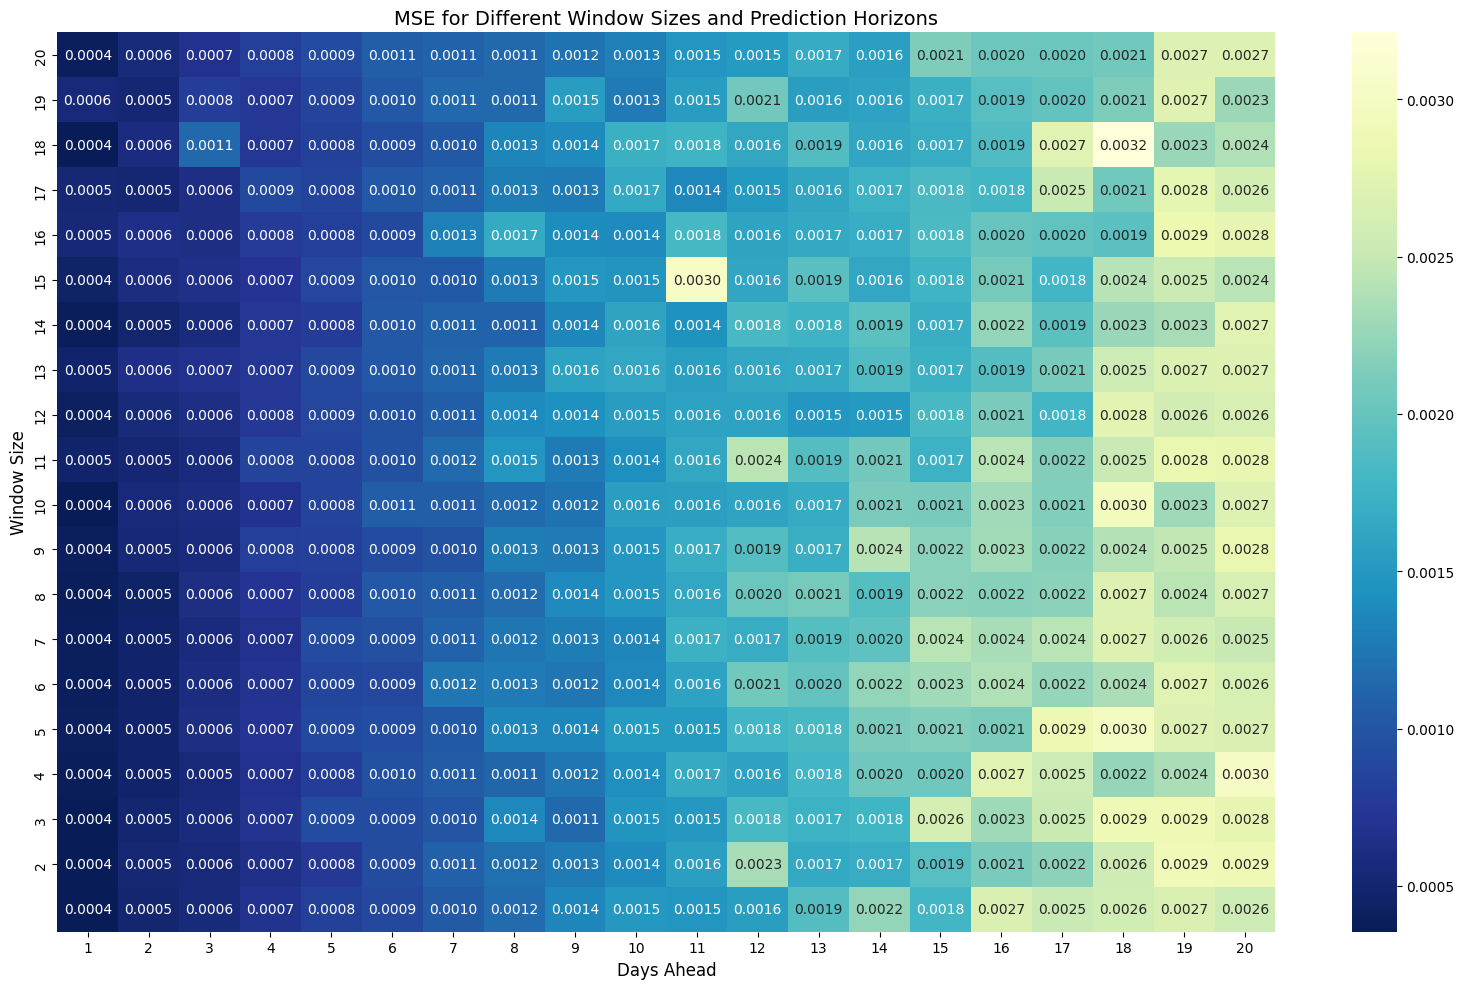

In [13]:
# Create figure with good size
plt.figure(figsize=(16, 10))

# Create enhanced heatmap
sns.heatmap(np.flipud(error), 
            annot=True,              
            fmt=".4f",               
            cmap="YlGnBu_r",         
            xticklabels=range(distanceBetweenDataPoints, (numberOfDataPoints + 1) * distanceBetweenDataPoints, distanceBetweenDataPoints),  # X-axis labels (1-10)
            yticklabels=range(numberOfDataPoints * distanceBetweenDataPoints, distanceBetweenDataPoints, -distanceBetweenDataPoints))  # Y-axis labels (1-10)

# Add axis labels and title
plt.xlabel('Days Ahead', fontsize=12)
plt.ylabel('Window Size', fontsize=12)
plt.title('MSE for Different Window Sizes and Prediction Horizons', fontsize=14)

# Save figure before showing
plt.tight_layout()
plt.savefig('window_analysis_heatmap.png', dpi=300)
plt.show()

X shape: (3806, 1)
y shape: (3806, 1)
Initializing network with layer sizes: [1, 64, 128, 1]
Parameters loaded from params_W_1_1.npz


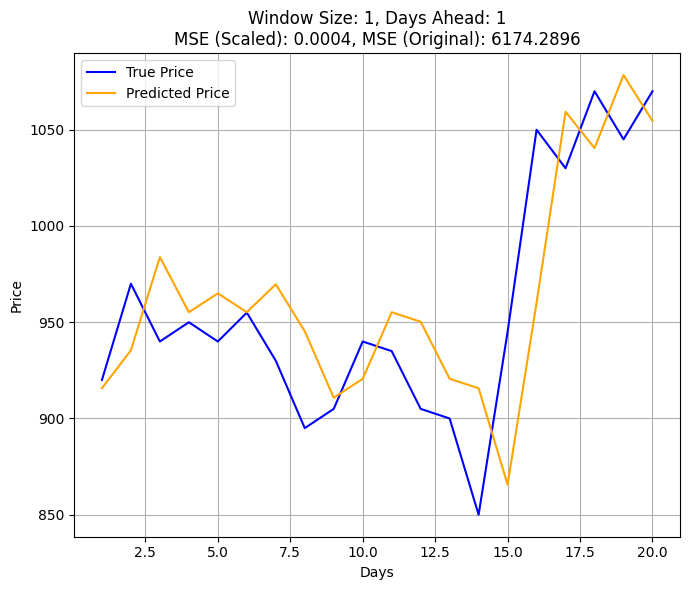

X shape: (3787, 20)
y shape: (3787, 1)
Initializing network with layer sizes: [20, 64, 128, 1]
Parameters loaded from params_W_20_1.npz


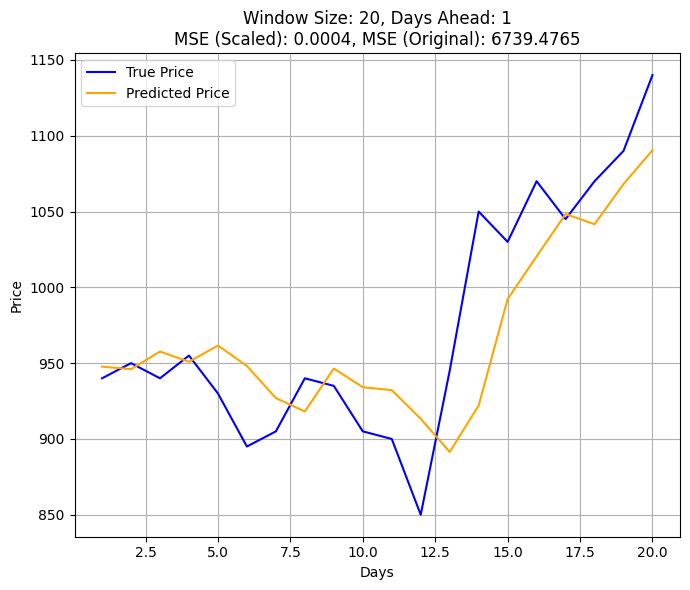

X shape: (3787, 1)
y shape: (3787, 20)
Initializing network with layer sizes: [1, 64, 128, 20]
Parameters loaded from params_W_1_20.npz


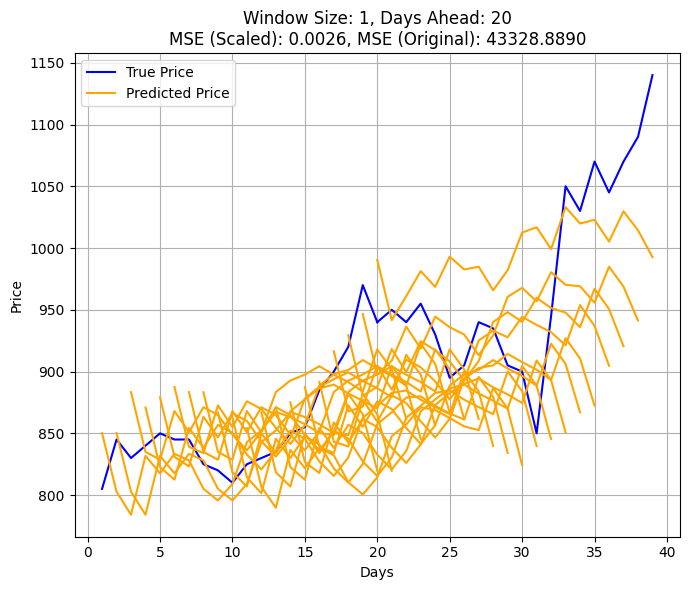

X shape: (3768, 20)
y shape: (3768, 20)
Initializing network with layer sizes: [20, 64, 128, 20]
Parameters loaded from params_W_20_20.npz


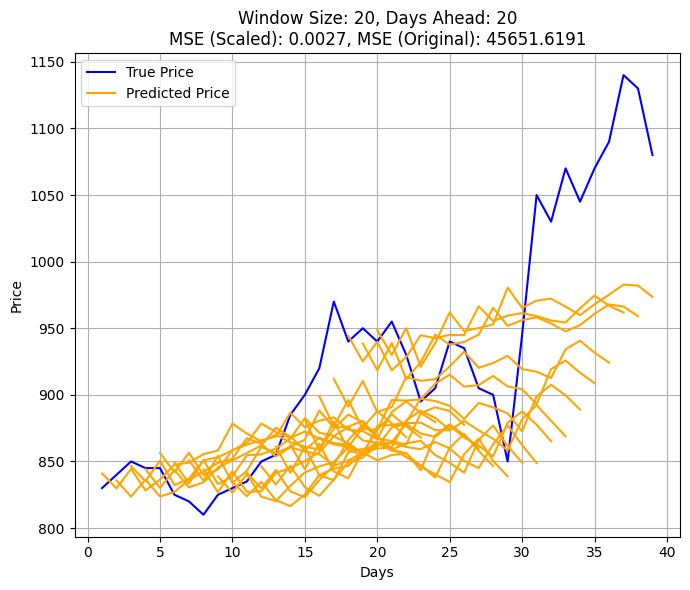

In [14]:
# Function remains the same
def visualize_case(window_size, days_ahead, scaler):
    # Create dataset with specific parameters
    X, y = create_dataset(scaled_data, window_size, days_ahead)
    
    # Use the same splitting approach as defined previously
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
    
    # Load the appropriate model
    layer_sizes = [window_size, 64, 128, days_ahead]
    model_name = f"W_{window_size}_{days_ahead}"
    model = BPNN(layer_sizes, model_name)
    
    # Generate predictions
    predictions = model.predict(X_test)
    
    # Calculate MSE on scaled data
    scaled_mse = mean_squared_error(y_test, predictions)
    
    # Inverse transform y_test and predictions to original scale
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)
    pred_orig = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)
    
    # Calculate MSE on original scale
    orig_mse = mean_squared_error(y_test_orig, pred_orig)
    
    return y_test_orig, pred_orig, scaled_mse, orig_mse

# Get min and max values
min_window = distanceBetweenDataPoints
max_window = numberOfDataPoints * distanceBetweenDataPoints
min_days_ahead = distanceBetweenDataPoints
max_days_ahead = numberOfDataPoints * distanceBetweenDataPoints

days_shown = 40
days_shown -= 20

# Case 1: Min window, min days (single day prediction)

y_test_orig, pred_orig, scaled_mse1, orig_mse1 = visualize_case(min_window, min_days_ahead, scaler)
X = (np.arange(days_shown) + 1) * distanceBetweenDataPoints

plt.figure(figsize=(7, 6))
plt.plot(X, y_test_orig[:days_shown], label='True Price', color='blue')
plt.plot(X, pred_orig[:days_shown], label='Predicted Price', color='orange')
plt.title(f"Window Size: {min_window}, Days Ahead: {min_days_ahead}\nMSE (Scaled): {scaled_mse1:.4f}, MSE (Original): {orig_mse1:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case1.png', dpi=300)
plt.show()

# Case 2: Max window, min days (single day prediction)
y_test_orig, pred_orig, scaled_mse2, orig_mse2 = visualize_case(max_window, min_days_ahead, scaler)
X = (np.arange(days_shown) + 1) * distanceBetweenDataPoints

plt.figure(figsize=(7, 6))
plt.plot(X,y_test_orig[:days_shown], label='True Price', color='blue')
plt.plot(X,pred_orig[:days_shown], label='Predicted Price', color='orange')
plt.title(f"Window Size: {max_window}, Days Ahead: {min_days_ahead}\nMSE (Scaled): {scaled_mse2:.4f}, MSE (Original): {orig_mse2:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case2.png', dpi=300)
plt.show()


# Case 3: Min window, max days (multiple days prediction)
y_test_orig, pred_orig, scaled_mse3, orig_mse3 = visualize_case(min_window, max_days_ahead, scaler)
X_test = (np.arange(days_shown) + 1) * distanceBetweenDataPoints
X_pred = np.arange(len(pred_orig[0,:])) + 1

plt.figure(figsize=(7, 6))
plt.plot(X_test,y_test_orig[:days_shown, 0], label='True Price', color='blue')
plt.plot(np.arange(len(y_test_orig[days_shown-1, :])) + days_shown, y_test_orig[days_shown-1, :], color='blue')


for day in range(days_shown):
    if day == 1:
        plt.plot(X_pred + day, pred_orig[day, :], label='Predicted Price', color='orange')
    else:   
        plt.plot(X_pred + day, pred_orig[day, :], color='orange')

plt.title(f"Window Size: {min_window}, Days Ahead: {max_days_ahead}\nMSE (Scaled): {scaled_mse3:.4f}, MSE (Original): {orig_mse3:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case3.png', dpi=300)
plt.show()

# Case 4: Max window, max days (multiple days prediction)
y_test_orig, pred_orig, scaled_mse4, orig_mse4 = visualize_case(max_window, max_days_ahead, scaler)
X_test = (np.arange(days_shown) + 1) * distanceBetweenDataPoints
X_pred = np.arange(len(pred_orig[0,:])) + 1

plt.figure(figsize=(7, 6))
plt.plot(X_test,y_test_orig[:days_shown, 0], label='True Price', color='blue')
plt.plot(np.arange(len(y_test_orig[days_shown-1, :])) + days_shown, y_test_orig[days_shown-1, :], color='blue')

for day in range(days_shown):
    if day == 1:
        plt.plot(X_pred + day, pred_orig[day, :], label='Predicted Price', color='orange')
    else:   
        plt.plot(X_pred + day, pred_orig[day, :], color='orange')

plt.title(f"Window Size: {max_window}, Days Ahead: {max_days_ahead}\nMSE (Scaled): {scaled_mse4:.4f}, MSE (Original): {orig_mse4:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case4.png', dpi=300)
plt.show()
